# A Complete Guide to Linear Regression  
### Related statistical concepts, statsmodels and visualization  
### Effect of Rule of Law on GDP Per Capita

## Table of Contents

* [Introduction](#introduction)
    * [Import Libraries](#import-libraries)
    * [Formatting](#formatting)
    * [Utility Functions](#utility-functions)
* [Data](#data)
* [EDA](#eda)
* [Linear Regression Training](#linear-regression-training)
    * [Linear Regression with the MODEL_Y-SQRT](#linear-regression-model-y-sqrt)
    * [Linear Regression with the MODEL_Y-LOG ROL-SQRD](#linear-regression-model-y-log-rol-sqrd)
* [Results Summary](#results-summary)
    * [OLS](#ols)
    * [No. Observation](#no-observations)
    * [Degrees of Freedom](#degrees-of-freedom)
        * [Df Residuals or Degrees of Freedom for Error](#dfr)
        * [Df Model or Degrees of Freedom for Model](#dfm)
    * [Covariance Type](#covariance-type)
    * [Residual Sum of Squares (RSS)](#rss)
    * [Residual Standard Error (RSE)](#rse)
    * [Sum of Squares Regression (SSR)](#ssr)
    * [Total Sum of Squares (TSS)](#tss)
    * [Mean of Squares for Model (MSM)](#msm-mse)
    * [Root Mean Squared Error (RMSE)](#rmse)
    * [R-squared](#r-squared)
    * [Adjusted R-squared](#adjusted-r-squared)
    * [t-statistic](#t-statistic)
    * [p-values](#p-values)
    * [F statistic](#f-statistic)
    * [Prob (F-statistic)](#f-statistic-prob)
    * [Scale](#scale)
    * [Log-Likelihood](#log-likelihood)
    * [Likelihood-Ratio Test](#likelihood-ratio-test)
    * [AIC](#aic)
    * [BIC](#bic)
    * [Coefficients](#coefficients)
    * [Standard Error](#standard-error)
    * [Confidence Interval](#confidence-interval) 
* [Issues](#issues)
    * [Normality](#normality)
        * [Omnibus](#omnibus)
        * [Prob(Omnibus)](#omnibus-prob)
        * [Skewness](#skewness)
        * [Kurtosis](#kurtosis)
        * [Jarque-Bera](#jarque-bera)
        * [Prob(JB)](#jarque-bera-prob)
        * [Histogram of Residuals Distribution](#histogram-of-residuals)
        * [Quantile-Quantile (QQ) Plot](#qq-plot)
    * [Independence](#independence)
        * [Durbin-Watson](#durbin-watson)
        * [Autocorrelation Function (ACF) Plot](#acf-plot)
    * [Multicollinearity](#multicollinearity)
        * [Heatmap](#heatmap)
        * [Condition No](#condition-no)
        * [Variance Inflation Factor](#vif)
    * [Heteroscedasticity](#heteroscedasticity)
        * [Breusch-Pagan Lagrange Multiplier](#breusch-pagan)
        * [Goldfeld-Quandt Test](#goldfeld-quandt)
    * [Linearity](#linearity)
        * [Residual Plot](#residual-plot)
        * [Harvey Collier Test for Linearity](#harvey-collier)
        * [Single Variable Regression Diagnostics](#single-variable-regression)
    * [Outliers](#outliers)
        * [Studentized Residuals](#studentized-residuals)
        * [Outlier Test](#outlier-test)
        * [Fit Plot](#fit-plot)
        * [Cook's Distance](#cooks-distance)
    * [Leverage](#leverage)
        * [Influence Plot](#influence-plot)
* [Prediction and Inference](#prediction-inference)
    * [Comparison of Predictions](#comparison-of-predictions)
    * [Model Selection and Refinement](#model-selection)
        * [Linear Regression with the MODEL_Y-LOG](#linear-regression-model-y-log)
    * [Inference and Interpretation](#inference-and-interpretation)
* [Conclusion](#conclusion)

## Introduction<a class="anchor"  id="introduction"></a>

Linear regression is one of the most common and interpretable statistical methods. Our purpose is to unfold some linear regression concepts rather than A-to-Z describe linear regression. In this notebook, we'll see how to approach and develop a linear regression problem step-by-step, make adjustments to fix issues, and interpret the model. Also, we'll see all linear regression concepts we can use in one place.  

While estimating the coefficients, we will use _least squares_ as the method and `statmodels` as the library. Visualizations help us build what-if scenarios and grasp the subject more effortlessly.  

In elaborating on the concepts, we will use a case to test if and how much variables such as `continent`, `population`, `human development index (HDI)`, and `rule of law (ROL)` influence `GDP Per Capita` over the globe.  

### Import Libraries<a class="anchor"  id="import-libraries"></a>

In [1]:
import pandas as pd
import numpy as np
from statsmodels.compat import lzip
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.stattools import durbin_watson, jarque_bera, omni_normtest, robust_skewness, robust_kurtosis, durbin_watson, jarque_bera
from statsmodels.stats.diagnostic import het_breuschpagan, het_goldfeldquandt, linear_harvey_collier
from statsmodels.stats.outliers_influence import OLSInfluence, variance_inflation_factor
import statsmodels.graphics as smgraph
import scipy.stats as stats
import numbers
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.graph_objs import scatter
import ipywidgets as widgets # Use widgets in Edit mode
from ipywidgets import Layout, HBox, VBox, interact # Use widgets in Edit mode
from IPython.display import HTML, display
import warnings
%matplotlib inline

### Formatting<a class="anchor"  id="formatting"></a>

In [2]:
# Make some arrangements to improve display
# https://pandas.pydata.org/docs/reference/api/pandas.set_option.html

pd.set_option('display.max_colwidth', 1000)
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)
pd.set_option("display.precision", 3)
sns.set_style('whitegrid')

# https://saturncloud.io/blog/troubleshooting-plotly-chart-not-showing-in-jupyter-notebook/

# pio.renderers.default = 'notebook'
warnings.filterwarnings("ignore")

In [3]:
# Plot style parameters. We'll use them in graphs.

supTitleSize = 18
titleSize = 14
labelSize = 12
labelSizeX = 13
dataSize = 8
titleColor = "black"
labelColor = "black"
dataColor = "maroon"
dataColor2 = "orange"
lineColor = "yellow"
lineColor2 = "green"
loc_y = 1.05
# figure_numerator = 0
figure_numerator = "*"

### Utility Functions<a class="anchor"  id="utility-functions"></a>

Some helper functions we need throughout the notebook

In [4]:
def initialize_figure(suptitle, rows, cols, figsize=(21, 6), y=loc_y, sharex=False, sharey=False):

    """
    Initializes the figure by defining the number of rows and columns, figure size, and 
    the size, color, and location of the title
    """
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    fig.suptitle(suptitle, fontsize=supTitleSize, color=titleColor, y=y)
    
    return axes


def arrange_layout(ax, title, x_label, y_label):
    
    """
    Sets the title and axis labels, and defines their properties 
    """
    
    ax.set_title(title, fontdict={"size": titleSize, "color": titleColor}) # title and its properties
    ax.set_xlabel(x_label, fontdict={"size": labelSize, "color":labelColor}) # x-axis label and its properties
    ax.set_ylabel(y_label, fontdict={"size": labelSize, "color": labelColor}) # y-axis label and its properties
    

def create_scatterplotmatrix(data, dimensions, title, color="Continent", symbol="Continent", 
                             hover_name="Country Name", diagonal=True, height=1000, width=1000, 
                             opacity=0.5, range_color=[0, 6]):
    
    """
    This generates scatterplot or pairplot between columns of data. For detailed explanation of parameters, 
    see https://www.educative.io/answers/creating-a-scatter-plot-matrix-with-plotly-express-in-python
    """

    fig = px.scatter_matrix(data,
                            dimensions=dimensions,
                            color=color, 
                            symbol=symbol,
                            title=title,
                            hover_name=hover_name,
                            labels={col:col.replace('_', ' ') for col in data.columns}, # remove underscore
                            height=height,
                            width=width,
                            opacity=opacity,
                            color_discrete_sequence=px.colors.qualitative.G10,
                            range_color=range_color,
                            template="plotly") 
    
    fig.update_traces(diagonal_visible=diagonal)
    
    fig.show()
    

def create_distplot(data, ax, title, x_label, y_label):
    
    """
    Creates a histogram with kernel density estimation
    """
    
    # Histogram with KDE
    sns.distplot(data, ax=ax, color=dataColor2)
    
    # Set and define the title, x-axis and y-axis labels
    arrange_layout(ax, title, x_label, y_label)

    
def create_qqplot(residuals, ax, title, x_label, y_label):
    
    """
    Creates and returns Q-Q plot to visually check normality of the data points. For more information,
    see: https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html
    """
    
    # Q-Q Plot
    sm.qqplot(residuals, stats.t, ax=ax, fit=True, line="45")
    
    # Set and define the title, x-axis and y-axis labels
    arrange_layout(ax, title, x_label, y_label)
    
    
def create_heatmap(data, ax, title, cmap="Blues", vmin=0.0, vmax=1.0, linewidths=.5, annot=True):
    
    """
    Creates and returns a heatmap plot for the selected columns in the data to visually check
    multicollinearity
    """
    
    sns.set(font_scale=1.0)
    
    heatmap_plot = sns.heatmap(data=data.corr(),
                               xticklabels=[col.replace('_', ' ') for col in data.columns],
                               yticklabels=[col.replace('_', ' ') for col in data.columns],
                               ax=ax, 
                               cmap=cmap, 
                               vmin=vmin, 
                               vmax=vmax, 
                               linewidths=linewidths,
                               square=False,
                               annot=annot,
                               annot_kws={"size": 12}
                               )
    
    ax.set_title(title, fontdict={"size": titleSize, "color": titleColor})
    
    
def create_scatter(data, x, y, title, labels, size=None, trendline="lowess", color="Continent", 
                   symbol="Continent", hover_name="Country Name", height=1000, width=1000, opacity=0.5, 
                   marginal_x="histogram", marginal_y="histogram", range_color=[0, 6], template="plotly"):
    
    """
    This function generates a scatter plot and a histogram for each axis variable. 
    Scatter plot also comes with trendlines for each continent. Histograms are 
    displayed as box whisker plots. Each data point represents a country, the legend
    shows continents.
    """
    
    fig = px.scatter(data, 
                        x=x, 
                        y=y,
                        size=size,
                        color=color,
#                         symbol="Continent",
                        title=title,
                        trendline=trendline,
                        hover_name=hover_name,
                        labels=labels,
                        height=height,
                        width=width,
                        opacity=opacity,
                        color_discrete_sequence=px.colors.qualitative.G10,
                        range_color=range_color,
                        marginal_x=marginal_x, 
                        marginal_y=marginal_y,
                        template=template)

    return fig
   
    
def plot_residual(ax, x, y, title, x_label, y_label, lowess=True, order=1, linewidth=4):
    
    """
    This function uses Seaborn's residplot function which will regress y on x (possibly as a 
    robust or polynomial regression) and then draw a scatterplot of the residuals. You can 
    optionally fit a lowess smoother to the residual plot, which can help in determining
    if there is structure to the residuals. For more details check out the link:
    https://seaborn.pydata.org/generated/seaborn.residplot.html
    """
    
    # Residual plot
    residual_plot = sns.residplot(ax=ax, data=data, x=x, y=y, lowess=lowess, color=dataColor, 
                                  line_kws=dict(color=lineColor, linewidth=linewidth))
    
    # Set and define the title, x-axis and y-axis labels
    arrange_layout(ax, title, x_label, y_label)  
    
    
def plot_fit(model, exog_idx, ax, title, x_label, y_label):
    
    """
    This returns 'statsmodels' Fit Plot
    """
    
    # exog_idx is the name or index of regressor in exog matrix.
    fit_plot = smgraph.regressionplots.plot_fit(model, exog_idx, ax=ax)
    
    # Set and define the title, x-axis and y-axis labels
    arrange_layout(ax, title, x_label, y_label)

    
def plot_leverage(model, ax, title, x_label, y_label):
    
    """
    This function creates and returns a leverage plot, and 
    enables to see leverage points of observations
    """
 
    leverage_plot = smgraph.regressionplots.plot_leverage_resid2(model, ax=ax, color=dataColor)   
    
    # Set and define the title, x-axis and y-axis labels
    arrange_layout(ax, title, x_label, y_label)


def plot_influence(model, ax, title, x_label, y_label, alpha):

    """
    This function creates and returns the influence plot. Influence plot shows 
    influence of each observation as well as high-leverage and outlier data points.
    """
    
    influence_plot = smgraph.regressionplots.influence_plot(model, 
                                                            ax=ax, 
                                                            criterion="cooks", 
                                                            alpha=alpha)                                 
                                               
    # Set and define the title, x-axis and y-axis labels
    arrange_layout(ax, title, x_label, y_label)
    
    
def plot_acf(residuals, ax, title, x_label, y_label, alpha=0.05):
    
    """
    This function plots the autocorrelation function. It plots lags on the horizontal and 
    the correlations on vertical axis. For more information, check out the link: 
    https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html
    """

    # ACF Plot
    acf_plot = smgraph.tsaplots.plot_acf(residuals, ax=ax, alpha=alpha)
    
    # Set and define the title, x-axis and y-axis labels
    arrange_layout(ax, title, x_label, y_label)
    
    
def generate_suffices(dict_for_models):
    
    """
    Models' names are stored as keys in the dictionary. This function extracts
    the names, which follow the underscore in the keys of the dictionary, and
    returns them as suffices
    """
    
    model_suffices = [s.split("_")[1] for s in list(dict_for_models.keys())]
    
    return model_suffices


def generate_df(df_dict):
    
    """
    Creates and returns a pandas dataframe from a dictionary
    """

    df = pd.DataFrame.from_dict(df_dict)
    df = df.set_index('model').T
    
    return df


def generate_dict(prefix="prefix", description=None, index=0, procs=[]):
    
    """
    This function generates and returns a dataframe that shows the items we are 
    interested in in the regression results table for each linear regression model.
    """
    
    # Create a temporary dictionary to store model's results displayed
    # in the regression table
    temp_dict = {}
    
    # Get the model's name as suffix
    model_suffices = generate_suffices(models_dict)
    
    # 'procs' represent the items we are interested in in the regression table, 
    # such as the number of observations, F score, R2, etc. for each model.
    # We store the item of interest by the model's name in the temporary dictionary
    for suffix, proc in zip(model_suffices, procs):
        
        temp_dict[f"model_{suffix}"] = proc
    
    # Some items are returned as tuples. If they are, we need a particular element in the tuple, which is 
    # indicated by the 'index' argument. Otherwise, the single value from the dictionary is good to go
    temp_dict = {k: v if type(v) is not tuple else v[index] for k, v in temp_dict.items()}
    
    # Items can be strings or numbers. If they are strings, they are returned as is. 
    # If they are numbers, we round them to the nearest three decimals.
    value_list = list(map(lambda x: round(x, 3) if not isinstance(x, str) else x, list(temp_dict.values())))
    
    # That is another temporary dictionary to store the name of the model and 
    # the regression results table items of interest. The 'prefix' key 
    # describes the item in the regression results table.
    df_dict = {"model": list(temp_dict.keys()), prefix: value_list}
    
    del temp_dict
    
    # Create a pandas dataframe from the dictionary
    df = generate_df(df_dict)
    
    del df_dict
    
    # Assign the values of items for each model in the regression results table to variables.
    x_sqrt = procs[0]
    x_log = procs[1]
    
    print(description, ":")
    
    # Display the dataframe we just generated
    display(df)
    
    return df, x_sqrt, x_log

## Data<a class="anchor"  id="data"></a>

The data contains 131 observations, which are countries from all continents. Initial raw predictors are `continent`, `population`, `human development index (HDI)`, and `rule of law (ROL)`. The label or the dependent variable is `GDP Per Capita`. Later, we will need to make feature selection and engineering for variables. Data and all related explanations can be found [here](http://www.kaggle.com/datasets/hserdaraltan/rule-of-law-human-dev-index-gdp-by-country).

In [5]:
# Read data csv file and display head rows
def read_data(file):
    
    data = pd.read_csv(file)
    display(data.head())
    
    return data

# Kaggle dataset
data = read_data("/kaggle/input/rule-of-law-human-dev-index-gdp-by-country/country_stats.csv")

# Local
# data = read_data("data/consolidated.csv")

,Country Name,Continent,Population,GDP_Per_Capita,HDI,ROL
0,Afghanistan,Asia,40099462,363.674,0.498,0.353
1,Angola,Africa,34503774,1903.717,0.576,0.428
2,Albania,Europe,2811666,6377.203,0.822,0.492
3,United Arab Emirates,Asia,9365145,44315.554,0.881,0.640
4,Argentina,South America,45808747,10636.116,0.860,0.558


We make data type changes to save memory and increase speed.

In [6]:
# Change dtype
def change_dtype(data):

    data = data.astype({"Country Name": "category", 
                        "Continent": "category",
                        "Population": "int32", 
                        "GDP_Per_Capita": "float32", 
                        "HDI": "float32", 
                        "ROL": "float32"})
    return data

data = change_dtype(data)

In [7]:
# Data column types after the change
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Country Name    131 non-null    category
 1   Continent       131 non-null    category
 2   Population      131 non-null    int32   
 3   GDP_Per_Capita  131 non-null    float32 
 4   HDI             131 non-null    float32 
 5   ROL             131 non-null    float32 
dtypes: category(2), float32(3), int32(1)
memory usage: 7.9 KB


In [8]:
# Summarize the data
data.describe()

,Population,GDP_Per_Capita,HDI,ROL
count,1.310e+02,131.000,131.000,131.000
mean,5.698e+07,16461.240,0.740,0.556
std,1.779e+08,23020.580,0.144,0.143
min,7.241e+04,363.674,0.411,0.318
25%,5.174e+06,2117.853,0.613,0.446
50%,1.353e+07,6377.203,0.762,0.516
75%,4.492e+07,18385.986,0.859,0.646
max,1.412e+09,133590.141,0.958,0.899


## EDA<a class="anchor"  id="eda"></a>

We refer to visualizations to further explore the data. First, we should display the data by _top_, _middle_, and _bottom_ ten countries sorted by _GDP Per Capita_ in descending order.

In [9]:
# Create an empty df
df_initial = pd.DataFrame()

# Create categories for the top, bottom and middle countries
categories = ["Top-10", "Bottom-10", "Mid-10"]
# Get the list of continents
continents = data["Continent"].unique().tolist()
# Get the list of countries
countries = data["Country Name"].unique().tolist()
# Combine categories, continents and countries into one list to make up a listbox list later
selections = categories + continents + countries

# Create a new df and sort it by GDP Per Capita
df_graph = data.copy()
df_graph.sort_values(by="GDP_Per_Capita", ascending=False, inplace=True)

# Create the dataset for the top 10 countries by GDP Per Capita
top_10 = df_graph.nlargest(n=10, columns="GDP_Per_Capita")

# Create the dataset for the bottom 10 countries by GDP Per Capita
bottom_10 = df_graph.nsmallest(n=10, columns="GDP_Per_Capita")

# Create the dataset for the middle 10 countries by GDP Per Capita
start = int((len(df_graph) - 10) / 2) + 1
end = start + 10
mid_10 = df_graph.iloc[start:end]

# Store all datasets in a dictionary
category_dict = {"Top-10": top_10, "Bottom-10": bottom_10, "Mid-10": mid_10}

In [10]:
def select(selected):
    
    """
    Filters countries, continents and categories based on the selection criteria.
    Criteria are the options compiled from the listbox, which are defined in the
    'selected' variable. So, selected' variable stores options chosen in the listbox
    """
    
    # Extract countries defined in the 'selected' variable
    selected_countries =  [country for country in selected if country in countries]
    # Extract continents defined in the 'selected' variable
    selected_continents = [continent for continent in selected if continent in continents]
    # Extract categories defined in the 'selected' variable
    selected_categories = [category for category in selected if category in categories]
    
    return selected_countries, selected_continents, selected_categories


def filter_df(criteria, column):
    
    # Create a mask if criteria exists in a given column
    mask = data[column].isin(criteria)
    
    # Select rows where the criteria matches the values in the given column
    # and return them as a dataset
    df_selected = data[mask]
    
    # Return the filtered data
    return df_selected
    

def append_df(df, criteria, column):

    # Build a dataset with rows of the original data, in which defined values (criteria) 
    # match values in a given column
    df_selected = filter_df(criteria, column)
    
    # Append the dataset just built to the df given as argument in the function
    df = df._append(df_selected, ignore_index=True)
    
    # Return the combined df
    return df    
    
    
def generate_select_df(selected):

    # Get countries, continents or categories selected in the listbox
    selected_countries, selected_continents, selected_categories = select(selected) 
    
    # Build a dataset where selected continents match the values in 'Continent' column of the original data
    # and append this filtered data to the empty dataframe which was created earlier
    df = append_df(df_initial, selected_continents, "Continent")
    
    # Create a new column 'Class' and assign the values of 'Continent' to it as string
    df['Class'] = pd.Series(dtype='string')
    df["Class"] = df["Continent"]
    
    for selected_category in selected_categories:
        # Repeat the below procedure for every category (top, middle, bottom) selected
        
        # Repeat the above append process, this time to add the selected category data to the df
        # The added data will be top, middle or bottom countries.
        df = df._append(category_dict[selected_category], ignore_index=True)
        
        # Add selected category to the 'Class' column
        df["Class"] = df["Class"].cat.add_categories(selected_category)
        # Fill null values in the column with the selected category
        df["Class"].fillna(selected_category, inplace=True)
    
    # Lastly, append countries selected to the df
    df = append_df(df, selected_countries, "Country Name")
    
    # Place the country name in the 'Class' column where the column is null, otherwise keep the 'Class' value
    # Country names are of the selected countries
    df["Class"] = np.where(df["Class"].isnull(), df["Country Name"], df["Class"])

    # Drop any duplicate values and keep the last one
    df.drop_duplicates(subset=["Country Name"], keep="last", inplace=True)
    
    # Return the final dataset which is ready to base the chart on, and selected countries as well
    return df, selected_countries

Below, we display _countries_, _continents_, or _categories_ (_top_, _middle_, _bottom_) along _HDI_ (x-axis) and _ROL_ (y-axis). We may make multiple selections to enhance the database for the plot. We may plot any _country_, _continent_, _category_ or any combination of them against each other. For example, one might want to see USA, UK, Africa and ten middle income countries.

In [11]:
# Start the numerator with 1 for the first plot. Throughout the notebook, it will increment by one, helping us automatically number the plots.
# figure_numerator += 1

def generate_summary_vis(selected):
    
    """
    This generates a bubble chart in which the x-axis represents HDI, the y-axis 
    represents ROL and the size of the bubbles is proportionate to GDP Per Capita.
    In the chart, countries will be displayed with color and size, helping see their
    their continents and categories in the legend.
    """
    
    # Get the list of countries selected from the listbox, and generate a combined
    # dataset from all selected values in the listbox to create the chart
    df_vis, selected_countries = generate_select_df(selected)
    
    # Define the title, x-axis, y-axis, data points, and the format
    fig_scatter = create_scatter(df_vis, 
                    x="HDI", 
                    y="ROL", 
                    size="GDP_Per_Capita",
                    title=f"Figure {figure_numerator}: ROL and HDI vs. GDP Per Capita", 
                    trendline=None, 
                    color="Class", 
#                     symbol=None, 
                    hover_name="Country Name", 
                    labels={col:col.replace('_', ' ') for col in df_vis.columns},
                    height=700, 
                    width=1200, 
                    opacity=0.8, 
                    range_color=[0, 100],
                    marginal_x=None, 
                    marginal_y=None,
                    template="plotly"
                  )
    
    
    # Display every country selected in the plot
    for selected_country in selected_countries:
        
        # Find each country's x (HDI) and y (ROL) positions
        x = round(df_vis[df_vis["Country Name"] == selected_country]["HDI"].values.tolist()[0], 2)
        y = round(df_vis[df_vis["Country Name"] == selected_country]["ROL"].values.tolist()[0], 2)
        
        # Add text annotation
        fig_scatter.add_annotation(
            showarrow=True,
            x = x,
            y = y,
            xref="x", 
            yref="y",
            text = selected_country,
            arrowhead=2,
            arrowsize=1,
            arrowwidth=3,
            arrowcolor=dataColor,
            ax=-40,
            ay=-40,
            opacity=0.8
        ) 
    
    fig_scatter.update_layout(xaxis_range=[0.0,1.0], yaxis_range=[0.0,1.0])
    
    fig_scatter.show()

# Use widgets in Edit mode
# Options are composed of 'selections' which are defined above. Top-10 and Bottom-10 are default values.
# The widget calls a function to create the chart for options selected
# widgets.interact(generate_summary_vis, 
#                  selected=widgets.SelectMultiple(options=selections, 
#                                             value=("Top-10", "Bottom-10"),
#                                             description="Geography",
#                                             rows=20,
#                                             disabled=False)
#                 );

# Select category(s) (Top-10, Middle-10, Bottom-10), continent(s) or country(s)
selected = ["Top-10", "Bottom-10", "Africa", "Belgium"]

generate_summary_vis(selected)

_Scatterplot Matrix_ is a powerful tool to explore relationships between variables.

In [12]:
# figure_numerator += 1

# Dependent and independent variables to plot
plot_cols = ["GDP_Per_Capita", "Continent", "Population", "HDI", "ROL"]

# Create a scatterplot to view variables against each other
create_scatterplotmatrix(data, 
                         dimensions=plot_cols,
                         title=f"Figure {figure_numerator}: Scatterplot Matrix with Original GDP Per Capita", 
                         color="Continent", 
                         symbol="Continent", 
                         hover_name="Country Name", 
                         diagonal=True, 
                         height=1200, 
                         width=1200, 
                         range_color=[0, 6],
                         opacity=0.5)


When we look at the above graph, a few points are noteworthy:  
* The population does not correlate with any other variable. Thus, we may remove this useless parameter.  
* _HDI_ and _ROL_ are non-linearly correlated with _GDP Per Capita_. Linear regression is assumed to be linear. Then, we should form a non-linear $f(X)$ function to describe the relationship between those two predictors and the output variable.  
* _HDI_ and _ROL_ follow an exponentially increasing pattern, a finding that draws our attention to the stark fact that after some threshold, these two predictors contribute to _GDP_ significantly. In this respect, _HDI_ is highly consistent. _ROL_ has a funnel shape, which may beg further consideration, as we'll see later.  
* A strong correlation between _HDI_ and _ROl_ indicates a collinearity problem we should address later.  
* As continent-wise, _Africa_ has a clear disadvantage in _GDP Per Capita_. As one might expect, intra-continent income distribution across countries is positively skewed. Distribution is wider in _Europe_ than in any other continent.  

These are some key points that we may catch from the scatter plot.

Just for another view, we might want to draw a scatter plot in a slightly different way, however, it tells the same story:)

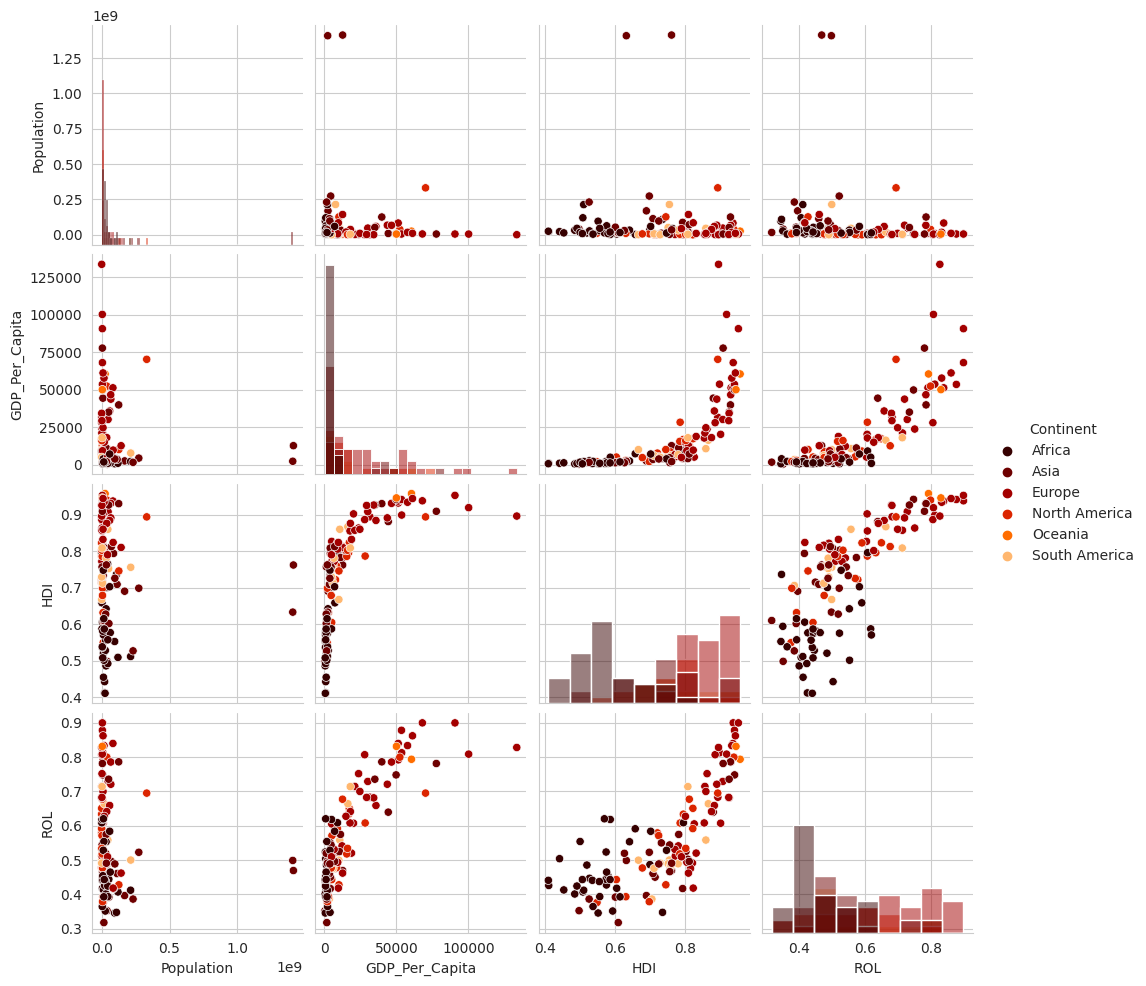

In [13]:
# We may skip this graph!
sns.pairplot(data, 
             diag_kind='hist', 
             hue='Continent', 
             palette='gist_heat', 
             dropna=True);

Now, we will make a couple of adjustments. To address the funnel shape of the relationship between _ROL_ and _GDP Per Capita_, we will take the square root of the latter. Furthermore, to form a non-linear function for _HDI_ and _GDP Per Capita_, we calculate the square of _HDI_ and use it as the new predictor.

In [14]:
# Square root transformation of Y
data["GDP_Per_Capita_SQRT"] = np.sqrt(data["GDP_Per_Capita"])

# Square transformation of the X variable
data["HDI_SQRD"] = np.square(data["HDI"])

display(data.head())

,Country Name,Continent,Population,GDP_Per_Capita,HDI,ROL,GDP_Per_Capita_SQRT,HDI_SQRD
0,Afghanistan,Asia,40099462,363.674,0.498,0.353,19.070,0.248
1,Angola,Africa,34503774,1903.717,0.576,0.428,43.632,0.332
2,Albania,Europe,2811666,6377.203,0.822,0.492,79.857,0.675
3,United Arab Emirates,Asia,9365145,44315.555,0.881,0.640,210.513,0.777
4,Argentina,South America,45808747,10636.115,0.860,0.558,103.132,0.740


Let's try another scatterplot with the new variables.

In [15]:
# figure_numerator += 1

# Dependent and independent variables to plot, including new ones
plot_cols = ["GDP_Per_Capita", "GDP_Per_Capita_SQRT", "Continent", "HDI", "HDI_SQRD", "ROL"]

create_scatterplotmatrix(data, 
                         dimensions=plot_cols,
                         title=f"Figure {figure_numerator}: Scatterplot Matrix with GDP Per Capita SQRT and HDI SQRD", 
                         color="Continent", 
                         symbol="Continent", 
                         hover_name="Country Name", 
                         diagonal=True, 
                         height=1200, 
                         width=1200, 
                         range_color=[0, 6],
                         opacity=0.5)


In the above chart, the relationship between _ROL_ and _Square Root of GDP Per Capita (SQRT)_ has become almost linear, and the funnel shape has disappeared. We achieved this by taking the square root transformation of the $Y$ variable, which is _GDP Per Capita_. As _HDI_ is still non-linearly correlated with _GDP Per Capita SQRT_, the inclusion of _HDI SQRD_ is necessary. _HDI SQRD_ shows the same collinearity pattern against _ROL_ as _HDI_. Therefore, from now on, we should continue with either of the models:  
1. Regressing _GDP Per Capita SQRT_ on _HDI_, _HDI SQRD_, and _Continent_ or,  
2. Regressing _GDP Per Capita SQRT_ on _ROL_ and _Continent_  

Another consideration is doing a log transformation of $Y$ instead of taking the square root. First, let's try this last point.

In [16]:
# Log transformation of Y
data["GDP_Per_Capita_LOG"] = np.log(data["GDP_Per_Capita"])
data.head()

,Country Name,Continent,Population,GDP_Per_Capita,HDI,ROL,GDP_Per_Capita_SQRT,HDI_SQRD,GDP_Per_Capita_LOG
0,Afghanistan,Asia,40099462,363.674,0.498,0.353,19.070,0.248,5.896
1,Angola,Africa,34503774,1903.717,0.576,0.428,43.632,0.332,7.552
2,Albania,Europe,2811666,6377.203,0.822,0.492,79.857,0.675,8.760
3,United Arab Emirates,Asia,9365145,44315.555,0.881,0.640,210.513,0.777,10.699
4,Argentina,South America,45808747,10636.115,0.860,0.558,103.132,0.740,9.272


Let's see how the log transformation of GDP Per Capita will make a difference if it does.

In [17]:
# figure_numerator += 1

# Dependent and independent variables to plot, including new ones
plot_cols = ["GDP_Per_Capita", "GDP_Per_Capita_LOG", "Continent", "HDI", "HDI_SQRD", "ROL"]

create_scatterplotmatrix(data, 
                         dimensions=plot_cols,
                         title=f"Figure {figure_numerator}: Scatterplot Matrix with GDP Per Capita LOG and HDI SQRD", 
                         color="Continent", 
                         symbol="Continent", 
                         hover_name="Country Name", 
                         diagonal=True, 
                         height=1200, 
                         width=1200, 
                         range_color=[0, 6],
                         opacity=0.5)

Here, things change a bit. The relationship between _HDI_ and _GDP Per Capita LOG_ (log transformation of $Y$) is now linear. However, _ROL_ has a slight non-linearity with the $Y$ variable. That tells us to build the model as:  
1. Regressing _GDP Per Capita LOG_ on _HDI_ and _Continent_ or,  
2. Regressing _GDP Per Capita LOG_ on _ROL_, _ROL SQRD_, and _Continent_. We should take the square of _ROL_ and add it to the model as the new variable to account for curvilinearity.  
  
So far, we have four alternative models:  
1. MODEL Y-SQRT HDI-SQRD: Regressing _GDP Per Capita SQRT_ on _HDI_, _HDI SQRD_, and _Continent_,  
2. MODEL Y-SQRT: Regressing _GDP Per Capita SQRT_ on _ROL_ and _Continent_,  
3. MODEL Y-LOG ROL-SQRD: Regressing _GDP Per Capita LOG_ on _ROL_, _ROL SQRD_, and _Continent_,  
4. MODEL Y-LOG: Regressing _GDP Per Capita LOG_ on _HDI_ and _Continent_  
  
We do not need to try all four models. One `SQRD` and one `LOG` model should be enough to give insight. We have a reasonable doubt regarding the existence of collinearity between _HDI_ and _ROL_, so we should discard one of them. As we won't use any of the models to make prediction but inference, I would like to prefer _ROL_ as the independent variable instead of _HDI_. Thus, we'll test `MODEL Y-SQRT` (Model 2) and `MODEL Y-LOG ROL-SQRD` (Model 3).

In [18]:
# Square transformation of the X variable
data["ROL_SQRD"] = np.square(data["ROL"])

display(data.head())

,Country Name,Continent,Population,GDP_Per_Capita,HDI,ROL,GDP_Per_Capita_SQRT,HDI_SQRD,GDP_Per_Capita_LOG,ROL_SQRD
0,Afghanistan,Asia,40099462,363.674,0.498,0.353,19.070,0.248,5.896,0.124
1,Angola,Africa,34503774,1903.717,0.576,0.428,43.632,0.332,7.552,0.183
2,Albania,Europe,2811666,6377.203,0.822,0.492,79.857,0.675,8.760,0.242
3,United Arab Emirates,Asia,9365145,44315.555,0.881,0.640,210.513,0.777,10.699,0.409
4,Argentina,South America,45808747,10636.115,0.860,0.558,103.132,0.740,9.272,0.312


Our data table is ready. Now, we can go on with building the model.

## Linear Regression Training<a class="anchor"  id="linear-regression-training"></a>

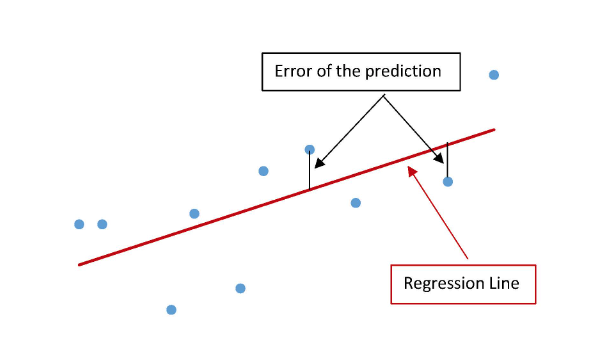  
  
Source: [Introduction to Statistics](https://ecampusontario.pressbooks.pub/introstats/chapter/13-3-standard-error-of-the-estimate/)

In [19]:
# Store models in a dictionary
models_dict = {}

In [20]:
def generate_formula(ind_con_variables, ind_cat_variables, dep_variable):
    
    """
    This function composes R-style formulas. For example: 'Lottery ~ Literacy + Wealth + C(Region)'
    'Lottery' is the dependent variable, others are independent variables. 'Region' is the categorical
    value and denoted in parantheses following the capital letter 'C'. See for more information:
    https://www.statsmodels.org/stable/example_formulas.html
    """
    
    formula = dep_variable + " ~ " + \
            " + ".join(["C(" + cat_var + ")" for cat_var in ind_cat_variables]) + \
            " + " + " + ".join(ind_con_variables)
    return formula  


def regress(model_name, data, ind_con_variables, ind_cat_variables, dep_variable, print_summary=True):
    
    """
    The regression function fits the model, then returns the model, predictions, fitted values,
    and residuals. It saves the model and prints the summary.
    """
        
    # Generate the formula for the regression
    formula = generate_formula(ind_con_variables, ind_cat_variables, dep_variable)
    
    # Fit the model
    model = smf.ols(formula=formula, data=data).fit()
    
    # Predictions
    predictions = model.predict()
    
    # Fitted values
    fitted_values = model.fittedvalues
    
    # Residuals
    residuals = model.resid
    
    # Add model to the store
    models_dict[model_name] = model
    
    if print_summary:
    
        # Print summary
        print_model = model.summary()
        print(print_model)
        
    return model, predictions, fitted_values, residuals
    

### Linear Regression with the `MODEL_Y-SQRT`<a class="anchor"  id="linear-regression-model-y-sqrt"></a>

Our linear model with the square root of the dependent variable will be like this:  
  
$\large \sqrt{Y_{GDP}}=\beta_{0}+\beta_{1}X_{ROL}+\beta_{2}X_{Continent}$

In [21]:
# Independent continuous variable(s)
ind_con_variables_sqrt =  ["ROL"]
# Independent categorical variable(s)
ind_cat_variables_sqrt = ["Continent"]
# Dependent variable
dep_variable_sqrt = "GDP_Per_Capita_SQRT"

# Regression model for the MODEL Y-SQRT
model_sqrt, predictions_sqrt, fitted_values_sqrt, residuals_sqrt = regress("MODEL_Y-SQRT",
                                                                            data,
                                                                            ind_con_variables_sqrt,
                                                                            ind_cat_variables_sqrt,
                                                                            dep_variable_sqrt, 
                                                                            print_summary=True)

                             OLS Regression Results                            
Dep. Variable:     GDP_Per_Capita_SQRT   R-squared:                       0.824
Model:                             OLS   Adj. R-squared:                  0.815
Method:                  Least Squares   F-statistic:                     96.75
Date:                 Fri, 19 Jan 2024   Prob (F-statistic):           2.30e-44
Time:                         16:29:40   Log-Likelihood:                -636.86
No. Observations:                  131   AIC:                             1288.
Df Residuals:                      124   BIC:                             1308.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Inte

We defer to discuss the regression results table because we are going to explain almost every item in the table later on the way down. Let's visualize the results first.

In [22]:
# figure_numerator += 1

# Scatter plot with trendlines for each continent and box whisker histograms for both axes
fig = create_scatter(data, 
                x="ROL", 
                y="GDP_Per_Capita_SQRT", 
                title=f"Figure {figure_numerator}: ROL vs. GDP_Per_Capita_SQRT", 
                trendline="lowess", 
                color="Continent", 
                symbol="Continent", 
                hover_name="Country Name", 
                labels={col:col.replace('_', ' ') for col in data.columns},
                height=800, 
                width=1200, 
                opacity=1.0, 
                range_color=[0, 6],
                marginal_x="box", 
                marginal_y="box",
                template="plotly"
              )

fig.show()

The analysis of the chart provides interesting insights, but it is beyond the notebook. However, we should notice the existence of a slight non-linearity between the variables. Therefore, this model may increase the bias. Now, let us turn to the other model.

### Linear Regression with the `MODEL_Y-LOG ROL-SQRD`<a class="anchor"  id="linear-regression-model-y-log-rol-sqrd"></a>

Our linear model with the logarithm of the dependent variable will be like this:  
  
$\large \ logY_{GDP}=\beta_{0}+\beta_{1}X_{ROL}+\beta_{2}X_{ROL-SQRD}+\beta_{3}X_{{Continent}}$

In [23]:
# Independent continuous variable(s)
ind_con_variables_log =  ["ROL", "ROL_SQRD"]
# Independent categorical variable(s)
ind_cat_variables_log = ["Continent"]
# Dependent variable
dep_variable_log = "GDP_Per_Capita_LOG"

# Regression model for the MODEL Y-LOG ROL-SQRD
model_log, predictions_log, fitted_values_log, residuals_log = regress("MODEL_Y-LOG-ROL-SQRD",
                                                                        data,
                                                                        ind_con_variables_log,
                                                                        ind_cat_variables_log,
                                                                        dep_variable_log, 
                                                                        print_summary=True)

                            OLS Regression Results                            
Dep. Variable:     GDP_Per_Capita_LOG   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     85.52
Date:                Fri, 19 Jan 2024   Prob (F-statistic):           3.34e-44
Time:                        16:29:40   Log-Likelihood:                -116.34
No. Observations:                 131   AIC:                             248.7
Df Residuals:                     123   BIC:                             271.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

Even though we want to use both models to make inferences, their $R^{2}$s are good enough to predict the output. The graph for the results is as below:

In [24]:
# figure_numerator += 1

def plot_lr_scatter(dropdown_value):

    # Scatter plot with trendlines for each continent and box whisker histograms for both axes
    fig = create_scatter(data, 
                    x=dropdown_value, 
                    y="GDP_Per_Capita_LOG", 
                    title=f"Figure {figure_numerator}: ROL and ROL_SQRD vs. GDP_Per_Capita_LOG", 
                    trendline="lowess", 
                    color="Continent", 
                    symbol="Continent", 
                    hover_name="Country Name", 
                    labels={col:col.replace('_', ' ') for col in data.columns},
                    height=800, 
                    width=1200, 
                    opacity=1.0, 
                    range_color=[0, 6],
                    marginal_x="box", 
                    marginal_y="box",
                    template="plotly"
                  )

    fig.show()

# This model introduces two continuous predictors: ROL and ROL_SQRD. 
# To view either variable, choose one in the dropdown below
# widgets.interact(plot_lr_scatter, 
#                  dropdown_value=widgets.Dropdown(options=["ROL", "ROL_SQRD"], 
#                                             value="ROL",
#                                             description="Predictor",
#                                             rows=2,
#                                             disabled=False)
#                 );


# Choose an independent variable: "ROL" or "ROL_SQRD"
plot_lr_scatter("ROL")

We won't worry about the non-linearity here because we have already included the squared term. From the dropdown, we may show _ROL_ and _ROL_SQRD_ separately.

## Results Summary<a class="anchor"  id="results-summary"></a>

In this section, we'll see the explanations of items in the regression results table.

### OLS<a class="anchor"  id="ols"></a>

We will use ordinary least squares as the least squares method to estimate the model's parameters.  
  
In statistics, __ordinary least squares (OLS)__ is a type of linear least squares method for choosing the unknown parameters in a linear regression model (with fixed level-one effects of a linear function of a set of explanatory variables) by the principle of least squares: minimizing the sum of the squares of the differences between the observed dependent variable (values of the variable being observed) in the input dataset and the output of the (linear) function of the independent variable. Source: [Ordinary least squares](https://en.wikipedia.org/wiki/Ordinary_least_squares)  
  
The method of least squares is a standard approach in regression analysis to approximate the solution of overdetermined systems (sets of equations in which there are more equations than unknowns) by minimizing the sum of the squares of the residuals (a residual being the difference between an observed value and the fitted value provided by a model) made in the results of each individual equation.  
  
Least squares problems fall into two categories: linear or ordinary least squares and nonlinear least squares, depending on whether or not the residuals are linear in all unknowns. The linear least-squares problem occurs in statistical regression analysis; it has a closed-form solution. The nonlinear problem is usually solved by iterative refinement; at each iteration the system is approximated by a linear one, and thus the core calculation is similar in both cases. Source: [Least squares](https://en.wikipedia.org/wiki/Least_squares)  
  
In mathematics, an expression is in closed form if it is formed with constants, variables and a finite set of basic functions connected by arithmetic operations (+, −, ×, ÷, and integer powers) and function composition. Commonly, the allowed functions are nth root, exponential function, logarithm, and trigonometric functions. However, the set of basic functions depends on the context. Often problems are said to be tractable if they can be solved in terms of a closed-form expression. Source: [Closed-form expression](https://en.wikipedia.org/wiki/Closed-form_expression)  
  
In a closed-form solution, we solve the optimization problem algebraically. In other cases, such as non-linear least squares, an explicit formula is not available. Then, we estimate the parameters by trying different combinations until we reach the lowest or highest objective function value. Source: [What does a "closed-form solution" mean?](https://stats.stackexchange.com/a/70852)  
  
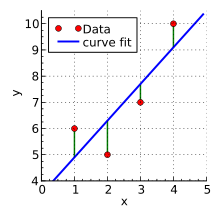  
  
Source: [Linear least squares](https://en.wikipedia.org/wiki/Linear_least_squares)

In [25]:
regression_model = model_log.model
print('Regression model used: ', regression_model)

Regression model used:  <statsmodels.regression.linear_model.OLS object at 0x796b497de980>


### No. Observations<a class="anchor"  id="no-observations"></a>

The number of samples or observations in the dataset used for the model

In [26]:
df_nobs, nobs_sqrt, nobs_log = generate_dict("nobs", 
                                          "Number of observations",
                                          index=0, 
                                          procs=[model_sqrt.nobs, model_log.nobs])

Number of observations :


model,model_Y-SQRT,model_Y-LOG-ROL-SQRD
nobs,131.0,131.0


### Degrees of Freedom<a class="anchor"  id="degrees-of-freedom"></a>

The degrees of freedom in linear regression refer to the number of samples that are used to fit the model. Suppose we have a dataset of 100 observations and two predictors. This problem suggests estimating a 3-D plane as the regression fit as we have two predictors, and we need at least three data points to form the regression plane. The $R^{2}$ will then be one as all three samples lie on that plane, and there won't be a case for regression at all. Therefore, we need more observations than three to make a regression analysis. The more data points we have, the more freedom we will have. In the dataset of 100 samples and two predictors, we have 97 (100-3) degrees of freedom.  
  
There are two types of degrees of freedom in linear regression: degrees of freedom for residuals (${dfr}$) and degrees of freedom for the model (${dfm}$). If ${n}$ represents the number of observations and ${k}$, the number of predictors (sometimes, we'll use $p$ to denote the number of predictors), ${dfr}$ is ${n-k-1}$, and ${dfm}$ is ${k}$. In ${dfr}$, we spare one for the `constant` term.

#### Df Residuals or Degrees of Freedom for Error (dfr)<a class="anchor"  id="dfr"></a>

In `MODEL_Y-SQRT`, we use seven parameters, in `MODEL_Y-LOG-ROL-SQRD`, eight parameters, including the `constant`.

In [27]:
df_dfr, dfr_sqrt, dfr_log = generate_dict("dfr", 
                                          "Df Residuals",
                                          index=0, 
                                          procs=[model_sqrt.df_resid, model_log.df_resid])

Df Residuals :


model,model_Y-SQRT,model_Y-LOG-ROL-SQRD
dfr,124.0,123.0


#### Df Model or Degrees of Freedom for Model (dfm)<a class="anchor"  id="dfm"></a>

In [28]:
df_dfm, dfm_sqrt, dfm_log = generate_dict("dfm", 
                                          "Df Model",
                                          index=0, 
                                          procs=[model_sqrt.df_model, model_log.df_model])

Df Model :


model,model_Y-SQRT,model_Y-LOG-ROL-SQRD
dfm,6.0,7.0


### Covariance Type<a class="anchor"  id="covariance-type"></a>

__Covariance type__ is typically nonrobust which means there is no elimination of data to calculate the covariance between features. __Covariance__ shows how two variables move with respect to each other. If this value is greater than 0, both move in same direction and if this is less than 0, the variables mode in opposite direction. __Covariance__ is difference from correlation. __Covariance__ does not provide the strength of the relationship, only the direction of movement whereas, correlation value is normalized and ranges between -1 to +1 and correlation provides the strength of relationship. If we want to obtain robust covariance, we can declare cov_type=HC0/HC1/HC2/HC3. However, the statsmodel documentation is not that rich to explain all these. HC stands for heteroscedasticity consistent and HC0 implements the simplest version among all. Source: [Simple Explanation of Statsmodel Linear Regression Model Summary](https://towardsdatascience.com/simple-explanation-of-statsmodel-linear-regression-model-summary-35961919868b)  
  
One who is curious about HC can check out: [A Tutorial on White’s Heteroskedasticity Consistent Estimator Using Python and Statsmodels](https://timeseriesreasoning.com/contents/a-tutorial-on-whites-heteroskedasticity-consistent-estimator-using-python-and-statsmodels/)  
  
By default, OLS results does not use covariance robust to heteroscedasticity (non-constant variance). If this causes a problem in the analysis, one can try robust covariance estimators. Source: [What does the covariance type mean in Statsmodels.api?](https://stackoverflow.com/a/67101414/10905535)  
  
See also: [OLSResults.get_robustcov_results](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.get_robustcov_results.html)  
  
The robust variance estimator is robust to _heteroscedasticity_. It should be used when _heteroscedasticity_ is, or is likely to be, present. We'll see _heteroscedasticity_ later in the notebook.  
  
HC1, HC2, HC3 improve upon HC0 to make it less biased for small sized data sets. Source: [A Tutorial on White’s Heteroskedasticity Consistent Estimator Using Python and Statsmodels](https://timeseriesreasoning.com/contents/a-tutorial-on-whites-heteroskedasticity-consistent-estimator-using-python-and-statsmodels/)  
  
Further explanation of HC types for anyone who is interested:  
  
"With the type argument, HC0 to HC3 types of bias adjustment can be employed, following the terminology used by MacKinnon and White (1985) for heteroscedasticity corrections. HC0 applies no small sample bias adjustment. HC1 applies a degrees of freedom-based correction, (𝑛−1)/(𝑛−𝑘) where 𝑛 is the number of observations and 𝑘 is the number of explanatory or predictor variables in the model. HC1 is the most commonly used approach for linear models, and HC0 otherwise. Hence these are the defaults in vcovCL. However, HC0 and HC1 are less effective than HC2 and HC3 when the number of clusters is relatively small (Cameron et al. 2008). HC2 and HC3 types of bias adjustment are geared towards the linear model, but they are also applicable for GLMs (see Bell and McCaffrey 2002, and Kauermann and Carroll 2001, for details). A precondition for HC2 and HC3 types of bias adjustment is the availability of a hat matrix (or a weighted version therof for GLMs) and hence these two types are currently only implemented for lm and glm objects." Source: [Clustered Covariance Matrix Estimation](https://sandwich.r-forge.r-project.org/reference/vcovCL.html)

In [29]:
df_cov_type, cov_type_sqrt, cov_type_log = generate_dict("cov_type", 
                                                            "Covariance Type",
                                                            index=0, 
                                                            procs=[model_sqrt.cov_type, model_log.cov_type])

Covariance Type :


model,model_Y-SQRT,model_Y-LOG-ROL-SQRD
cov_type,nonrobust,nonrobust


### Residual Sum of Squares (RSS) or Sum of Squares Error (SSE)<a class="anchor"  id="rss"></a>

__RSS__ is the amount of error that the model has failed to explain.  
  
$\large RSS= \sum_{i=1}^{n}\left (y_{i}-\hat{y}_{i} \right )^{2}$  

Where  
  
+ $y_{i}$ is the observed value of $Y$.  
+ $\hat{y}_{i}$ is the value predicted by the model.

In [30]:
df_rss, rss_sqrt, rss_log = generate_dict("rss", 
                                            "Residual Sum of Squares",
                                            index=0, 
                                            procs=[model_sqrt.ssr, 
                                                   model_log.ssr])

Residual Sum of Squares :


model,model_Y-SQRT,model_Y-LOG-ROL-SQRD
rss,128078.165,45.311


### Residual Standard Error (RSE)<a class="anchor"  id="rse"></a>

Even if we know the true regression line, we still won't be able to predict $Y$ from $X$, that is to say, an irreducible error term will always exist. The __RSE__ is an estimate of standard deviation of this error term. It is the average amount that the response will deviate from the true regression line.  
  
$\large RSE= \sqrt{\frac{1}{n-p-1}\times RSS}$  

Where  
  
+ $n$ is the total number of observations.  
+ $p$ is the total number of model parameters.

In [31]:
rse_sqrt = np.sqrt(rss_sqrt / dfr_sqrt)
print('Residual Standard Error for MODEL Y-SQRT: ', round(rse_sqrt, 3))
print("\n")

rse_log = np.sqrt(rss_log / dfr_log)
print('Residual Standard Error for MODEL Y-LOG ROL-SQRD: ', round(rse_log, 3))

Residual Standard Error for MODEL Y-SQRT:  32.139


Residual Standard Error for MODEL Y-LOG ROL-SQRD:  0.607


### Sum of Squares Regression (SSR) or Explained Sum of Squares (ESS)<a class="anchor"  id="ssr"></a>

__SSR__ or __ESS__ is the amount of error explained by the model and is calculated as the sum of squared differences between predicted data points and the mean of the response variable.  
  
$\large \sum_{i=1}^{n}\left(\hat{y}_{i}-\bar{y}\right)^{2}$  
  
Where  
  
+ $\hat{y}_{i}$ is the value predicted by the model.  
+ $\bar{y}$ is the mean of the response variable.

In [32]:
df_ess, ess_sqrt, ess_log = generate_dict("ess", 
                                            "Explained Sum of Squares",
                                            index=0, 
                                            procs=[model_sqrt.ess, 
                                                   model_log.ess])

Explained Sum of Squares :


model,model_Y-SQRT,model_Y-LOG-ROL-SQRD
ess,599597.522,220.53


### Total Sum of Squares (TSS)<a class="anchor"  id="tss"></a>

__TSS__ is the sum of unexplained variance and explained variance, i.e., _RSS_ and _SSR_, respectively:  
  
$\normalsize TSS= RSS+SSR$

In [33]:
tss_sqrt = rss_sqrt + ess_sqrt
print('Total Sum of Squares for MODEL Y-SQRT: ', round(tss_sqrt, 3))
print("\n")

tss_log = rss_log + ess_log
print('Total Sum of Squares for MODEL Y-LOG ROL-SQRD: ', round(tss_log, 3))

Total Sum of Squares for MODEL Y-SQRT:  727675.688


Total Sum of Squares for MODEL Y-LOG ROL-SQRD:  265.841


### Mean of Squares for Model (MSM) and Mean of Squares for Error (MSE)<a class="anchor"  id="msm-mse"></a>

__Mean of Squares for Model (MSM)__ is the explained sum of squares divided by the model degrees of freedom. Source: [statsmodels.regression.linear_model.OLSResults.mse_model](https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLSResults.mse_model.html)  
  
$\large MSM=\frac{SSR}{dfm}$  
  
__Mean of Squares for Error (MSE)__ is the mean squared error of the residuals. The sum of squared residuals divided by the residual degrees of freedom. Source: [statsmodels.regression.linear_model.OLSResults.mse_resid](https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLSResults.mse_resid.html)  
  
$\large MSE=\frac{RSS}{dfr}$

In [34]:
# Calculate MSM ve MSE with statmodels for MODEL Y-LOG ROL-SQRD
msm_log = model_log.mse_model
mse_log = model_log.mse_resid
print("Mean of Squares for Model (MODEL Y-LOG ROL-SQRD): ", round(msm_log, 3))
print("Mean of Squares for Error (MODEL Y-LOG ROL-SQRD): ", round(mse_log, 3))
print("\n")

# Calculate MSM ve MSE with statmodels for MODEL Y-SQRT
msm_sqrt = model_sqrt.mse_model
mse_sqrt = model_sqrt.mse_resid
print("Mean of Squares for Model (MODEL Y-SQRT): ", round(msm_sqrt, 3))
print("Mean of Squares for Error (MODEL Y-SQRT): ", round(mse_sqrt, 3))

Mean of Squares for Model (MODEL Y-LOG ROL-SQRD):  31.504
Mean of Squares for Error (MODEL Y-LOG ROL-SQRD):  0.368


Mean of Squares for Model (MODEL Y-SQRT):  99932.92
Mean of Squares for Error (MODEL Y-SQRT):  1032.888


### Root Mean Squared Error (RMSE)<a class="anchor"  id="rmse"></a>

__RMSE__ is the square root of _MSE_:  
  
$\large RMSE= \sqrt{MSE}$

In [35]:
rmse_sqrt = np.sqrt(mse_sqrt)
print('Root Mean Squared Error for MODEL Y-SQRT: ', round(rmse_sqrt, 3))
print("\n")

rmse_log = np.sqrt(mse_log)
print('Root Mean Squared Error for MODEL Y-LOG ROL-SQRD: ', round(rmse_log, 3))

Root Mean Squared Error for MODEL Y-SQRT:  32.139


Root Mean Squared Error for MODEL Y-LOG ROL-SQRD:  0.607


### R-squared<a class="anchor"  id="r-squared"></a>

In statistics, the coefficient of determination (${R}^2$) is the proportion of the variation in the dependent variable that is predictable from the independent variable(s). Source: [Coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)  
  
It is always between 0 and 1, and independent of the scale of ${Y}$. It measures the proportion of variability in ${Y}$ that can be explained using ${X}$.  
  
${R}^2$ is calculated as follows:  
  
$\large \frac{TSS - RSS}{TSS}$  
  
Where  
  
+ $TSS$ is the Total Sum of Squares  
+ $RSS$ is the Residual Sum of Squares

In [36]:
df_r2, r2_sqrt, r2_log = generate_dict("r2", 
                                          "R-squared",
                                          index=0, 
                                          procs=[model_sqrt.rsquared, model_log.rsquared])

R-squared :


model,model_Y-SQRT,model_Y-LOG-ROL-SQRD
r2,0.824,0.83


According to these results, at least 82% of the variation in the output variable is explained by the model's predictors.  
  
When the number of predictors increases, ${R}^2$ also increases. In other words, lowering degrees of freedom too much enhances the ${R}^2$ superficially. That causes overfitting and makes ${R}^2$ a less reliable measure of fitting quality. One remedy to it is to use Adjusted-${R}^2$.  
  
In our models, ${R}^2$s are high and reliable, indicating the predictive quality.

### Adjusted R-squared<a class="anchor"  id="adjusted-r-squared"></a>

Adjusted-${R}^2$ is a modified version of ${R}^2$ that has been adjusted for the number of predictors in the model. The adjusted ${R}^2$ increases when the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected. Typically, the adjusted ${R}^2$ is positive, not negative. It is always lower than the ${R}^2$. Source: [R-Squared vs. Adjusted R-Squared: What's the Difference?](https://www.investopedia.com/ask/answers/012615/whats-difference-between-rsquared-and-adjusted-rsquared.asp)  
  
Adjusting-R2 penalizes the addition of useless variables by considering the degrees of freedom.  
  
Adjusted-${R}^2$ is calculated as follows:  
  
$\large 1- \frac{\left (1 - R^{2}  \right )\left (n - 1 \right )}{n - p - 1}$  
  
Where  
  
+ $R^{2}$ is the R-squared.  
+ $n$ is the sample size.  
+ $p$ is the number of predictors.

In [37]:
df_adj_r2, adj_r2_sqrt, adj_r2_log = generate_dict("adj_r2", 
                                                      "Adjusted R-squared",
                                                      index=0, 
                                                      procs=[model_sqrt.rsquared_adj, model_log.rsquared_adj])

Adjusted R-squared :


model,model_Y-SQRT,model_Y-LOG-ROL-SQRD
adj_r2,0.815,0.82


Adjusted-${R}^2$s of our models are slightly less than ${R}^2$s, meaning that the correlation looks reliable.

### t-statistic (t)<a class="anchor"  id="t-statistic"></a>

${t}$ is the __t-statistic__ of the test and equal to the coefficient of a parameter divided by the standard error of that parameter. The larger the coefficient with respect to the standard error, the larger the __t-statistic__ is and higher the probability that the coefficient is away from 0.  
  
The null hypothesis we are testing suggests no relationship exists between an independent variable and the output. A high _t-value_ indicates a low probability that we reject the null hypothesis even though such a relationship doesn't exist indeed. The __t-statistic__ for a particular parameter is calculated as follows:  
  
$\Large t_{\hat{\beta}} = \frac{\hat{\beta}-0}{SE\left (\hat{\beta}\right)}$  
  
Where  
  
+ $t_{\hat{\beta}}$ is the t statistic  
+ $\hat{\beta}$ is the estimator of the parameter  
+ ${SE\left (\hat{\beta}\right)}$ is the standard error of the parameter  
  
Standard error is defined later.

In [38]:
df_t_stats, t_stats_sqrt, t_stats_log = generate_dict("t_stats", 
                                                      "t-values",
                                                      index=0, 
                                                      procs=[model_sqrt.tvalues, model_log.tvalues])

t-values :


model,model_Y-SQRT,model_Y-LOG-ROL-SQRD
t_stats,Intercept -11.332 C(Continent)[T.Asia] 2.993 C(Continent)[T.Europe] 4.425 C(Continent)[T.North America] 3.783 C(Continent)[T.Oceania] 2.054 C(Continent)[T.South America] 2.107 ROL 16.209 dtype: float64,Intercept 4.588 C(Continent)[T.Asia] 5.199 C(Continent)[T.Europe] 7.588 C(Continent)[T.North America] 7.274 C(Continent)[T.Oceania] 2.656 C(Continent)[T.South America] 5.650 ROL 2.163 ROL_SQRD -0.085 dtype: float64


We know that the model `Y-SQRT` has 124 degrees of freedom, and the model `Y-LOG-ROL-SQRD` has 123 degrees of freedom. Our confidence level is 95%, meaning there is only a 5% chance that we reject the null hypothesis even though no relationship exists between an independent variable and the dependent variable.  

Under these conditions, a __t-statistic__ of a parameter in both models is significant if it is larger than 1.98 or lower than -1.98. When we look at our _t-values_, we see that all parameters in both models are significant except _ROL_SQRD_ in `Y-LOG-ROL-SQRD`. We should remove _ROL_SQRD_ from the model. Each of other predictors is related to the label. The rejection of the null hypothesis for them is further corroborated by the p-values.

### p-values (P>|t|)<a class="anchor"  id="p-values"></a>

The t-statistic is compared with the t distribution to determine the __p-value__. We usually only consider the __p-value__ of the independent variable which provides the likelihood of obtaining a sample as close to the one used to derive the regression equation and verify if the slope of the regression line is actually zero or the coefficient is close to the coefficient obtained.  
  
A __p-value__ below 0.05 indicates 95% confidence that the slope of the regression line is not zero and hence there is a significant linear relationship between the dependent and independent variables.  
  
A __p-value__ greater than 0.05 indicates that the slope of the regression line may be zero and that there is not sufficient evidence at the 95% confidence level that a significant linear relationship exists between the dependent and independent variables. Source: [How to read a Regression Table](https://www.freecodecamp.org/news/https-medium-com-sharadvm-how-to-read-a-regression-table-661d391e9bd7-708e75efc560)  
  
5% is known as `α` which indicates `Type I` error and represents the probability for rejection of the true null hypothesis. If the null hypothesis is true, increasing `α` makes it more likely that we commit a `Type I` error (rejecting a true null hypothesis).  
  
Since all our parameters are significant except the _ROL_SQRD_ in `Y-LOG-ROL-SQRD`, they should have __p-values__ lower than 0.05.

In [39]:
df_p_stats, p_stats_sqrt, p_stats_log = generate_dict("p_stats", 
                                                      "p-values",
                                                      index=0, 
                                                      procs=[model_sqrt.pvalues, model_log.pvalues])

p-values :


model,model_Y-SQRT,model_Y-LOG-ROL-SQRD
p_stats,Intercept 0.000 C(Continent)[T.Asia] 0.003 C(Continent)[T.Europe] 0.000 C(Continent)[T.North America] 0.000 C(Continent)[T.Oceania] 0.042 C(Continent)[T.South America] 0.037 ROL 0.000 dtype: float64,Intercept 0.000 C(Continent)[T.Asia] 0.000 C(Continent)[T.Europe] 0.000 C(Continent)[T.North America] 0.000 C(Continent)[T.Oceania] 0.009 C(Continent)[T.South America] 0.000 ROL 0.033 ROL_SQRD 0.932 dtype: float64


Really, the p-value for ROL_SQRD is 0.932.

### F statistic<a class="anchor"  id="f-statistic"></a>

__F-statistic__ is used to test the hypothesis that the slope of the independent variable is zero. This is otherwise calculated by comparing the __F-statistic__ to an _F distribution_ with _regression df_ in numerator and _residual df_ in denominator.  
  
__F-statistic__ is particularly used in multiple regressions. The goal is to test if any regression coefficients are zero. The alternative hypothesis is that at least one coefficient is non-zero. When there doesn't exist a relationship between the response and predictors, __F-statistic__ takes on a value close to 1. If the alternative hypothesis is true (a relationship exists), the value is greater than 1. However, being greater than 1 may not be enough to verify the alternative hypothesis. It all depends on the number of observations ($n$) and the number of predictors ($p$). When $n$ is large with respect to $p$, an __F-statistic__ a little larger than 1 can be sufficient to reject the null hypothesis or accept the alternative hypothesis. Otherwise, larger values of __F-statistic__ are needed.  
  
__F-statistic__ is nothing but the _p-value_ for the null hypothesis that the coefficient of the independent variable is zero and as with any _p-value_, a low _p-value_ indicates that a significant relationship exists between dependent and independent variable. Source: [How to read a Regression Table](https://www.freecodecamp.org/news/https-medium-com-sharadvm-how-to-read-a-regression-table-661d391e9bd7-708e75efc560)  
  
_P-values_ and __F-statistic__ are complementary. In a multiple regression setting, neither is sufficient by itself. Even though we have __F-statistic__ value less than one, we might still end up with about 5% of _p-values_ less than $α$, which is 5% by chance, indicating that some independent variables are related to the dependent variable. That happens even in the absence of any true association between predictors and response, indeed.  
  
Another consideration is when we have $p > n$. In this case, we cannot use least squares, multiple regression, and __F-statistic__.  
  
_Calculation of F statistic:_  
Source: [The F-test for Linear Regression](http://facweb.cs.depaul.edu/sjost/csc423/documents/f-test-reg.htm)  
  
$\large MSM=\frac{SSR}{df}$  
  
$\large MSE=\frac{RSS}{dfr}$  
  
Where  
  
+ $MSM$ is the Mean of Squares for Model  
+ $MSE$ is the Mean of Squares for Error  
+ $SSR$ is Sum of Squares Regression (SSR) or Explained Sum of Squares (ESS). $SSR$ is the amount of variance which is explained by the model.  
+ $RSS$ is Residual Sum of Squares (RSS) or Sum of Squares Error (SSE). $RSS$ is the amount of variance which is not explained by the model.  
+ $df$ is the Df Model or Degrees of Freedom for Model.  
+ $dfr$ is Df Residuals or Degrees of Freedom for Error  
  
$\large F = \frac{MSM}{MSE} = (explained\;variance)\;/\;(unexplained\;variance)$

`statmodels` provides us with __F-statistic__ in the following way:

In [40]:
# Compute F-statistics
f_stat_log = model_log.fvalue
f_stat_sqrt = model_sqrt.fvalue
print('F statistic for MODEL Y-LOG ROL-SQRD: ', round(f_stat_log, 1))
print('F statistic for MODEL Y-SQRT: ', round(f_stat_sqrt, 1))

F statistic for MODEL Y-LOG ROL-SQRD:  85.5
F statistic for MODEL Y-SQRT:  96.8


Alternatively, we can compute __F-statistic__ according to the formula above.

In [41]:
# Compute F-statistic for MODEL Y-LOG ROL-SQRD
F_stat_log = msm_log / mse_log
print('F statistic for MODEL Y-LOG ROL-SQRD: ', round(F_stat_log, 1))
print("\n")

# Compute F-statistic for MODEL Y-SQRT
F_stat_sqrt = msm_sqrt / mse_sqrt
print('F statistic for MODEL Y-SQRT: ', round(F_stat_sqrt, 1))

F statistic for MODEL Y-LOG ROL-SQRD:  85.5


F statistic for MODEL Y-SQRT:  96.8


The following is the same as above, just using utility functions.

In [42]:
df_msm, msm_sqrt, msm_log = generate_dict("msm", 
                                          "Mean of Squares for Model",
                                          index=0, 
                                          procs=[model_sqrt.mse_model, model_log.mse_model])

Mean of Squares for Model :


model,model_Y-SQRT,model_Y-LOG-ROL-SQRD
msm,99932.92,31.504


In [43]:
df_mse, mse_sqrt, mse_log = generate_dict("mse", 
                                          "Mean of Squares for Error",
                                          index=0, 
                                          procs=[model_sqrt.mse_resid, model_log.mse_resid])

Mean of Squares for Error :


model,model_Y-SQRT,model_Y-LOG-ROL-SQRD
mse,1032.888,0.368


In [44]:
df_f_stats, f_stats_sqrt, f_stats_log = generate_dict("f_stats", 
                                                      "f-values",
                                                      index=0, 
                                                      procs=[model_sqrt.fvalue, model_log.fvalue])

f-values :


model,model_Y-SQRT,model_Y-LOG-ROL-SQRD
f_stats,96.751,85.521


### Prob (F-statistic)<a class="anchor"  id="f-statistic-prob"></a>

__Prob (F-statistic)__ denotes the probability that _F-statistic_ is equal to zero, and calculated by comparing the _F-statistic_ to an $F$ distribution with regression df ($df$) in numerator and residual df ($dfr$) in denominator. A __Prob (F-statistic)__ value lower than 0.05 indicates that coefficients are different from zero and we can reject the null hypothesis.  
  
"However, there may be some cases when __Prob (F-statistic)__ may be greater than 0.05 but one of the independent variable shows strong correlation. This is because each _t-test_ is carried out with different set of data whereas _F-test_ checks the combined effect including all variables globally."Source: [Simple Explanation of Statsmodel Linear Regression Model Summary](https://towardsdatascience.com/simple-explanation-of-statsmodel-linear-regression-model-summary-35961919868b)  
  
The opposite is also true, as in our case. __Prob (F-statistic)__ for our models are almost zero, indicating a strong correlation of independent variables with the output value, yet, as we have seen before, _ROL_SQRD_ in `Y-LOG-ROL-SQRD` was not significant.

In [45]:
df_f_prob, f_prob_sqrt, f_prob_log = generate_dict("f_prob", 
                                                  "F probability",
                                                  index=0, 
                                                  procs=[model_sqrt.f_pvalue, model_log.f_pvalue])

F probability :


model,model_Y-SQRT,model_Y-LOG-ROL-SQRD
f_prob,0.0,0.0


### Scale<a class="anchor"  id="scale"></a>

__Scale__ is a scale factor for the covariance matrix. The default value is:  
  
$\large Scale= \frac{RSS}{\left ( n-p \right )}$  
  
Where  
  
+ $RSS$ is the Residual Sum of Squares  
+ $n$ is the sample size.  
+ $p$ is the number of predictors.  
  
In this notebook, $p$ and $k$ are used interchangeably depending on the source, however, they denote the same.  

Note that the square root of __Scale__ is often called the standard error of the regression. __Scale__ is also the same as _Mean Squared Error (MSE)_ adjusted for the number of predictors. Source: [statsmodels.regression.linear_model.OLSResults.scale](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLSResults.scale.html)  

__Scale__ shows how good the model is fit. A small __Scale__ value means that the model fits the data well and residuals are small. A higher __Scale__ value indicates that the model's fit is not good and has large residuals.

In [46]:
df_scale, scale_sqrt, scale_log = generate_dict("scale", 
                                                  "Scale",
                                                  index=0, 
                                                  procs=[model_sqrt.scale, model_log.scale])

Scale :


model,model_Y-SQRT,model_Y-LOG-ROL-SQRD
scale,1032.888,0.368


Obviously, the model `Y-LOG-ROL-SQRD` has a much better fit than the other model.

### Log-Likelihood<a class="anchor"  id="log-likelihood"></a>

The __log-likelihood__ value is a measure for fit of the model with the given data. It is useful when we compare two or more models. The higher the value of __log-likelihood__, the better the model fits the given data. It can range from negative infinity to positive infinity. [Source: Simple Explanation of Statsmodel Linear Regression Model Summary](https://towardsdatascience.com/simple-explanation-of-statsmodel-linear-regression-model-summary-35961919868b)  
  
The actual __log-likelihood__ value for a given model is mostly meaningless, but it’s useful for comparing two or more models.  When calculating __log-likelihood__ values, it’s important to note that adding more predictor variables to a model will almost always increase the __log-likelihood__ value even if the additional predictor variables aren’t statistically significant.  
  
This means you should only compare the __log-likelihood__ values between two regression models if each model has the same number of predictor variables.  
  
To compare models with different numbers of predictor variables, you can perform a likelihood-ratio test to compare the goodness of fit of two nested regression models. Source: [How to Interpret Log-Likelihood Values (With Examples)](https://www.statology.org/interpret-log-likelihood/)  
  
The formula for __log-likelihood__ is:  
  
$\large Log L = -\frac{1}{2}n\left [ log\left ( 2\pi\right )+log\left ( \frac{SSE}{n}\right)+1\right ]$

In [47]:
df_llf, llf_sqrt, llf_log = generate_dict("llf", 
                                          "Log-Likelihood",
                                          index=0, 
                                          procs=[model_sqrt.llf, model_log.llf])

Log-Likelihood :


model,model_Y-SQRT,model_Y-LOG-ROL-SQRD
llf,-636.861,-116.343


Given the __log-likelihood__ values, the model `Y-LOG-ROL-SQRD` seems to do better than the model `Y-SQRT`. However, the former has one more variable than the latter. So, it's necessary to look at the likelihood-ratio test.

### Likelihood-Ratio Test<a class="anchor"  id="likelihood-ratio-test"></a>

A __likelihood ratio test__ is a hypothesis test that compares the goodness of fit of two models. In this test, we have a null model (${H_0}$) and an alternative model (${H_1}$). The null model represents a simplified version (with fewer parameters), while the alternative model is a more complex version (with more parameters).  
  
We compute the likelihoods of both models and take the ratio of the two. The resulting value, the __likelihood ratio__, is then used to compute a test statistic, which is distributed approximately as a _chi-square_ distribution. If the _chi-square_ test statistic is sufficiently large, this leads to the rejection of the null hypothesis in favor of the alternative model. Source: [How to Perform a Likelihood Ratio Test in Python](https://lifewithdata.com/2023/06/06/how-to-perform-a-likelihood-ratio-test-in-python/)  
  
$\large LR = -2 \left (L_{1}-L_{2} \right)$  
  
Where  
  
+ $L_{1}$ is the log-likelihood of the first model  
+ $L_{2}$ is the log-likelihood of the second model

First, we compute the __likelihood ratio__, which is -2 times the log of the ratio of the likelihoods of the null model to the alternative model. Source: [How to Perform a Likelihood Ratio Test in Python](https://lifewithdata.com/2023/06/06/how-to-perform-a-likelihood-ratio-test-in-python/)

In [48]:
likelihood_ratio = -2 * (llf_sqrt - llf_log)
print("Likelihood Ratio between MODEL Y-LOG ROL-SQRD and MODEL Y-SQRT: ", round(likelihood_ratio, 2))

Likelihood Ratio between MODEL Y-LOG ROL-SQRD and MODEL Y-SQRT:  1041.04


Next, we need to know the number of degrees of freedom for the _chi-square_ distribution. This is equal to the difference in the number of parameters in the two models.

In [49]:
dfm_diff = dfm_log - dfm_sqrt
print("Difference of Df-Models between MODEL Y-LOG ROL-SQRD and MODEL Y-SQRT: ", dfm_diff)

Difference of Df-Models between MODEL Y-LOG ROL-SQRD and MODEL Y-SQRT:  1.0


Finally, we compare our likelihood ratio to the _chi-square_ distribution with the appropriate degrees of freedom. This gives us the p-value for our __likelihood ratio test__.

In [50]:
p_value = stats.chi2.sf(likelihood_ratio, dfm_diff)
print('p-value for the likelihood ratio between MODEL Y-LOG ROL-SQRD and MODEL Y-SQRT: ', round(p_value, 3))

p-value for the likelihood ratio between MODEL Y-LOG ROL-SQRD and MODEL Y-SQRT:  0.0


If the p-value is small (typically less than 0.05), we can reject the null hypothesis in favor of the alternative hypothesis, indicating that the additional parameters in the alternative model significantly improve the fit of the model.  
  
__Likelihood-Ratio Test__ doesn't apply to our case. The model `Y-LOG-ROL-SQRD` has one more variable than the model `Y-SQRT`. However, the former's independent variable set is still not identical to the latter's without that extra predictor. A more exact case to employ the __Likelihood-Ratio Test__ can be comparing `model A` with ${X_1}$ and ${X_2}$ independent variables with `model B` with ${X_1}$, ${X_2}$, and ${X_3}$ as specified in the definition. Above, we just showed calculations to give an idea.

### AIC<a class="anchor"  id="aic"></a>

__AIC__ stands for __Akaike’s Information Criteria__. In estimating the amount of information lost by a model, __AIC__ deals with the trade-off between the goodness of fit of the model and the simplicity of the model. In other words, __AIC__ deals with both the risk of overfitting and the risk of underfitting. Given a set of candidate models for the data, the preferred model is the one with the minimum AIC value. Source: [Akaike information criterion](https://en.wikipedia.org/wiki/Akaike_information_criterion)  
  
Suppose that there are R candidate models. Denote the __AIC__ values of those models by ${AIC_1}$, ${AIC_2}$, ${AIC_3}$, ..., ${AIC_R}$. Let ${AIC_{min}}$ be the minimum of those values. Then the quantity $e^{((AIC_{min}-AIC_i)/2)}$ can be interpreted as being proportional to the probability that the ${i}$th model minimizes the (estimated) information loss.  
  
As an example, suppose that there are three candidate models, whose __AIC__ values are 100, 102, and 110. Then the second model is $exp((100 − 102)/2) = 0.368$ times as probable as the first model to minimize the information loss. Similarly, the third model is $exp((100 − 110)/2) = 0.007$ times as probable as the first model to minimize the information loss.  

In this example, we would omit the third model from further consideration. We then have three options: (1) gather more data, in the hope that this will allow clearly distinguishing between the first two models; (2) simply conclude that the data is insufficient to support selecting one model from among the first two; (3) take a weighted average of the first two models, with weights proportional to 1 and 0.368, respectively, and then do statistical inference based on the weighted multimodel.  

$\Delta AIC=AIC_i-AIC_{min}$  
  
Where:  
  
$AIC_i$ is the score for the particular model ${i}$  
$AIC_{min}$ is the score for the “best” model  
  
Burnham and Anderson (2003) give the following rule of thumb for interpreting the $\Delta AIC$ Scores:  

$\Delta AIC\leq  2\rightarrow$ substantial evidence for the model  
$4\leq \Delta AIC\leq  7\rightarrow$ less support for the model  
$\Delta AIC> 10\rightarrow$ no support for the model  
Source: [Understanding AIC and BIC in Model Selection](https://www.uvm.edu/~bmitchel/NR385/Burnham_Multimodel_inference.pdf)  
  
The formula for __AIC__ is:  
  
$\large AIC = -2\left ( L \right )+2k$  
  
Where  
  
+ $L$ is the log-likelihood of the model.  
+ $k$ is the number of model parameters (the number of the variables in the model plus the intercept).  
  
Source: [Akaike’s Information Criterion: Definition, Formulas](https://www.statisticshowto.com/akaikes-information-criterion/)  
  
When the sample size is small, there is a substantial probability that __AIC__ will select models that have too many parameters, i.e. that __AIC__ will overfit. To address such potential overfitting, ${AIC_c}$ was developed: ${AIC_c}$ is __AIC__ with a correction for small sample sizes.  
  
The formula for ${AIC_c}$ depends upon the statistical model. Assuming that the model is univariate, is linear in its parameters, and has normally-distributed residuals (conditional upon regressors), then the formula for ${AIC_c}$ is as follows:  
  
$\large AIC_{c}= AIC + \frac{\left ( 2k^{2}+2k\right )}{\left ( n-k-1 \right )}$  
  
Sources: [Akaike information criterion](https://en.wikipedia.org/wiki/Akaike_information_criterion), [Understanding AIC and BIC in Model Selection](https://www.uvm.edu/~bmitchel/NR385/Burnham_Multimodel_inference.pdf)

In [51]:
df_aic, aic_sqrt, aic_log = generate_dict("aic", 
                                          "AIC",
                                          index=0, 
                                          procs=[model_sqrt.aic, model_log.aic])

AIC :


model,model_Y-SQRT,model_Y-LOG-ROL-SQRD
aic,1287.723,248.685


AIC of the model `Y-LOG-ROL-SQRD` is substantially lower than that of the model `Y-SQRT`.

### BIC or SIC<a class="anchor"  id="bic"></a>

__BIC__ stands for __Bayesian Information Criterion__. __BIC__ is also known as the __SIC__ which stands for _Schwarz Information Criterion_. Source: [Bayesian Information Criterion (BIC) / Schwarz Criterion](https://www.statisticshowto.com/bayesian-information-criterion/)  
  
$k*log(n)-2*log(L(\widehat{\theta}))$  
  
Here $n$ is the sample size; the number of observations or number of data points you are working with. $k$ is the number of parameters which your model estimates, and ${\theta}$ is the set of all parameters.  
  
$L(\widehat{\theta})$ represents the likelihood of the model tested, given your data, when evaluated at maximum likelihood values of ${\theta}$. You could call this the likelihood of the model given everything aligned to their most favorable.  
  
Another way of understanding $L(\widehat{\theta})$ is that it is the probability of obtaining the data which you have, supposing the model being tested was a given.  
  
Comparing models with the __BIC__ simply involves calculating the __BIC__ for each model like _AIC_. The model with the lowest __BIC__ is considered the best, and can be written ${BIC}^*$ (or ${SIC}^*$ if you use that name and abbreviation).  
  
We can also calculate the $\Delta BIC$; the difference between a particular model and the ‘best’ model with the lowest __BIC__, and use it as an argument against the other model. $\Delta BIC$ is just ${BIC}_{model}-{BIC}^*$, where ${BIC}^*$ is the best model.  
  
If $\Delta BIC$ is less than 2, it is considered ‘barely worth mentioning’ as an argument either for the best theory or against the alternate one. The edge it gives our best model is too small to be significant. But if $\Delta BIC$ is between 2 and 6, one can say the evidence against the other model is positive; i.e. we have a good argument in favor of our ‘best model’. If it’s between 6 and 10, the evidence for the best model and against the weaker model is strong. A $\Delta BIC$ of greater than 10 means the evidence favoring our best model vs the alternate is very strong indeed.  

Suppose you have a set of data with 50 observation points, and Model 1 estimates 3 parameters. Model 2 estimates 4 parameters. Let’s say the log of your maximum likelihood for model 1 is $a$; and for model 2 it is $2a$. Using the formula $k*log(n)-2*log(L(\widehat{\theta}))$:  
  
Calculating __BIC__ on this data gives us:  
  
$Model\,1: 3log(50) – 2a = 5.1 – 2a$  
  
$Model\,2: 4log(50) – 4a = 6.8 – 4a$  
  
So $\Delta BIC$ is $1.7 – 2a$  
  
Since the evidence that the __BIC__ gives us for model 1 will only be ‘worth mentioning’ if $1.7 – 2a > 2$, we can only claim conclusive results if $-2a > 0.3$; that is to say, $a < -0.15$.  
Source: [Bayesian Information Criterion (BIC) / Schwarz Criterion](https://www.statisticshowto.com/bayesian-information-criterion/)  
  
To summarize, __BIC__ is calculated as follows:  
  
$\large BIC= k*log(n)-2L$  
  
Where  
  
+ $L$ is the log-likelihood of the model.  
+ $n$ is the number of examples in the training dataset.  
+ $k$ is the number of parameters in the model.

In [52]:
df_bic, bic_sqrt, bic_log = generate_dict("bic", 
                                          "BIC",
                                          index=0, 
                                          procs=[model_sqrt.bic, model_log.bic])

BIC :


model,model_Y-SQRT,model_Y-LOG-ROL-SQRD
bic,1307.849,271.687


As in _AIC_, __BIC__ tells us that the model `Y-LOG ROL-SQRD` performs far better than the model `Y-SQRT`. The former's __BIC__ is considerably lower than the latter's.</font>

### Coefficients (coef)<a class="anchor"  id="coefficients"></a>

The __coef__ column represents the coefficients for each independent variable and the intercept value.  
Source: [Simple Explanation of Statsmodel Linear Regression Model Summary](https://towardsdatascience.com/simple-explanation-of-statsmodel-linear-regression-model-summary-35961919868b)

In [53]:
df_coeffs, coeffs_sqrt, coeffs_log = generate_dict("coeffs", 
                                                      "Coefficients",
                                                      index=0, 
                                                      procs=[model_sqrt.params, model_log.params])

Coefficients :


model,model_Y-SQRT,model_Y-LOG-ROL-SQRD
coeffs,Intercept -144.257 C(Continent)[T.Asia] 25.104 C(Continent)[T.Europe] 40.539 C(Continent)[T.North America] 35.265 C(Continent)[T.Oceania] 51.150 C(Continent)[T.South America] 23.534 ROL 403.617 dtype: float64,Intercept 4.201 C(Continent)[T.Asia] 0.824 C(Continent)[T.Europe] 1.313 C(Continent)[T.North America] 1.290 C(Continent)[T.Oceania] 1.258 C(Continent)[T.South America] 1.203 ROL 6.899 ROL_SQRD -0.224 dtype: float64


### Standard Error (std err)<a class="anchor"  id="standard-error"></a>

__Standard Error__ provides the estimated standard deviation of the distribution of coefficients. It is the amount by which the coefficient varies across different cases. A coefficient much greater than its __standard error__ implies a probability that the coefficient is not 0. Source: [How to read a Regression Table](https://www.freecodecamp.org/news/https-medium-com-sharadvm-how-to-read-a-regression-table-661d391e9bd7-708e75efc560)  
  
A coefficient can take on values on different datasets. Thus, __standard error__ shows by which amount a coefficient can vary across different sample datasets. A specific formulae exist to calculate the __standard errors__ for the intercept and predictors. The lower the error and/or the higher the coefficients, the higher probability that coefficients are non-zero. It is the same as saying a relationship exists between predictors and response, so we can reject the null hypothesis. $t$ values we saw before is calculated by dividing the coefficient by its __standard error__.  
  
The __standard error__ of the intercept (SE) can be calculated using the following formula:  
Source: [How to Calculate Slope and Intercept Error of Linear Regression](https://saturncloud.io/blog/how-to-calculate-slope-and-intercept-error-of-linear-regression/)  
  
$\Large SE\left ( \hat{\beta}_{0}  \right )= \sqrt{\frac{\sum_{i=1}^{n}\left (y_{i}-\hat{y}_{i} \right )^{2}}{\left ( n-2 \right )}}\times \sqrt{\frac{1}{n}+\frac{\bar{x}^{2}}{\sum_{i=1}^{n}\left ( x_{i}-\bar{x} \right )^{2}}}$  
  
The __standard error__ of the slope (SE) can be calculated using the following formula:  
  
$\Large SE\left ( \hat{\beta}_{1}  \right )= \frac{\sqrt{\frac{\sum_{i=1}^{n}\left (y_{i}-\hat{y}_{i} \right )^{2}}{\left ( n-2 \right )}}}{\sqrt{\sum_{i=1}^{n}\left (x_{i}-\bar{x} \right )^{2}}}$  
  
Where  
  
+ $n$ is the number of observations.  
+ $\bar{x}$ is the mean of $X$.  
+ ${x}_{i}$ is the value of $X$ for the $i$th observation.  
+ ${y}_{i}$ is the observed value of $Y$ for the $i$th observation.  
+ $\hat{y}_{i}$ is the predicted value of $Y$ for the $i$th observation.

In [54]:
df_std_err, std_err_sqrt, std_err_log = generate_dict("std_err", 
                                                      "Standard Errors",
                                                      index=0, 
                                                      procs=[model_sqrt.bse, model_log.bse])

Standard Errors :


model,model_Y-SQRT,model_Y-LOG-ROL-SQRD
std_err,Intercept 12.730 C(Continent)[T.Asia] 8.388 C(Continent)[T.Europe] 9.161 C(Continent)[T.North America] 9.323 C(Continent)[T.Oceania] 24.908 C(Continent)[T.South America] 11.170 ROL 24.900 dtype: float64,Intercept 0.915 C(Continent)[T.Asia] 0.159 C(Continent)[T.Europe] 0.173 C(Continent)[T.North America] 0.177 C(Continent)[T.Oceania] 0.473 C(Continent)[T.South America] 0.213 ROL 3.190 ROL_SQRD 2.626 dtype: float64


### Confidence interval (2.5% - 97.5%)<a class="anchor"  id="confidence-interval"></a>

We know that standard error shows by which amount a coefficient can vary across different sample datasets. But, we don't know if a coefficient we found from a sample dataset is the same as the coefficient of the population dataset. Probably not. Therefore, we should set a range so that it will contain coeffcients we have found with 95% probability. 95% of the intervals we construct from the repeated samples will contain the true coefficient of the parameter. That translates into two standard errors to the left and right of a coefficient in statistical terms:  
  
$ \large \left [\hat{\beta}_{1}-2\times SE\left ( \hat{\beta}_{1}  \right ),\;\hat{\beta}_{1}+2\times SE\left ( \hat{\beta}_{1}  \right )\right ]$

In [55]:
conf_intervals_sqrt = model_sqrt.conf_int()
print('Confidence intervals for MODEL Y-SQRT: ', "\n", conf_intervals_sqrt)

Confidence intervals for MODEL Y-SQRT:  
                                      0        1
Intercept                     -169.453 -119.060
C(Continent)[T.Asia]             8.501   41.707
C(Continent)[T.Europe]          22.407   58.671
C(Continent)[T.North America]   16.812   53.718
C(Continent)[T.Oceania]          1.850  100.450
C(Continent)[T.South America]    1.426   45.643
ROL                            354.333  452.902


In [56]:
conf_intervals_log = model_log.conf_int()
print('Confidence intervals for MODEL Y-LOG ROL-SQRD: ', "\n", conf_intervals_log)

Confidence intervals for MODEL Y-LOG ROL-SQRD:  
                                    0       1
Intercept                      2.389   6.013
C(Continent)[T.Asia]           0.510   1.138
C(Continent)[T.Europe]         0.970   1.655
C(Continent)[T.North America]  0.939   1.641
C(Continent)[T.Oceania]        0.321   2.195
C(Continent)[T.South America]  0.781   1.624
ROL                            0.585  13.214
ROL_SQRD                      -5.421   4.974


Confidence interval presented in the regression results table means that there is a 95% probability that the true value of the coefficient lies within this interval. For example, in the model `Y-LOG ROL-SQRD`, the confidence interval for the continent Asia variable ranges from 0.510 to 1.138, indicating there is a 95% probability that the true coefficient for _Asia_ is between these boundaries.

## Issues<a class="anchor"  id="issues"></a>

Linear regression makes some assumptions. The model yields accurate results when these assumptions are met. In case an assumption is violated, it becomes an issue we should fix before performing the analysis and interpreting the results. Those assumptions are:  
  
* __Linearity__: The relationship between the dependent and independent variables is linear.  
* __Independence__: The observations are independent of each other.  
* __Homoscedasticity__: The variance of the errors is constant across all levels of the independent variables.  
* __Normality__: The errors follow a normal distribution.  
* __No multicollinearity__: The independent variables are not highly correlated with each other.  
* __No endogeneity__: There is no relationship between the errors and the independent variables.  
Source: [6 Assumptions of Linear Regression: Plots and Solutions](https://www.analyticsvidhya.com/blog/2016/07/deeper-regression-analysis-assumptions-plots-solutions/)  
  
We should pay attention to the summary table of the regression and some statistical metrics to check if any of those assumptions are broken. We will see several tests and metrics here. Many of them are provided by `statsmodels` such as:  
  
* Omnibus  
* Prob(Omnibus)  
* Skew  
* Kurtosis  
* Durbin-Watson  
* Jarque-Bera (JB)  
* Prob(JB)  
* Cond. No

### Normality<a class="anchor"  id="normality"></a>

#### Omnibus<a class="anchor"  id="omnibus"></a>

In the statsmodels, __Omnibus__ is a test that describes the normality of the distribution of residuals using skewness and kurtosis of them. If the value is zero, the residuals are perfectly normal. Source: [Interpreting Linear Regression Through statsmodels.summary()](https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a)  
  
"If the __Omnibus__ test statistic is large and the associated _p-value_ is small (typically less than 0.05), it suggests that the normality assumption of the residuals is violated, and the residuals are not normally distributed. This may indicate that the regression model is misspecified or that there are other underlying problems with the data. On the other hand, if the Omnibus test statistic is small and the associated _p-value_ is large (typically greater than 0.05), it suggests that there is no evidence to reject the normality assumption of the residuals, and the residuals are likely to be normally distributed. This indicates that the regression model is a good fit for the data." Source: [How to interpret the model summary in statsmodels](https://tracyrenee61.medium.com/how-to-interpret-the-model-summary-in-statsmodels-f641affc7c14)

In [57]:
# Testing the normality of residuals' distribution
# Testing the skewness and kurtosis of the model residuals, Omnibus chi^2 statistic 

df_omni, omni_sqrt, omni_log = generate_dict("omnibus", 
                                          "Omnibus",
                                          index=0, 
                                          procs=[tuple(omni_normtest(residuals_sqrt)), 
                                                 tuple(omni_normtest(residuals_log))])

Omnibus :


model,model_Y-SQRT,model_Y-LOG-ROL-SQRD
omnibus,29.412,1.077


#### Prob(Omnibus)<a class="anchor"  id="omnibus-prob"></a>

__Prob(Omnibus)__ is the _p-value_ associated with the _Omnibus test statistic_, and measures the probability the residuals are normally distributed. It tests the null hypothesis that the residuals in a linear regression model are normally distributed. A 1 would indicate perfectly normal distribution.  
  
"A small __Prob(Omnibus)__ value (typically less than 0.05) indicates that there is evidence to reject the null hypothesis and suggests that the residuals are not normally distributed. On the other hand, a large __Prob(Omnibus)__ value (typically greater than 0.05) indicates that there is no evidence to reject the null hypothesis and suggests that the residuals are likely to be normally distributed. In general, a low __Prob(Omnibus)__ value indicates that there may be problems with the linear regression model and the assumptions underlying the model, such as nonlinearity or heteroscedasticity in the data." Source: [How to interpret the model summary in statsmodels](https://tracyrenee61.medium.com/how-to-interpret-the-model-summary-in-statsmodels-f641affc7c14)

In [58]:
# Testing the normality of residuals' distribution
# Omnibus Two-tail probability

df_omni_prob, omni_prob_sqrt, omni_prob_log = generate_dict("omni_prob", 
                                                              "Omnibus Probability",
                                                              index=1, 
                                                              procs=[tuple(omni_normtest(residuals_sqrt)), 
                                                                     tuple(omni_normtest(residuals_log))])

Omnibus Probability :


model,model_Y-SQRT,model_Y-LOG-ROL-SQRD
omni_prob,0.0,0.584


Given the results, the residuals of the model `Y-LOG ROL-SQRD` are normally distributed, while the residuals of the model `Y-SQRT` are not. The former has a low _Omnibus_ value and a __Prob(Omnibus)__ value higher than 5%. These results suggest we further look into issues related to the `Y-SQRT`. We'll do it later.

#### Skewness<a class="anchor"  id="skewness"></a>

_Pearson mode_ __skewness__, also called _Pearson’s first coefficient of_ __skewness__, is a way to figure out the __skewness__ of a distribution. Source: [Pearson Mode Skewness](https://www.statisticshowto.com/pearson-mode-skewness/)  
  
The mean, mode and median can be used to figure out if you have a positively or negatively skewed distribution.  
  
+ If the mean is greater than the mode, the distribution is positively skewed.  
+ If the mean is less than the mode, the distribution is negatively skewed.  
+ If the mean is greater than the median, the distribution is positively skewed.  
+ If the mean is less than the median, the distribution is negatively skewed.  
  
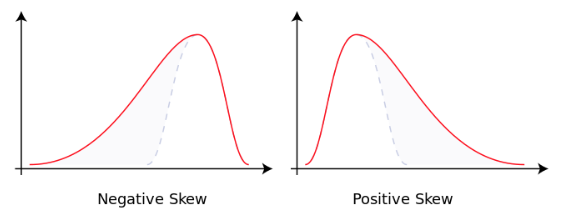  
Image source: [Skewness](https://en.wikipedia.org/wiki/Skewness)

A positive skew value indicates that the distribution of the residuals is skewed to the right, meaning that there are more extreme positive residuals than negative residuals. A negative skew value indicates that the distribution of the residuals is skewed to the left, meaning that there are more extreme negative residuals than positive residuals. Source: [How to interpret the model summary in statsmodels](https://tracyrenee61.medium.com/how-to-interpret-the-model-summary-in-statsmodels-f641affc7c14)  
  
Pearson mode __skewness__ uses the above facts to help you find out if you have positive or negative skewness. If you have a distribution and you know the mean, mode, and standard deviation (σ), then the Pearson mode __skewness__ formula is:  
  
$\normalsize Pearson\;Mode\;Skewness = (Mean-Mode)\;/\;\sigma$  
  
Sample problem: You have data with a mean of 19, a mode of 20 and a standard deviation of 25. What does Pearson Mode __Skewness__ tell you about the distribution?  
  
$(mean-mode)/σ = (19-20)/25 = -0.04$  
  
There is a very slight negative __skewness__ (-0.04). Note: For most intents and purposes, this would count as a symmetric distribution as the __skewness__ is so small.  
  
If you don’t know the mode, you won’t be able to use Pearson mode __skewness__. However, the direction of __skewness__ can be also figured out by finding where the mean and the median are. That leads to a second, equivalent formula:  
  
$\normalsize Pearson\;Median\;Skewness = 3\times(Mean-Median)\;/\;\sigma$  
  
This formula is also called _Pearson’s second coefficient of_ __skewness__.  
  
The difference between the mean and mode, or mean and median, will tell you how far the distribution departs from symmetry. A symmetric distribution (for example, the normal distribution) has a __skewness__ of zero. Both equations give you results in standard deviations, which are dimensionless units of measurement from the mean.  
  
Source: [Pearson Mode Skewness](https://www.statisticshowto.com/pearson-mode-skewness/)  
  
__Skew__ value in `statmodels` summary gives us the __skewness__ of residuals.

In [59]:
# Testing the normality of residuals' distribution
# https://www.statsmodels.org/dev/generated/statsmodels.stats.stattools.robust_skewness.html
# It returns four values, the summary table uses the first one which is the standard skewness estimator.

df_skew, skew_sqrt, skew_log = generate_dict("skew", 
                                              "Skewness",
                                              index=0, 
                                              procs=[tuple(robust_skewness(residuals_sqrt)), 
                                                     tuple(robust_skewness(residuals_log))])

Skewness :


model,model_Y-SQRT,model_Y-LOG-ROL-SQRD
skew,0.929,-0.106


Even though the model `Y-LOG ROL-SQRD` is negatively skewed, __skewness__ is so slight that we can accept the normality of its residuals. On the other hand, the residuals of the model `Y-SQRT` are not normally distributed, given its high __skew__ value.

#### Kurtosis<a class="anchor"  id="kurtosis"></a>

Kurtosis is a measure of the tailedness of a distribution. Tailedness is how often outliers occur. Excess kurtosis is the tailedness of a distribution relative to a normal distribution. Normal distributions have a kurtosis of 3, so any distribution with a kurtosis of approximately 3 is mesokurtic.  
  
+ Distributions with medium kurtosis (medium tails) are mesokurtic (K=3).  
+ Distributions with low kurtosis (thin tails) are platykurtic (K<3).  
+ Distributions with high kurtosis (fat tails) are leptokurtic (K>3).  
  
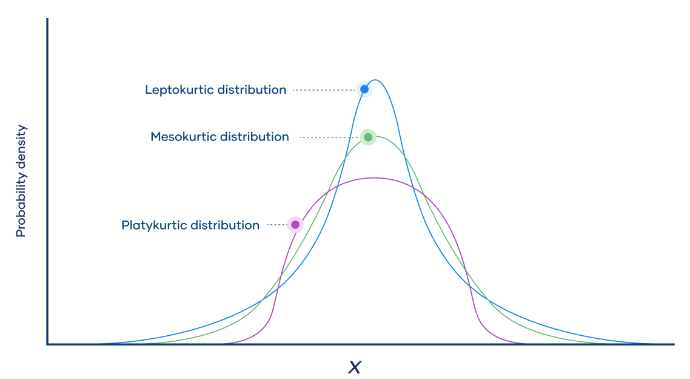  
  
Tails are the tapering ends on either side of a distribution. They represent the probability or frequency of values that are extremely high or low compared to the mean. In other words, tails represent how often outliers occur. Platykurtic distributions have a low frequency of outliers.  
  
Distributions can be categorized into three groups based on their kurtosis:  
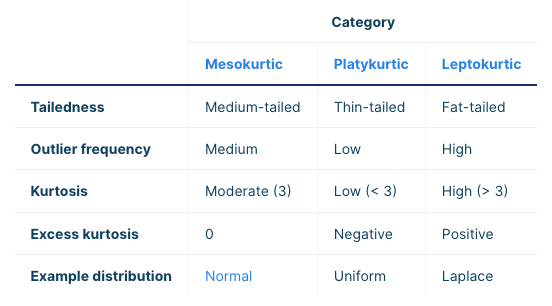  
  
$\LARGE Kurtosis = \frac{\left ( n+1 \right )n\left ( n-1 \right )}{\left ( n-1 \right )\left ( n-3 \right )}\times \frac{\sum \left (x_{i}-\bar{x}\right )^{4}}{\left ( \sum \left (x_{i}-\bar{x}  \right )^{2} \right )^{2}}-3\times \frac{\left ( n-1 \right )^{2}}{\left ( n-2 \right )\left ( n-3 \right )}$  
  
Where  
  
+ $n$ is the sample size.  
+ $x_i$ are observations of the variable $X$.  
+ $\bar{x}$ is the mean of the variable $X$.  
  
Source: Turney, S. (2023). What is Kurtosis? | Definition, Examples & Formula. Scribbr. https://www.scribbr.com/statistics/kurtosis/

In [60]:
# Testing the normality of residuals' distribution
# https://www.statsmodels.org/dev/generated/statsmodels.stats.stattools.robust_kurtosis.html
# It returns four values, the summary table uses the first one which is the standard kurtosis estimator

df_kurt, kurt_sqrt, kurt_log = generate_dict("kurt", 
                                              "Excess Kurtosis",
                                              index=0, 
                                              procs=[tuple(robust_kurtosis(residuals_sqrt)), 
                                                     tuple(robust_kurtosis(residuals_log))])

Excess Kurtosis :


model,model_Y-SQRT,model_Y-LOG-ROL-SQRD
kurt,2.835,0.273


robust_kurtosis returns four values, the summary table uses the first one which is the standard kurtosis estimator. Standard kurtosis estimator given by the _robust_kurtosis_ is the _excess kurtosis_. We add 3 to the _excess kurtosis_ to find the kurtosis of normal distribution. _Excess kurtosis_ is a way to measure the deviation of tails in any given probability distribution from that of a normal distribution. Source: [Kurtosis: Definition, Leptokurtic, Platykurtic](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/kurtosis-leptokurtic-platykurtic/)  
  
So note that `statmodels` uses robust_kurtosis, which computes _excess kurtosis_. However, in the regression results table, `statmodels` adds 3 to the _excess kurtosis_ before the submission.

In [61]:
# Testing the normality of residuals' distribution

kurtosis_sqrt = robust_kurtosis(residuals_sqrt)
print('Kurtosis of residuals of MODEL Y-SQRT: ', 3 + round(kurtosis_sqrt[0], 3))
print("\n")

kurtosis_log = robust_kurtosis(residuals_log)
print('Kurtosis of residuals of MODEL Y-LOG ROL-SQRD: ', 3 + round(kurtosis_log[0], 3))

Kurtosis of residuals of MODEL Y-SQRT:  5.835


Kurtosis of residuals of MODEL Y-LOG ROL-SQRD:  3.273


#### Jarque-Bera (JB)<a class="anchor"  id="jarque-bera"></a>

The __Jarque-Bera Test__,a type of Lagrange multiplier test, is a test for _normality_. _Normality_ is one of the assumptions for many statistical tests, like the $t$ test or $F$ test; the __Jarque-Bera__ test is usually run before one of these tests to confirm normality. It is usually used for large data sets, because other _normality_ tests are not reliable when $n$ is large (for example, Shapiro-Wilk isn’t reliable with $n$ more than 2,000). Source: [Jarque-Bera Test](https://www.statisticshowto.com/jarque-bera-test/)  
  
In statistics, the __Jarque-Bera__ test is a goodness-of-fit test of whether sample data have the _skewness_ and _kurtosis_ matching a normal distribution. Source: [Jarque–Bera test, Wikipedia](https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test)  
  
In general, a large __JB__ value indicates that errors are not normally distributed. A value of 0 indicates the data is normally distributed. Source: [Jarque-Bera Test](https://www.statisticshowto.com/jarque-bera-test/)  
  
The test statistic is always nonnegative. If it is far from zero, it signals the data do not have a normal distribution.  If the data comes from a normal distribution, the __JB__ statistic asymptotically has a chi-squared distribution with two degrees of freedom, so the statistic can be used to test the hypothesis that the data are from a normal distribution. The null hypothesis is a joint hypothesis of the _skewness_ being zero and the _excess kurtosis_ being zero. Samples from a normal distribution have an expected _skewness_ of 0 and an expected _excess kurtosis_ of 0 (which is the same as a kurtosis of 3). As the definition of __JB__ shows, any deviation from this increases the __JB__ statistic. Source: [Jarque–Bera test, Wikipedia](https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test)  
  
The __Jarque-Bera__ test statistic tests the null that the data is normally distributed against an alternative that the data follow some other distribution. The test statistic is based on two moments of the data, the _skewness_, and the _kurtosis_, and has an asymptotic $ \chi ^{2}$ distribution.  
  
The __Jarque-Bera__ test statistic is defined:  
  
$\large JB= n\left ( \frac{S^{2}}{6} + \frac{\left ( K-3 \right )^{2}}{24}\right)$  
  
Where  
  
+ $n$ is the number of data points.  
+ $S$ is the sample skewness.  
+ $K$ is the sample kurtosis of the data.
  
Source: [Jarque-Bera Test](https://www.statisticshowto.com/jarque-bera-test/)

In [62]:
# Testing the normality of residuals' distribution
# https://www.statsmodels.org/devel/generated/statsmodels.stats.stattools.jarque_bera.html
df_jb, jb_sqrt, jb_log = generate_dict("jb", 
                                          "Jarque–Bera",
                                          index=0, 
                                          procs=[tuple(jarque_bera(residuals_sqrt)), 
                                                 tuple(jarque_bera(residuals_log))])

Jarque–Bera :


model,model_Y-SQRT,model_Y-LOG-ROL-SQRD
jb,62.697,0.655


__Jarque-Bera__ test statistic provides another proof for the non-normal distribution of residuals of `Y-SQRT` while the model `Y-LOG ROL-SQRD`'s residuals are almost normally distributed.

#### Prob(JB)<a class="anchor"  id="jarque-bera-prob"></a>

__Prob(JB)__ represents the _p-value_ associated with the _Jarque-Bera (JB)_ test statistic. The _JB_ test is a goodness-of-fit test used to assess whether the residuals in a linear regression model are normally distributed. The null hypothesis of the _JB_ test is that the residuals are normally distributed, and the alternative hypothesis is that they are not. If the _p-value_ associated with the _JB_ test (__Prob(JB)__) is small (typically less than 0.05), we reject the null hypothesis and conclude that the residuals are not normally distributed. So, we should consider alternative models or transformations to better capture the underlying distribution of the data. If the __Prob(JB)__ value is large (typically greater than 0.05), it suggests that the residuals are normally distributed, which supports the validity of the linear regression model. Source: [How to interpret the model summary in statsmodels](https://tracyrenee61.medium.com/how-to-interpret-the-model-summary-in-statsmodels-f641affc7c14)  
  
_Jarque-Bera (JB)_ and __Prob(JB)__ are alternate methods of measuring the same value as _Omnibus_ and _Prob(Omnibus)_ using _skewness_ and _kurtosis_. We use these values to confirm each other.

In [63]:
# Testing the normality of residuals' distribution
# https://www.statsmodels.org/devel/generated/statsmodels.stats.stattools.jarque_bera.html
df_jb_prob, jb_prob_sqrt, jb_prob_log = generate_dict("jb_prob", 
                                                        "Jarque–Bera Probability",
                                                        index=1, 
                                                        procs=[tuple(jarque_bera(residuals_sqrt)), 
                                                               tuple(jarque_bera(residuals_log))])

Jarque–Bera Probability :


model,model_Y-SQRT,model_Y-LOG-ROL-SQRD
jb_prob,0.0,0.721


An alternative way to see multiple statistics for normality at the same time:

In [64]:
# Testing the normality of residuals' distribution
# https://www.statsmodels.org/dev/examples/notebooks/generated/regression_diagnostics.html

name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]

for model, stat in zip(list(models_dict.keys()), [jb_prob_sqrt, jb_prob_log]):
    jarque_bera_stats = (round(x, 3) for x in stat)
    print(model, ":\n", lzip(name, jarque_bera_stats), "\n")

MODEL_Y-SQRT :
 [('Jarque-Bera', 62.697), ('Chi^2 two-tail prob.', 0.0), ('Skew', 0.929), ('Kurtosis', 5.835)] 

MODEL_Y-LOG-ROL-SQRD :
 [('Jarque-Bera', 0.655), ('Chi^2 two-tail prob.', 0.721), ('Skew', -0.106), ('Kurtosis', 3.273)] 



The above results confirm the conclusion provided by other statistics of normality testing regarding our models.

#### Histogram of Residuals Distribution<a class="anchor"  id="histogram-of-residuals"></a>

If the residuals are normally distributed, we should see a bell-shaped histogram centered on 0 and with a variance of 1.

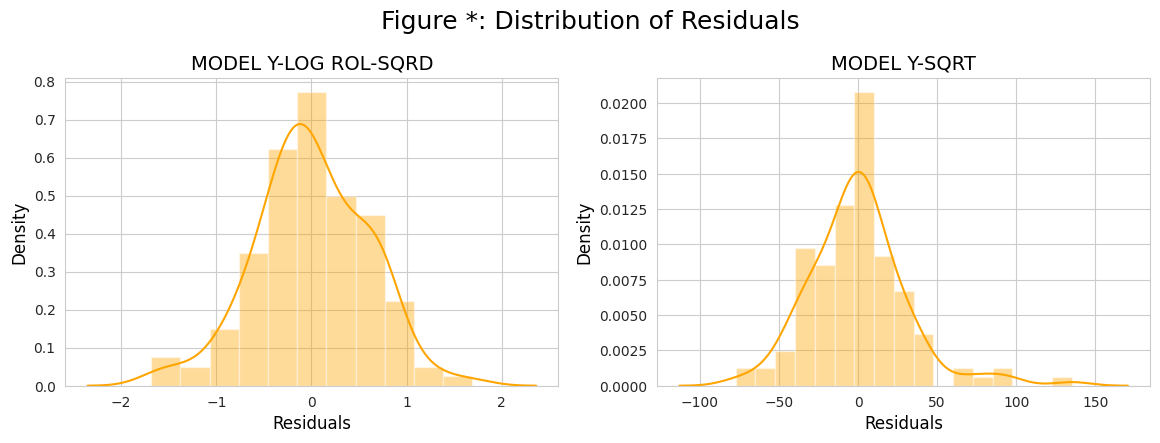

In [65]:
# Testing the normality of residuals' distribution

# figure_numerator += 1

# Initializes the figure by defining rows, columns, figure size, and the title
axes = initialize_figure(f"Figure {figure_numerator}: Distribution of Residuals", # suptitle
                         rows=1,
                         cols=2,
                         figsize=(14, 4),
                         y=loc_y) # suptitle y-axis location

# Histogram with KDE
create_distplot(residuals_log, # data
                  axes[0], # ax
                  "MODEL Y-LOG ROL-SQRD", # title
                  "Residuals", # x_label
                  "Density" # y_label
             )

# Histogram with KDE
create_distplot(residuals_sqrt, # data
                  axes[1], # ax
                  "MODEL Y-SQRT", # title
                  "Residuals", # x_label
                  "Density" # y_label
             )

plt.show()

As also seen in histograms, the model `Y-SQRT` suffers from non-normality with a longer right-tail, while the model `Y-LOG ROL-SQRD` looks normal.

#### Quantile-Quantile (QQ) Plot<a class="anchor"  id="qq-plot"></a>

In statistics, a __Q–Q plot (quantile-quantile plot)__ is a probability plot, a graphical method for comparing two probability distributions by plotting their quantiles against each other. Source: [Q–Q plot](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot)  
  
The purpose of the __quantile-quantile (QQ) plot__ is to show if two data sets come from the same distribution. Plotting the first data set’s quantiles along the x-axis and plotting the second data set’s quantiles along the y-axis is how the plot is constructed. In practice, many data sets are compared to the normal distribution. The normal distribution is the base distribution and its quantiles are plotted along the x-axis as the “Theoretical Quantiles” while the sample quantiles are plotted along the y-axis as the “Sample Quantiles”.  
  
We will test this sample against the standard normal distribution to see if the quantiles match. When looking at the __QQ plot__, we see the points match up along a straight line which shows that the quantiles match. While the line plotted is not a necessary component of the __QQ plot__, it allows the reader to visualize where the points should line up should the sample match the base distribution. In this example, we see that the sample data is normally distributed.  
  
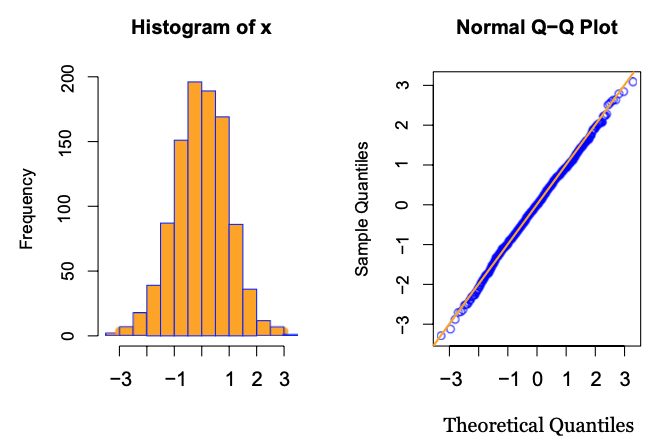  
  
The last example depicts a sample with heavy tails relative to the standard normal distribution. As a non-normal distribution case, this sample is obtained by simulating a random sample of a student’s t distribution with 5 degrees of freedom. The histogram shows that the sample looks bell shaped, however when looking at the __QQ plot__ we see an inverted s shape.  
  
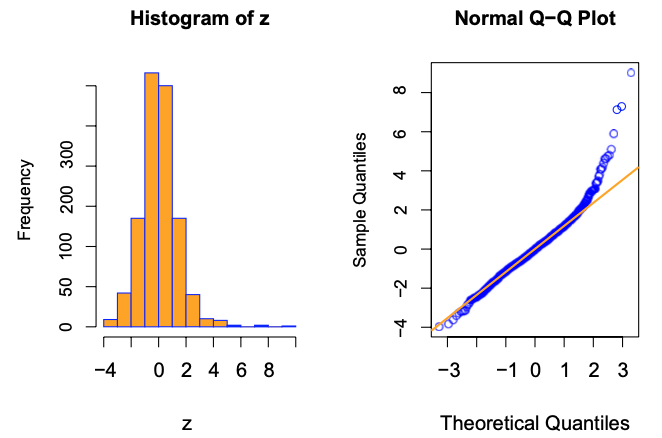  
  
Approximately from the values (-3, -1.5), the sample grows faster than the standard normal distribution; therefore it takes a shorter time for the sample quantiles to increase. From the values (-1.5,1.5), the sample seems to grow at approximately the same pace as the standard normal distribution; therefore their quantiles match in this region. Lastly, from the values (1.5, 3), the sample grows slower than the standard normal distribution; therefore the sample reaches its highest quantile before the standard normal distribution. This is why the sample quantile looks vertical at the top; the standard normal distribution has reached its highest quantile, but the sample has not and still needs to increase to reach it.  
  
Source: [Normal QQ PLOT- Heavy Tails and Light Tails](https://webcourses.ucf.edu/courses/1338846/files/76688859/download?download_frd=1)

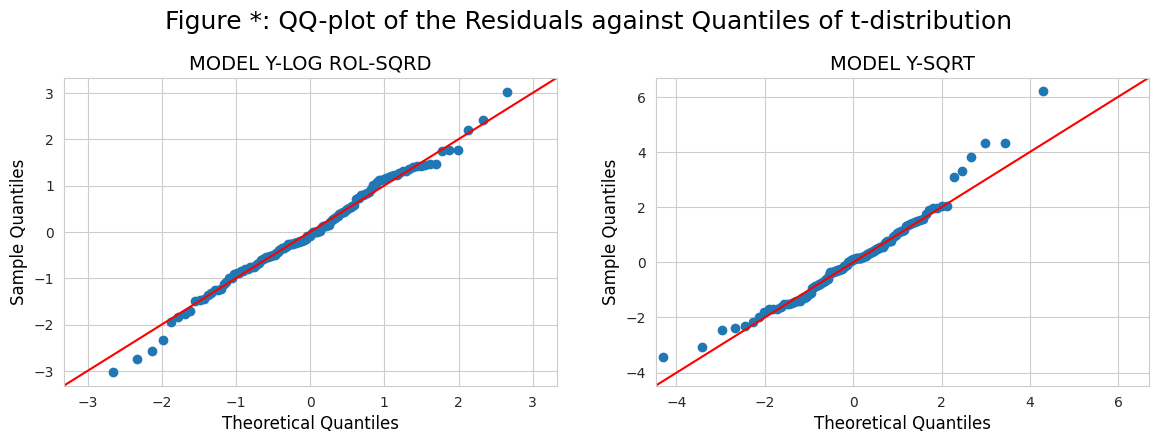

In [66]:
# Testing the normality of residuals' distribution

# figure_numerator += 1 

# Initializes the figure by defining rows, columns, figure size, and the title
axes = initialize_figure(f"Figure {figure_numerator}: QQ-plot of the Residuals against Quantiles of t-distribution", # suptitle
                         rows=1,
                         cols=2,
                         figsize=(14, 4),
                         y=loc_y) # suptitle y-axis location

# Q-Q plot
create_qqplot(residuals_log, # residuals
                axes[0], # ax
                "MODEL Y-LOG ROL-SQRD", # title
                "Theoretical Quantiles", # x_label 
                "Sample Quantiles" # y_label
           )

# Q-Q plot
create_qqplot(residuals_sqrt, # residuals
                axes[1], # ax
                "MODEL Y-SQRT", # title
                "Theoretical Quantiles", # x_label 
                "Sample Quantiles" # y_label
           )

plt.show()

In compliance with the earlier normality test statistics, the residual quantiles of the model `Y-LOG ROL-SQRD` match up along the 45-degree line. On the other hand, the residual quantiles of the model `Y-SQRT` show clear deviations from the straight line. Values from 2 to 4.5 indicate the slower growth of the sample than the standard normal distribution.

### Independence<a class="anchor"  id="independence"></a>

Another assumption of linear regression is the absence of correlation between error terms.

#### Durbin-Watson<a class="anchor"  id="durbin-watson"></a>

The __Durbin Watson (DW)__ statistic tests the _independence_ assumption.  
  
The __Durbin Watson (DW)__ statistic is a test for _autocorrelation_ in the residuals from a statistical model or regression analysis. The __Durbin-Watson__ statistic will always have a value ranging between 0 and 4. A value of 2.0 indicates there is no _autocorrelation_ detected in the sample. Values from 0 to less than 2 point to positive _autocorrelation_ and values from 2 to 4 means negative _autocorrelation_. _Autocorrelation_, also known as serial correlation, can be a significant problem in analyzing historical data if one does not know to look out for it. That means that a residual value at one point should not be dependent on previous residual values. It is one of the assumptions that linear regression relies on. Source: [Durbin Watson Test: What It Is in Statistics, With Examples](https://www.investopedia.com/terms/d/durbin-watson-statistic.asp)  
  
If error terms are correlated, the estimated standard errors will underestimate the true standard errors and cause confidence intervals to be narrower than they should be. That could increase our confidence in the model superfluously and erroneously suggest the significance of a parameter.  
  
The __Durbin Watson__ test is rarely used and is considered by some to be archaic. It requires the use of tables, which you can find mostly in older texts.  
  
The __Durbin-Watson__ test statistic is calculated with the following formula:  
  
$\Large  DW= \frac{\sum_{t=2}^{T}\left (e_{t}-e_{t-1} \right )^{2}}{\sum_{t=1}^{T}e_{t}^{2}}$  
  
Where  
  
+ $e_{t}$ are residuals from an ordinary least squares regression.  
+ $t$ is the point in time series  
  
Source: [Durbin Watson Test & Test Statistic](https://www.statisticshowto.com/durbin-watson-test-coefficient/)

In [67]:
# Testing the autocorrelation of error terms

df_dw, dw_sqrt, dw_log = generate_dict("dw", 
                                        "Durbin-Watson",
                                        index=0, 
                                        procs=[durbin_watson(residuals_sqrt), 
                                             durbin_watson(residuals_log)])

Durbin-Watson :


model,model_Y-SQRT,model_Y-LOG-ROL-SQRD
dw,2.398,2.209


Both `Y-SQRT` and `Y-LOG ROL-SQRD` seem to validate the _non-autocorrelation_ assumption of linear regression. `Y-LOG ROL-SQRD` is slightly better than the other model.

In linear regression, the error terms, $\epsilon _{1}, \epsilon_{2},...,\epsilon _{n}$ are _uncorrelated_. What does this mean? For instance, if the errors are _uncorrelated_, then the fact that $\epsilon _{i}$ is positive provides little or no information about the sign of $\epsilon _{i+1}$.  
  
When error terms are _correlated_, confidence and prediction intervals will be narrower than they should be, and _p-values_ associated with the model will be lower than they should be; this could cause us to erroneously conclude that a parameter is statistically significant. In short, if the error terms are _correlated_, we may have an unwarranted sense of confidence in our model.  
  
Although _autocorrelation_ of errors is more commonly seen in time series data, it can also occur outside of time series data.  
  
*Source: An Introduction to Statistical Learning with Applications in R, James, Witten, Hastie and Tibshirani, pg.97-98.*

#### Autocorrelation Function (ACF) Plot<a class="anchor"  id="acf-plot"></a>

__ACF Plot__ plots the autocorrelation function. It plots lags on the horizontal and the correlations on vertical axis.  
  
Source: [statsmodels.graphics.tsaplots.plot_acf](https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html)

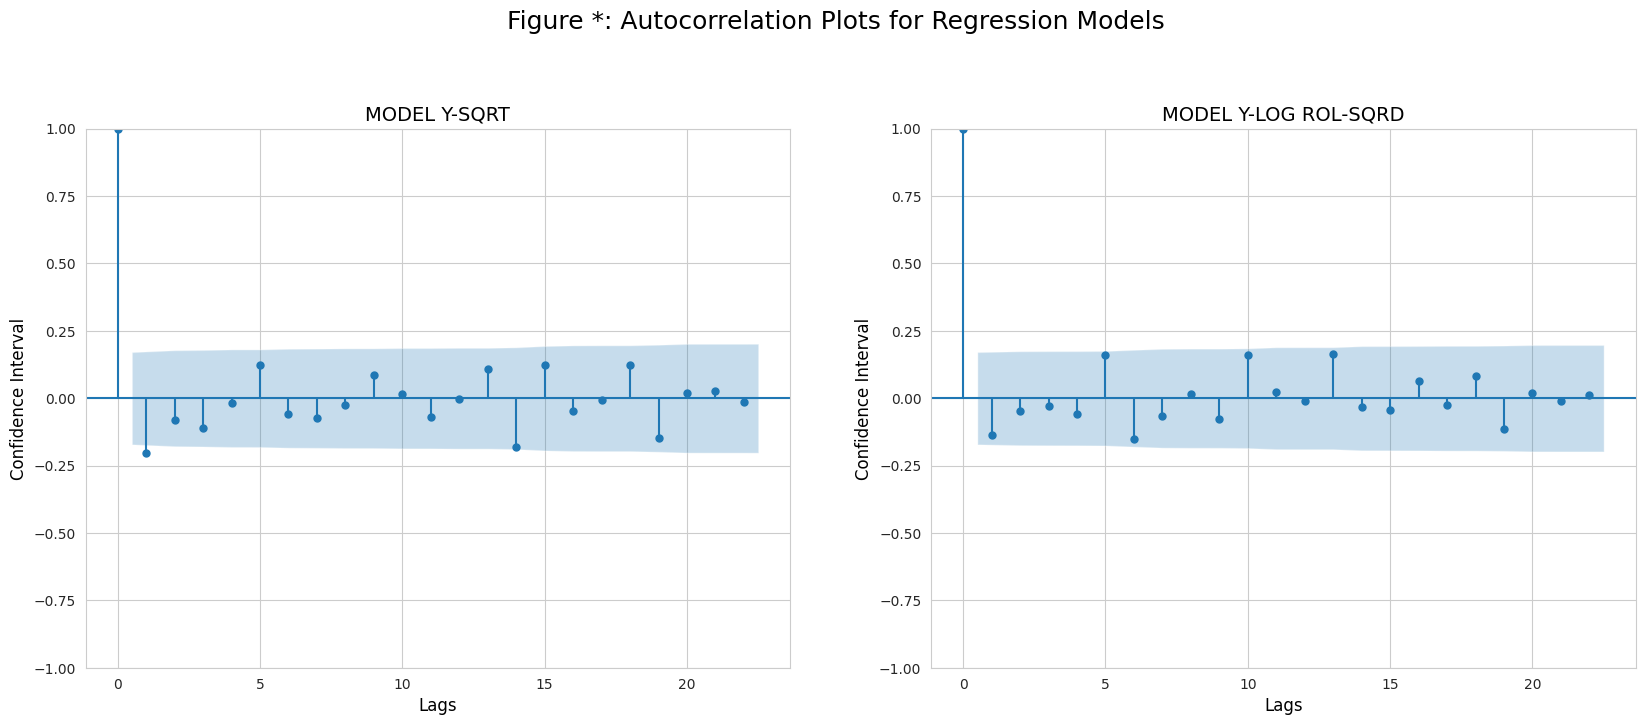

In [68]:
# figure_numerator += 1

# Initializes the figure by defining rows, columns, figure size, and the title
axes = initialize_figure(f"Figure {figure_numerator}: Autocorrelation Plots for Regression Models", # suptitle
                     rows=1,
                     cols=2,
                     figsize=(20, 7),
                     y=loc_y) # suptitle y-axis location

# ACF Plot for MODEL Y-SQRT
plot_acf(residuals_sqrt, # data
           axes[0], # ax
           "MODEL Y-SQRT", # title
           "Lags", # x_label
           "Confidence Interval", # y_label
              )

# ACF Plot for MODEL Y-LOG ROL-SQRD
plot_acf(residuals_log, # data
           axes[1], # ax
           "MODEL Y-LOG ROL-SQRD", # title
           "Lags", # x_label
           "Confidence Interval", # y_label
              )

plt.show()

We see __ACF__ plots more often in time-series data, though it is applicable outside time-series. Our data is not time-series and not much of a good case to use __ACF__. On the other hand, we should understand __ACF__ since it is a highly necessary and useful tool.  
  
We see lags on the x-axis. Lag 5 means that the first observation impacts the fifth observation. Also, the second, third, and fourth observations each impact the fifth observation. When the lag is 4, it measures the impact of the first observation on the fourth data point.  
  
Whenever that impact is strong, _autocorrelation_ exists. If it is weak, then _autocorrelation_ is zero. The blue horizontal area shows the 5% confidence interval. If a data point is inside the blue zone, _autocorrelation_ is zero. When data points fall outside the blue zone, _autocorrelation_ is non-zero. The first point is always 1, meaning the current data's correlation with itself is always 1.  
  
Percentages on the y-axis show the level of impact. When the value is 50% at lag 4, the observation is 50% influenced by the point of four periods before. Some y-values are below zero, indicating a negative correlation. The absolute y-value still shows the strength of the impact.  
  
We don't know if each country in our data influences other countries. Going deep dive into this part is beyond the scope of this notebook. However, we might be curious whether that might be possible at the continent level. Countries on the same continent might tend to impact one another.  
  
Source: [Plotting for Data Analysis - Interpreting ACF and PACF plots (2022)](https://youtu.be/gDwx3RPUfPw?si=NrZGg6spuzddCgCu)

### Multicollinearity<a class="anchor"  id="multicollinearity"></a>

Earlier, we little talked about __collinearity__ and said we would revisit it for more details.  
  
Collinearity occurs between two independent variables while __multicollinearity__ occurs between more than two variables.  
  
"The presence of __collinearity__ can pose problems in the regression context, since it can be difficult to separate out the individual effects of __collinear__ variables on the response. In other words, since predictor-1 and predictor-2 tend to increase or decrease together, it can be difficult to determine how each one separately is associated with the response.  
  
Since __collinearity__ reduces the accuracy of the estimates of the regression coefficients, it causes the standard error for $\beta _{j}$ to grow. Recall that the $t$-statistic for each predictor is calculated by dividing $\beta _{j}$ by its standard error. Consequently, __collinearity__ results in a decline in the $t$-statistic. As a result, in the presence of __collinearity__, we may fail to reject $H_{0}:\beta _{j}= 0$. This means that the power of the hypothesis test—the probability of correctly detecting a non-zero coefficient—is reduced by __collinearity__."  
  
*Source: An Introduction to Statistical Learning with Applications in R, James, Witten, Hastie and Tibshirani, pg.100.*

#### Heatmap<a class="anchor"  id="heatmap"></a>

__Heatmap__ is one of the useful tools to see the correlation between column values. We stated earlier in the notebook that _ROL_ and _HDI_ are highly correlated, so we removed _HDI_ from both models. To see the correlation more closely, we add _ROL_ and _HDI_ back to the data that will be used to plot the __heatmap__.

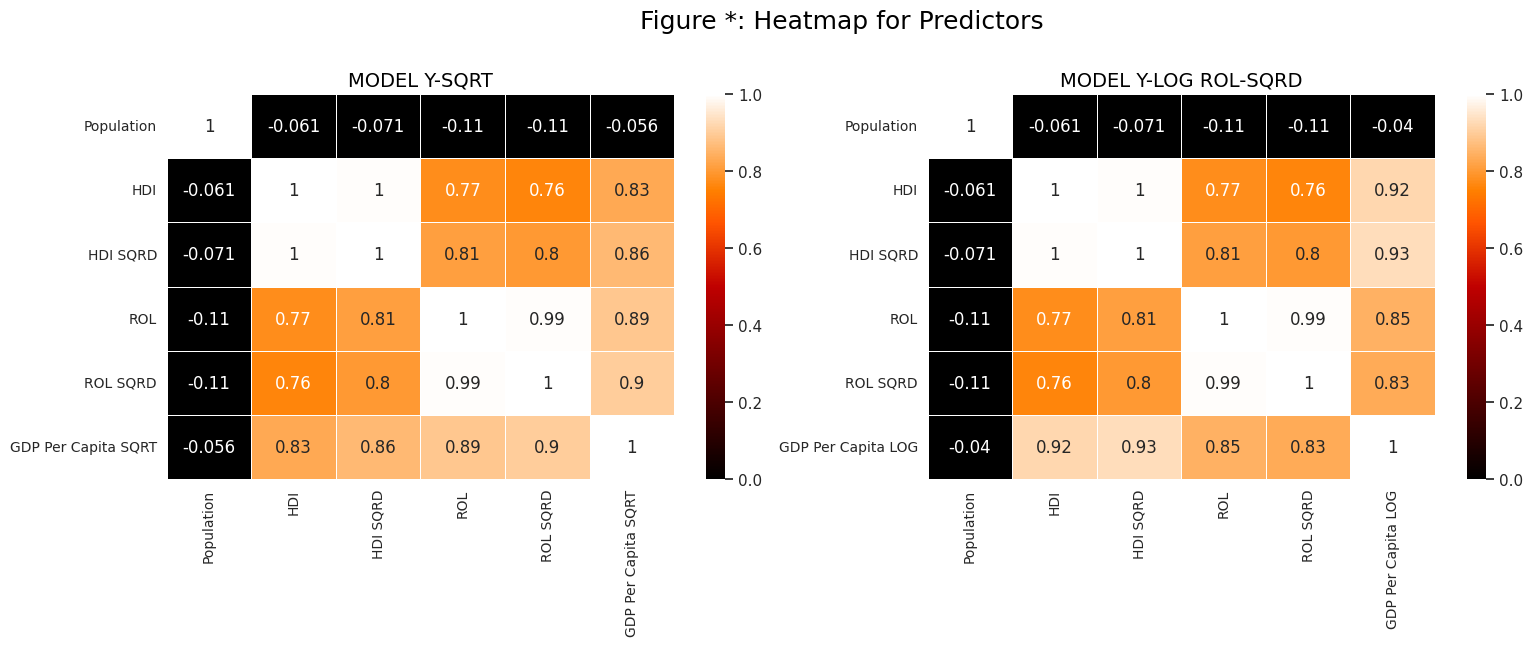

In [69]:
# Testing multicollinearity

# figure_numerator += 1

# Initializes the figure by defining rows, columns, figure size, and the title
axes = initialize_figure(f"Figure {figure_numerator}: Heatmap for Predictors", # suptitle
                         rows=1,
                         cols=2,
                         figsize=(18, 5),
                         y=loc_y,
                         sharex=True) # suptitle y-axis location

# Heatmap columns for the model Y-SQRT
heatmap_cols_sqrt = ["Population", "HDI", "HDI_SQRD", "ROL", "ROL_SQRD", "GDP_Per_Capita_SQRT"]

# Heatmap plot for the model Y-SQRT
create_heatmap(data[heatmap_cols_sqrt], # data
                axes[0], # ax
                "MODEL Y-SQRT", # title
                cmap="gist_heat", 
                vmin=0.0, 
                vmax=1.0, 
                linewidths=.5, 
                annot=True
             )

# Heatmap columns for the model Y-LOG ROL-SQRD
heatmap_cols_log = ["Population","HDI", "HDI_SQRD", "ROL", "ROL_SQRD", "GDP_Per_Capita_LOG"]

# Heatmap plot for the model Y-LOG ROL-SQRD
create_heatmap(data[heatmap_cols_log], # data
                axes[1], # ax
                "MODEL Y-LOG ROL-SQRD", # title
                cmap="gist_heat", 
                vmin=0.0, 
                vmax=1.0, 
                linewidths=.5, 
                annot=True
             )

plt.show()

We unquestionably view from the above graph that a high correlation exists between _HDI_ and _ROL_.

#### Condition No (Cond. No)<a class="anchor"  id="condition-no"></a>

__Condition No__ is a measure of the sensitivity of the model to changes in the input variables. Specifically, the __condition number__ indicates how much the output of the model will change in response to small changes in the input variables. A large __condition number__ indicates that the model is highly sensitive to changes in the input variables, which can be problematic for several reasons. For example, a large __condition number__ may indicate that the input variables are highly correlated, which can lead to instability in the model estimates or inflated standard errors. In the context of a linear regression model, a __condition number__ greater than 30 is often considered high, and values greater than 100 are generally indicative of severe _multicollinearity_ (high correlation among predictor variables). Therefore, it is recommended to keep the __condition number__ as low as possible to ensure that the model is stable and reliable. If the __condition number__ is too high, it may be necessary to consider alternative modelling strategies or to re-evaluate the input variables to identify any sources of _multicollinearity_." Source: [How to interpret the model summary in statsmodels](https://tracyrenee61.medium.com/how-to-interpret-the-model-summary-in-statsmodels-f641affc7c14)

In [70]:
# Testing multicollinearity
# https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLSResults.condition_number.html
df_cond_no_1, cond_no_1_sqrt, cond_no_1_log = generate_dict("cond_no", 
                                                            "Condition No",
                                                            index=0, 
                                                            procs=[model_sqrt.condition_number, 
                                                                   model_log.condition_number])

Condition No :


model,model_Y-SQRT,model_Y-LOG-ROL-SQRD
cond_no,13.438,100.508


In [71]:
# Testing multicollinearity
# An alternative way to compute:
df_cond_no_2, cond_no_2_sqrt, cond_no_2_log = generate_dict("cond_no", 
                                                            "Condition No",
                                                            index=0, 
                                                            procs=[np.linalg.cond(model_sqrt.model.exog), 
                                                                   np.linalg.cond(model_log.model.exog)])

Condition No :


model,model_Y-SQRT,model_Y-LOG-ROL-SQRD
cond_no,13.438,100.508


As you may notice, the model `Y-LOG ROL-SQRD` shows a sign of severe _multicollinearity_, while the other model is safe from it. The first model introduced the _ROL_SQRD_, which later happened to be not significant. And the correlation between _ROL_ and its _squared term_ was very high. Therefore, _ROL_SQRD_ should be the cause of _collinearity_ in the model.

#### Variance Inflation Factor (VIF)<a class="anchor"  id="vif"></a>

Another statistic to check and measure _multicollinearity_ is the __Variance Inflation Factor (VIF)__.  
  
A __variance inflation factor (VIF)__ is a measure of the amount of _multicollinearity_ in regression analysis. Multicollinearity exists when there is a correlation between multiple independent variables in a multiple regression model. This can adversely affect the regression results. Thus, the __variance inflation factor__ can estimate how much the variance of a regression coefficient is inflated due to _multicollinearity_.  
  
_Multicollinearity_ creates a problem in the multiple regression model because the inputs are all influencing each other. Therefore, they are not actually independent, and it is difficult to test how much the combination of the independent variables affects the dependent variable, or outcome, within the regression model.  
  
While _multicollinearity_ does not reduce a model's overall predictive power, it can produce estimates of the regression coefficients that are not statistically significant. In a sense, it can be thought of as a kind of double-counting in the model.  
  
The formula for __VIF__ is:  
  
$\large VIF_{i}= \frac{1}{1-R_{i}^{2}}$  
  
Where  
  
+ $R_{i}^{2}$ is unadjusted coefficient of determination for regressing the $i$th independent variable on the remaining ones.  
  
In general terms,  
  
+ VIF equal to 1 $\to$ variables are not correlated  
+ VIF between 1 and 5 $\to$ variables are moderately correlated  
+ VIF greater than 5 $\to$ variables are highly correlated  
  
The higher the __VIF__, the higher the possibility that _multicollinearity_ exists, and further research is required. The minimum value of __VIF__ is 1, which means the absence of _collinearity_. When __VIF__ is higher than 10, there is significant _multicollinearity_ that needs to be corrected.  
  
Source: [Variance Inflation Factor (VIF)](https://www.investopedia.com/terms/v/variance-inflation-factor.asp)

In [72]:
# Testing multicollinearity
# https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/
# https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html

def calculate_vif(data, cols, model_name):
    
    # The independent variables set
    X = data[cols]
    
    # Cast all columns to float32. Float16 renders error in VIF calculation.
    X = X.astype(np.float32)

    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    
    # Calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    
    # Display
    print(f"VIF for {model_name}: ")
    display(vif_data)
    
# MODEL Y-SQRT has one continuous independent variable, so we can't compute VIF for it. 
# calculate_vif(data, ind_con_variables_sqrt, "MODEL Y-SQRT")
print("\n")

# MODEL Y-LOG ROL-SQRD has two continuous independent variables, so we can compute VIF for it.
calculate_vif(data, ind_con_variables_log, "MODEL Y-LOG ROL-SQRD")



VIF for MODEL Y-LOG ROL-SQRD: 


,feature,VIF
0,ROL,18.043
1,ROL_SQRD,18.043


As the _condition number_ indicates, __VIF__, too, reveals a strong collinearity in the model `Y-LOG ROL-SQRD`.  
  
There are two possible actions to fix the problem. Either we omit the problematic predictor(s) or combine the collinear variables together into a single predictor. The second option can be done by averaging the standardized versions of collinear variables and using the average values as a new predictor. Either of the action will not hurt the model since the collinear variables create redundant information. *Source: An Introduction to Statistical Learning with Applications in R, James, Witten, Hastie and Tibshirani, pg.102-103*.  
  
We opt for the first alternative in this example, discarding `ROL_SQRD` from `Y-LOG ROL-SQRD`. That means we will create a new model: `Y-LOG`.

### Heteroscedasticity<a class="anchor"  id="heteroscedasticity"></a>

In statistics, a sequence (or a vector) of random variables is homoscedastic if all its random variables have the same finite variance; this is also known as homogeneity of variance. The complementary notion is called __heteroscedasticity__, also known as heterogeneity of variance. The spellings homoskedasticity and __heteroskedasticity__ are also frequently used. Assuming a variable is homoscedastic when in reality it is __heteroscedastic__ results in unbiased but inefficient point estimates and in biased estimates of standard errors, and may result in overestimating the goodness of fit as measured by the Pearson coefficient.  
  
The existence of __heteroscedasticity__ is a major concern in regression analysis and the analysis of variance, as it invalidates statistical tests of significance that assume that the modelling errors all have the same variance. While the ordinary least squares estimator is still unbiased in the presence of __heteroscedasticity__, it is inefficient and inference based on the assumption of homoskedasticity is misleading. Source: [Homoscedasticity and heteroscedasticity](https://en.wikipedia.org/wiki/Homoscedasticity_and_heteroscedasticity)  
  
One way to check if __heteroscedasticity__ exists is to plot the residuals of a linear regression. Seaborn's residplot function will help us with that. This function will regress y on x (possibly as a robust or polynomial regression) and then draw a scatterplot of the residuals. You can optionally fit a lowess smoother to the residual plot, which can help in determining if there is structure to the residuals.  The structure in the residual plot can reveal a violation of linear regression assumptions. Source: [seaborn.residplot](https://seaborn.pydata.org/generated/seaborn.residplot.html)  
  
We will show two tests to check __heteroscedasticity__: _1. Breusch-Pagan Lagrange Multiplier_, _2. Goldfeld-Quandt Test_

#### Breusch-Pagan Lagrange Multiplier<a class="anchor"  id="breusch-pagan"></a>

The __Breusch–Pagan__ test is a chi-squared test: the test statistic is distributed $n*\chi^{2}$ with $k$ degrees of freedom. If the test statistic has a $p$ value below an appropriate threshold (e.g. $p<0.05$) then the null hypothesis of homoskedasticity is rejected and _heteroskedasticity_ assumed. Source: [Breusch–Pagan test](https://en.wikipedia.org/wiki/Breusch%E2%80%93Pagan_test)  
  
`statmodels` uses __Breusch-Pagan Lagrange Multiplier__ to test for _heteroscedasticity_. It tests the hypothesis that the residual variance does not depend on the variables in $x$ in the form. Homoscedasticity implies that $\alpha = 0$. Source: [statsmodels.stats.diagnostic.het_breuschpagan](https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.het_breuschpagan.html)

In [73]:
df_bp_lm, bp_lm_sqrt, bp_lm_log = generate_dict("bp_lm", 
                                                "Breusch-Pagan Lagrange Multiplier",
                                                index=0, 
                                                procs=[tuple(het_breuschpagan(model_sqrt.resid, model_sqrt.model.exog)), 
                                                tuple(het_breuschpagan(model_log.resid, model_log.model.exog))])

Breusch-Pagan Lagrange Multiplier :


model,model_Y-SQRT,model_Y-LOG-ROL-SQRD
bp_lm,12.833,16.121


In [74]:
# https://www.statsmodels.org/dev/examples/notebooks/generated/regression_diagnostics.html

name = ["Lagrange multiplier statistic", "p-value", "f-value", "f_p-value"]

for model, stat in zip(list(models_dict.keys()), [bp_lm_sqrt, bp_lm_log]):
    breusch_pagan_stats = (round(x, 3) for x in stat)
    print(model, ":\n", lzip(name, breusch_pagan_stats), "\n")

MODEL_Y-SQRT :
 [('Lagrange multiplier statistic', 12.833), ('p-value', 0.046), ('f-value', 2.244), ('f_p-value', 0.043)] 

MODEL_Y-LOG-ROL-SQRD :
 [('Lagrange multiplier statistic', 16.121), ('p-value', 0.024), ('f-value', 2.466), ('f_p-value', 0.021)] 



_Heteroscedasticity_ does exist as $p$ value is below 0.05.

#### Goldfeld-Quandt Test<a class="anchor"  id="goldfeld-quandt"></a>

In statistics, the __Goldfeld–Quandt__ test checks for homoscedasticity in regression analyses. It does this by dividing a dataset into two parts or groups, and hence the test is sometimes called a two-group test. The __Goldfeld–Quandt__ test is one of two tests proposed in a 1965 paper by Stephen Goldfeld and Richard Quandt. Both a parametric and nonparametric test are described in the paper, but the term "__Goldfeld–Quandt__ test" is usually associated only with the former.  
  
In the context of multiple regression (or univariate regression), the hypothesis to be tested is that the variances of the errors of the regression model are not constant, but instead are monotonically related to a pre-identified explanatory variable. For example, data on income and consumption may be gathered and consumption regressed against income. If the variance increases as levels of income increase, then income may be used as an explanatory variable. Otherwise some third variable (e.g. wealth or last period income) may be chosen. Source: [Goldfeld–Quandt test](https://en.wikipedia.org/wiki/Goldfeld%E2%80%93Quandt_test)  
  
The __Goldfeld Quandt__ Test is a test used in regression analysis to test for homoscedasticity. It compares variances of two subgroups; one set of high values and one set of low values. If the variances differ, the test rejects the null hypothesis that the variances of the errors are not constant.  
  
The test statistic for this test is the ratio of mean square residual errors for the regressions on the two subsets of data. This corresponds to the F-Test for equality of variances. Both the one-tailed and two-tailed tests can be used. Source: [Goldfeld Quandt Test: Definition, Steps to Running](https://www.statisticshowto.com/goldfeld-quandt-test/)

In [75]:
df_gq_test, gq_test_sqrt, gq_test_log = generate_dict("gq_test", 
                                                "Goldfeld-Quandt Test",
                                                index=0, 
                                                procs=[tuple(het_goldfeldquandt(model_sqrt.resid, model_sqrt.model.exog)), 
                                                tuple(het_goldfeldquandt(model_log.resid, model_log.model.exog))])

Goldfeld-Quandt Test :


model,model_Y-SQRT,model_Y-LOG-ROL-SQRD
gq_test,1.301,1.228


In [76]:
name = ["F_statistic", "p-value"]

for model, stat in zip(list(models_dict.keys()), [gq_test_sqrt, gq_test_log]):
    goldfeld_quandt_stats = (round(x, 3) for x in stat)
    print(model, ":\n", lzip(name, goldfeld_quandt_stats), "\n")

MODEL_Y-SQRT :
 [('F_statistic', 1.301), ('p-value', 0.158)] 

MODEL_Y-LOG-ROL-SQRD :
 [('F_statistic', 1.228), ('p-value', 0.219)] 



_Heteroscedasticity_ exists as $p$ value is above 0.05.  
  
Both __Breusch-Pagan Lagrange Multiplier__ test and __Goldfeld-Quandt__ test show that both of our models have __heteroscedasticity__.

### Linearity<a class="anchor"  id="linearity"></a>

_Linearity_ suggests there is a linear relationship between the independent variable(s) and the dependent variable.

#### Residual Plot<a class="anchor"  id="residual-plot"></a>

We won't use the exact variable sets with the current models. To elaborate on the issue further, we'll try a different combination of independent variables with _GDP Per Capita SQRT_ and _GDP Per Capita LOG_ as dependent variables. With more predictors, an enriched case will provide more insight into the topic. That will be more intelligible when we see the figures below.

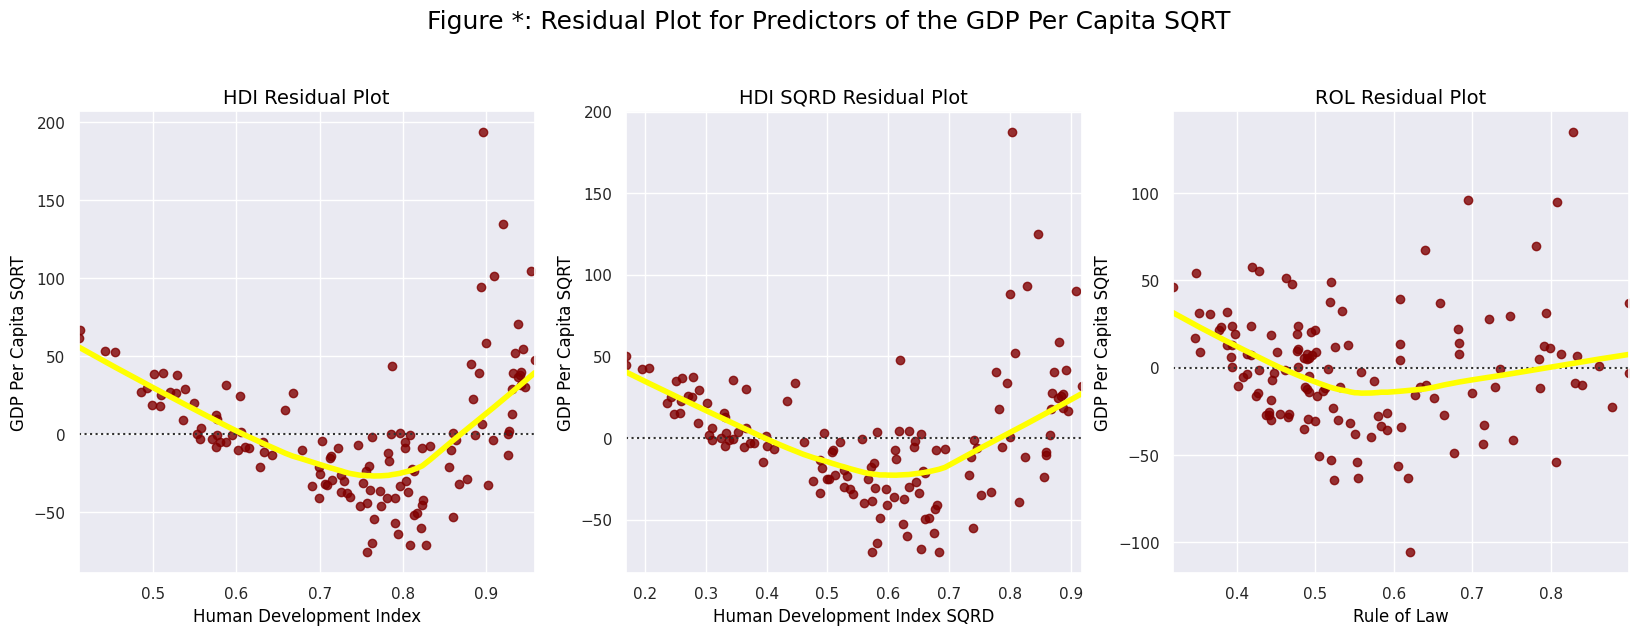

In [77]:
"""
Residual plots for Y-SQRT case where 
   * the independent variables are HDI, HDI_SQRD, and ROL
   * the dependent variable is GDP Per Capita SQRT
"""

# figure_numerator += 1

def plot_residuals(order_value):

    # Initializes the figure by defining rows, columns, figure size, and the title
    axes = initialize_figure(f"Figure {figure_numerator}: Residual Plot for Predictors of the GDP Per Capita SQRT", # suptitle
                             rows=1,
                             cols=3,
                             figsize=(20, 6),
                             y=loc_y, # suptitle y-axis location
                             sharey=True) 

    # HDI residual plot
    plot_residual(axes[0], # ax
                    data["HDI"], # x
                    data["GDP_Per_Capita_SQRT"], # y
                    "HDI Residual Plot", # title
                    "Human Development Index", # x_label
                    "GDP Per Capita SQRT", # y_label
                    lowess=True, 
                    order=order_value, 
                    linewidth=4
                 )

    # HDI squared residual plot
    plot_residual(axes[1], # ax
                    data["HDI_SQRD"], # x
                    data["GDP_Per_Capita_SQRT"], # y
                    "HDI SQRD Residual Plot", # title
                    "Human Development Index SQRD", # x_label
                    "GDP Per Capita SQRT", # y_label
                    lowess=True, 
                    order=order_value, 
                    linewidth=4
                 )

    # ROL residual plot
    plot_residual(axes[2], # ax
                    data["ROL"], # x
                    data["GDP_Per_Capita_SQRT"], # y
                    "ROL Residual Plot", # title
                    "Rule of Law", # x_label
                    "GDP Per Capita SQRT", # y_label
                    lowess=True, 
                    order=order_value, 
                    linewidth=4
                 )

    plt.show()
    

# # Choose order from 1 to 3
# widgets.interact(plot_residuals, 
#                  order_value=widgets.Dropdown(options=[1, 2, 3], 
#                                             value=1,
#                                             description="Order",
#                                             rows=3,
#                                             disabled=False)
#                 );


# Choose an order value (1, 2 or 3), the default is 1
plot_residuals(1)

We can see that there is now a black dotted horizontal line. This line represents the regression model. Each dot, then, is represented by the residual between the line and the line of best fit. Source: [Seaborn residplot – Plotting Residuals of Linear Regression](https://datagy.io/seaborn-residplot/)  
  
Each dot in the plot shows how much it deviates from the regression line, which is the horizontal dotted line.  
  
The above figure shows there is a curve in the data. We used the first order. So, to more accurately fit the points, we should use the second order. We can achieve it by selecting from the dropdown. However, removing higher-order trends doesn't seem to stabilize the residuals.  
  
The figure also gives us hints about whether outliers exist in the data.  
  
Now, let's try the same with the second case.

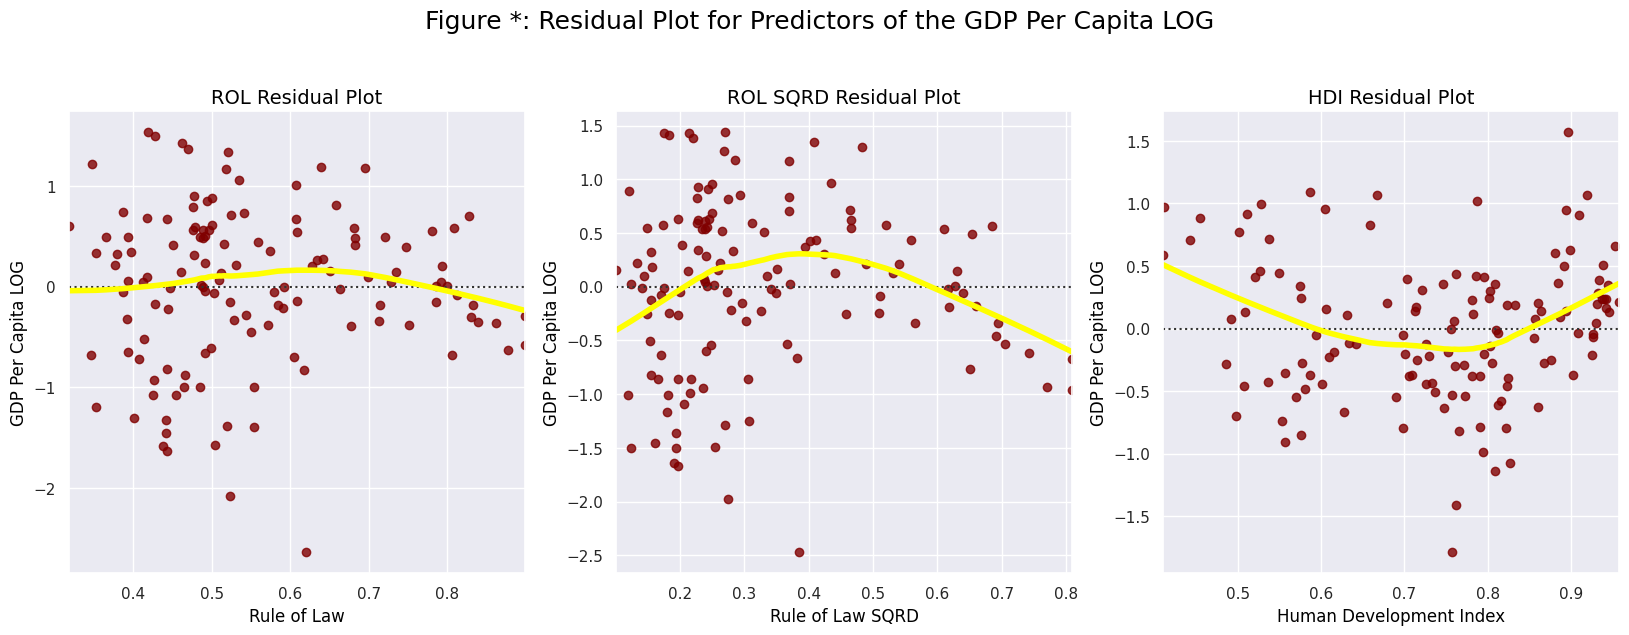

In [78]:
"""
Residual plots for Y-LOG case where 
  * the independent variables are ROL, ROL_SQRD, and HDI
  * the dependent variable is GDP Per Capita LOG
"""

# figure_numerator += 1

# Initializes the figure by defining rows, columns, figure size, and the title
axes = initialize_figure(f"Figure {figure_numerator}: Residual Plot for Predictors of the GDP Per Capita LOG", # suptitle
                         rows=1,
                         cols=3,
                         figsize=(20, 6),
                         y=loc_y, # suptitle y-axis location
                         sharey=True) 


# ROL residual plot
plot_residual(axes[0], # ax
                data["ROL"], # x
                data["GDP_Per_Capita_LOG"], # y
                "ROL Residual Plot", # title
                "Rule of Law", # x_label
                "GDP Per Capita LOG", # y_label
                lowess=True, 
                order=1, 
                linewidth=4
             )

# ROL_SQRD residual plot
plot_residual(axes[1], # ax
                data["ROL_SQRD"], # x
                data["GDP_Per_Capita_LOG"], # y
                "ROL SQRD Residual Plot", # title
                "Rule of Law SQRD", # x_label
                "GDP Per Capita LOG", # y_label
                lowess=True, 
                order=1, 
                linewidth=4
             )

# HDI residual plot
plot_residual(axes[2], # ax
                data["HDI"], # x
                data["GDP_Per_Capita_LOG"], # y
                "HDI Residual Plot", # title
                "Human Development Index", # x_label
                "GDP Per Capita LOG", # y_label
                lowess=True, 
                order=1, 
                linewidth=4       
             )

plt.show()


The `LOG` model with _ROL_ as the independent variable seems to be the most accurate regression. Residuals look stable.  
  
Would the original $Y$ variable tells us something different?

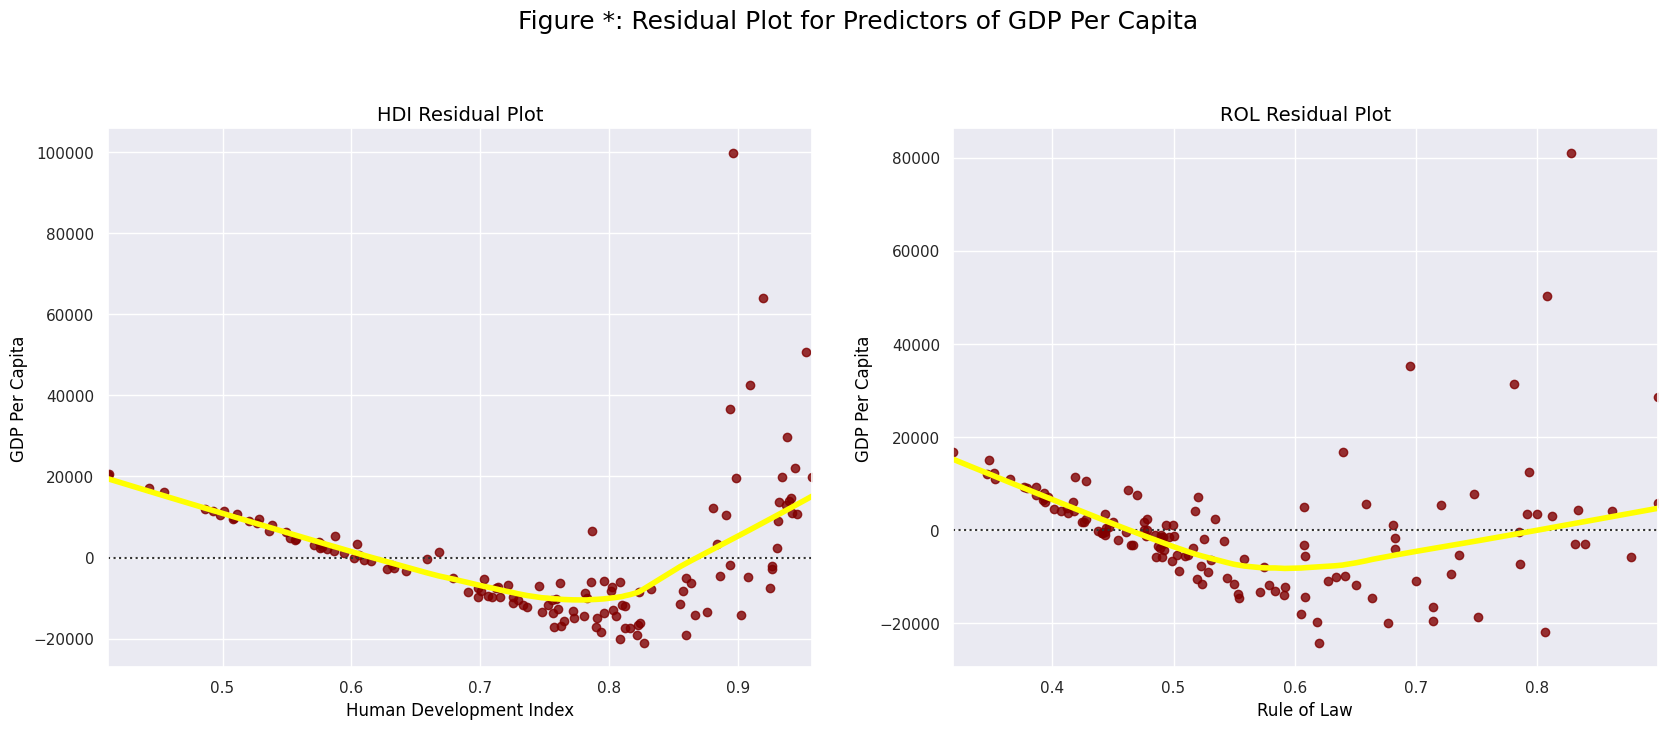

In [79]:
# We might ignore this though

"""
Residual plots for Y-LOG case where 
  * the independent variables are ROL, ROL_SQRD, and HDI
  * the dependent variable is GDP Per Capita LOG
"""

# figure_numerator += 1

# Initializes the figure by defining rows, columns, figure size, and the title
axes = initialize_figure(f"Figure {figure_numerator}: Residual Plot for Predictors of GDP Per Capita", # suptitle
                         rows=1,
                         cols=2,
                         figsize=(20, 7),
                         y=loc_y, # suptitle y-axis location
                         sharey=True) 

# HDI residual plot
plot_residual(axes[0], # ax
                data["HDI"], # x
                data["GDP_Per_Capita"], # y
                "HDI Residual Plot", # title
                "Human Development Index", # x_label
                "GDP Per Capita", # y_label
                lowess=True,
                order=1, 
                linewidth=4
             )

# ROL residual plot
plot_residual(axes[1], # ax
                data["ROL"], # x
                data["GDP_Per_Capita"], # y
                "ROL Residual Plot", # title
                "Rule of Law", # x_label
                "GDP Per Capita", # y_label
                lowess=True,
                order=1, 
                linewidth=4
             )

plt.show()


Nothing much changes when we use the original $Y$ variable.  
  
Next, we'll look at the _residual plots_ for quadratic fit.

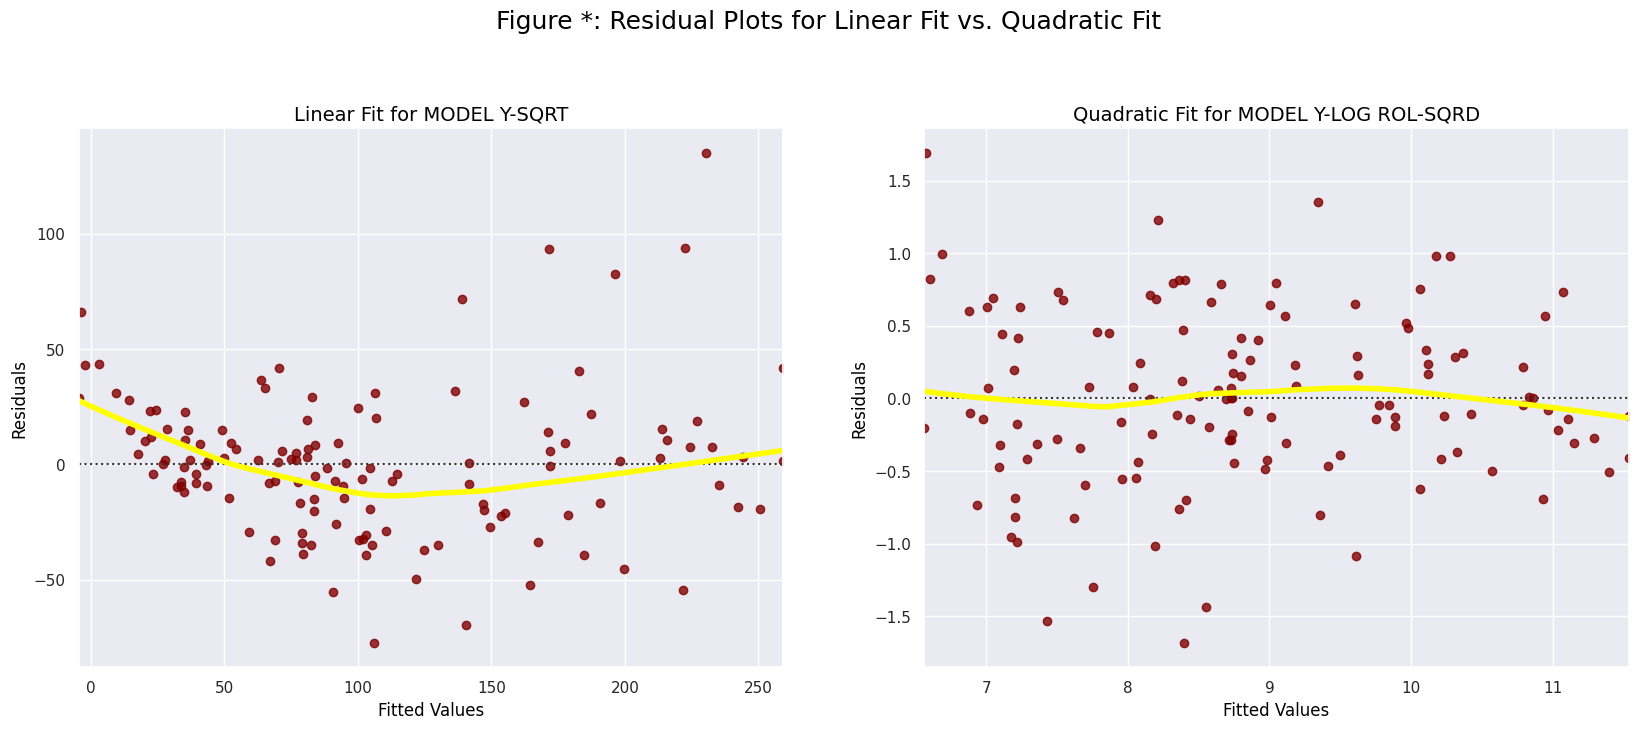

In [80]:
# Residual plots for linear fit vs. quadratic fit

# figure_numerator += 1

# Initializes the figure by defining rows, columns, figure size, and the title
axes = initialize_figure(f"Figure {figure_numerator}: Residual Plots for Linear Fit vs. Quadratic Fit", # suptitle
                         rows=1,
                         cols=2,
                         figsize=(20, 7),
                         y=loc_y) # suptitle y-axis location 


# Residual plot for MODEL Y-SQRT
plot_residual(axes[0], # ax
                 fitted_values_sqrt, # x
                 residuals_sqrt, # y
                 "Linear Fit for MODEL Y-SQRT", # title
                 "Fitted Values", # x_label
                 "Residuals", # y_label
                 lowess=True
             )

# Residual plot for MODEL Y-LOG ROL-SQRD
plot_residual(axes[1], # ax
                 fitted_values_log, # x
                 residuals_log, # y
                 "Quadratic Fit for MODEL Y-LOG ROL-SQRD", # title
                 "Fitted Values", # x_label
                 "Residuals", # y_label
                 lowess=True
             )

plt.show()


_Residual plots_ are a useful graphical tool for identifying non-linearity. Given a simple linear regression model, we can plot the residuals, $e_{i}= y_{i} - \hat{y}_{i}$, versus the predictor $x$. In the case of a multiple regression model, since there are multiple predictors, we instead plot the residuals versus the predicted (or fitted) values $\hat{y}_{i}$. Ideally, the _residual plot_ will show no discernible pattern. The presence of a pattern may indicate a problem with some aspect of the linear model.  
  
If the _residual plot_ indicates that there are non-linear associations in the data, then a simple approach is to use non-linear transformations of the predictors, such as $logX$, $\sqrt{X}$, and $X^{2}$, in the regression model.  
  
*Source: An Introduction to Statistical Learning with Applications in R, James, Witten, Hastie and Tibshirani, pg.93-94.*  
  
Adding a quadratic term ($ROL^{2}$) may have improved the fit to the data for the `Y-LOG ROL-SQRD`. However, the $ROL^{2}$ appeared to be not significant before. That is a problem we need to tackle. On the other hand, the model `Y-SQRT` has no quadratic term. Its residual plot shows evident U-shape and funnel-shape patterns. The U-shaped lowess curve indicates the necessity of a quadratic term. The funnel shape refers to the _heteroskedasticity_ of the model. Residuals in `Y-SQRT` do not have a constant variance. Variance increases together with fitted values.  
  
As a sidenote, if we applied log transformation to predictors in the `Y-LOG ROL-SQRD`, it would be _log linear model_.

#### Harvey Collier Test for Linearity<a class="anchor"  id="harvey-collier"></a>

_Linearity_ in linear regression means that the mean of the response variable is a linear combination of the parameters (regression coefficients) and the predictor variables. The fact that we use a polynomial regression still means the model is linear.  With this much flexibility, models such as polynomial regression often have "too much power", in that they tend to overfit the data. As a result, some kind of regularization must typically be used to prevent unreasonable solutions coming out of the estimation process. Source: [Linear regression](https://en.wikipedia.org/wiki/Linear_regression)  
  
__Harvey Collier Test__ performs a _t-test_ with parameter degrees of freedom on the recursive residuals. Recursive residuals are basically linear transformations of ordinary residuals and are independently and identically distributed. If the true relationship is not linear but convex or concave the mean of the recursive residuals should differ from zero significantly. A statistically significant result means that we can reject the null hypothesis of the true model being linear. Source: [How to test Linearity in Parameters for Linear Regression](https://solutionshala.com/2020/12/11/how-to-test-linearity-in-parameters-for-linear-regression/)  
  
The null hypothesis is that the regression is correctly modeled as linear or the mean of the recursive residuals is zero. Small _p-value_ shows that there is a violation of linearity. The _p-value_ which is higher than the alpha value (0.05) indicates that the _linearity_ condition is satisfied. If the _linearity_ condition is satisfies, the points should be symmetrically distributed around the regression line with a roughly constant variance.

In [81]:
# Testing for linearity of both models (t-stats)

df_hc, hc_sqrt, hc_log = generate_dict("hc", 
                                        "Harvey-Collier Test",
                                        index=0, 
                                        procs=[tuple(linear_harvey_collier(model_log)), 
                                               tuple(linear_harvey_collier(model_sqrt))])

Harvey-Collier Test :


model,model_Y-SQRT,model_Y-LOG-ROL-SQRD
hc,NaN,NaN


In [82]:
# Testing for linearity of both models (p-values)

df_hc_prob, hc_prob_sqrt, hc_prob_log = generate_dict("hc_prob", 
                                                        "Harvey-Collier Probability",
                                                        index=1, 
                                                        procs=[tuple(linear_harvey_collier(model_log)), 
                                                               tuple(linear_harvey_collier(model_sqrt))])

Harvey-Collier Probability :


model,model_Y-SQRT,model_Y-LOG-ROL-SQRD
hc_prob,NaN,NaN


In [83]:
# https://www.statsmodels.org/dev/examples/notebooks/generated/regression_diagnostics.html

name = ["t-value", "p-value"]

for model, stat in zip(list(models_dict.keys()), [hc_sqrt, hc_log]):
    harvey_collier_stats = (round(x, 3) for x in stat)
    print(model, ":\n", lzip(name, harvey_collier_stats), "\n")

MODEL_Y-SQRT :
 [('t-value', nan), ('p-value', nan)] 

MODEL_Y-LOG-ROL-SQRD :
 [('t-value', nan), ('p-value', nan)] 



#### Single Variable Regression Diagnostics<a class="anchor"  id="single-variable-regression"></a>

The _plot_regress_exog_ function is a convenience function that gives a 2x2 plot containing the _dependent variable and fitted values with confidence intervals vs. the independent variable chosen_, the _residuals of the model vs. the chosen independent variable_, a _partial regression plot_, and a _CCPR_ plot. This function can be used for quickly checking modeling assumptions with respect to a single regressor. Source: [Regression Plots, Single Variable Regression Diagnostics](https://www.statsmodels.org/devel/examples/notebooks/generated/regression_plots.html)  
  
This plot is a summary of what we have seen before.

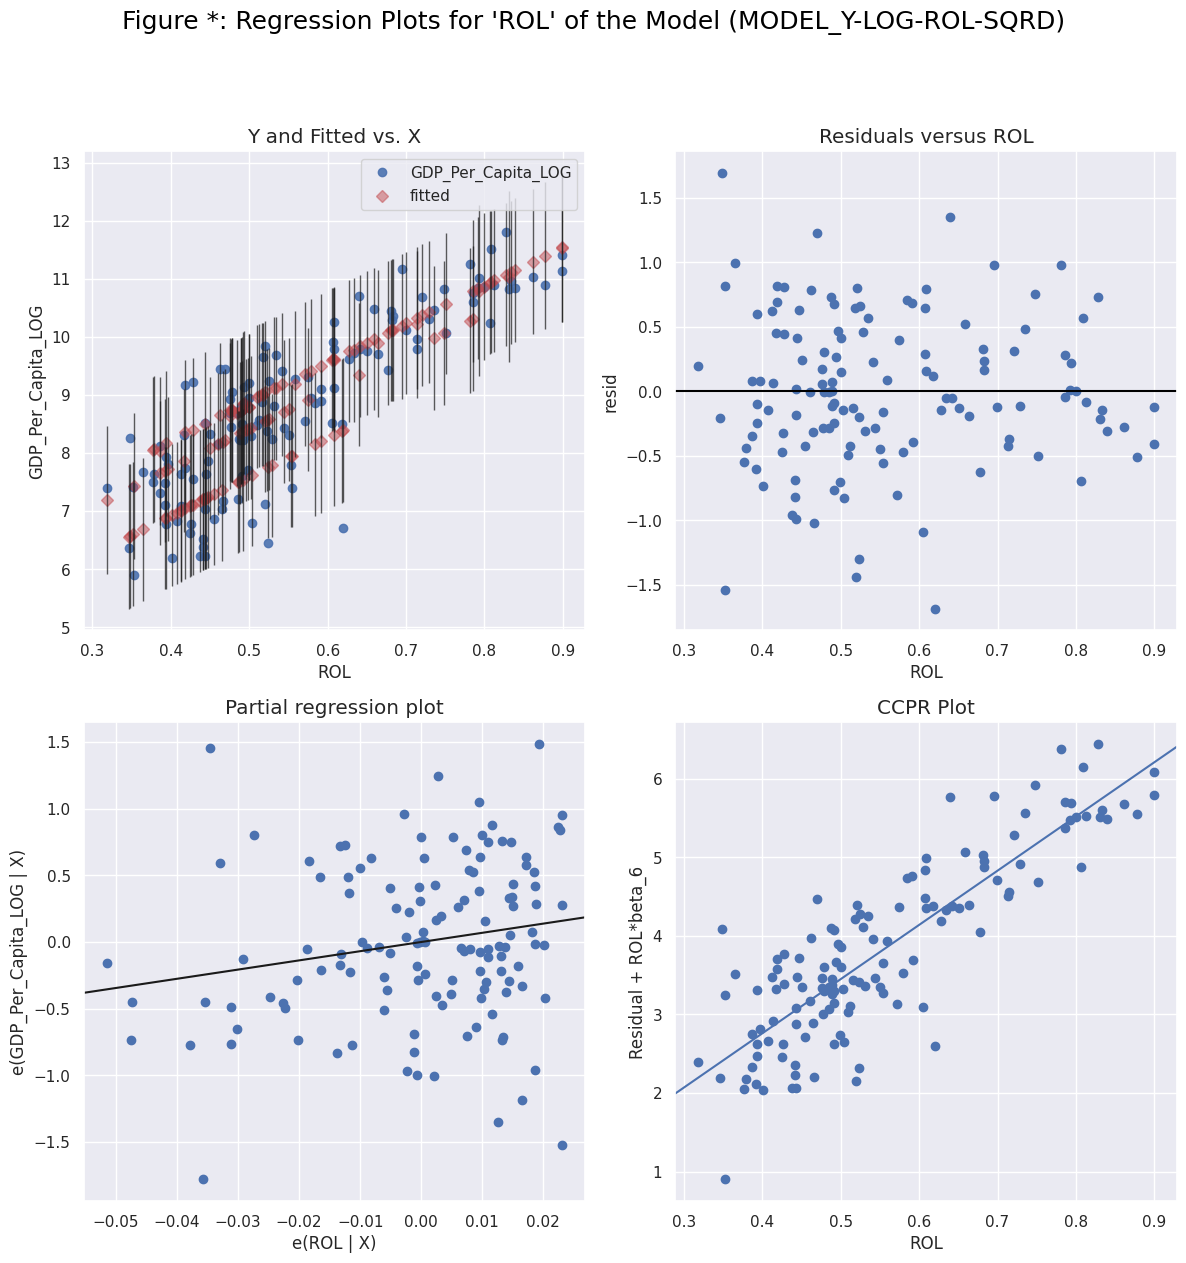

In [84]:
# figure_numerator += 1
    

def plot_regress_exog(initial_model_name, predictor):
    
    # Get the model
    model = models_dict[initial_model_name]
    
    # We have kept options wide, but we need to narrow them down here. 
    # Every model may have a different set of independent variables, and a different output variable as well.
    if initial_model_name == "MODEL_Y-LOG-ROL-SQRD" and predictor in ["HDI", "HDI_SQRD"]:  
        
        print(f"\n{initial_model_name} does not have predictor {predictor}! Try another one.")
    
    elif initial_model_name == "MODEL_Y-SQRT" and predictor in ["HDI", "HDI_SQRD", "ROL_SQRD"]:
        
        print(f"\n{initial_model_name} does not have predictor {predictor}! Try another one.")
        
    else:
    
        # Single Variable Regression Diagnostics plot
        fig = sm.graphics.plot_regress_exog(model, predictor)
        fig.suptitle(f"Figure {figure_numerator}: Regression Plots for '{predictor}' of the Model ({initial_model_name})",
                     fontsize=supTitleSize, 
                     color=titleColor, 
                     y=loc_y
                    )

        fig.set_figwidth(12)
        fig.set_figheight(12)
        fig.tight_layout(pad=1.0)

        plt.show()
    

# Choose the model and independent variable
# widgets.interact(plot_regress_exog, 
#                  initial_model_name=widgets.Dropdown(options=list(models_dict.keys()), 
#                                             value="MODEL_Y-LOG-ROL-SQRD",
#                                             description="Model",
#                                             disabled=False),
#                  predictor=widgets.Dropdown(options=["HDI", "HDI_SQRD", "ROL", "ROL_SQRD"], 
#                                             value="ROL",
#                                             description="Predictor",
#                                             disabled=False),
#                 );

# Choose a model (MODEL_Y-SQRT or MODEL_Y-LOG-ROL-SQRD)
initial_model_name = "MODEL_Y-LOG-ROL-SQRD"

# Choose a predictor ("HDI", "HDI_SQRD", "ROL" or "ROL_SQRD")
predictor = "ROL"

plot_regress_exog(initial_model_name, predictor)

Here, we take the case of `Y-LOG ROL-SQRD` with _ROL_ as the independent variable.  
  
The top left plot is __Fit Plot__. The __Fit Plot__ shows fitted and real values versus a chosen independent variable (_ROL_, in this case), including the prediction confidence intervals. _ROL_ has a positive correlation with the output variable.  
  
Plotting __residuals against a predictor__ (top right) successfully tellis if non-linearity exists in a simple linear regression model. Our graph suggests linearity exists in the model.  
  
In multiple regression problems, we want to look at the relationship of the dependent variable and independent variables conditional on the other independent variables. We can do this through using __partial regression plots__ as in the bottom left.  
  
In a __partial regression plot__, to discern the relationship between the response variable and the $k$-th, we compute the residuals by regressing the response variable versus the independent variables excluding $X_{k}$. We can denote this by $X_{\sim k}$. We then compute the residuals by regressing $X_{k}$ on $X_{\sim k}$. The __partial regression plot__ is the plot of the former versus the latter residuals.  
  
__Component-Component plus Residual (CCPR) Plot__ on the bottom right provides a way to judge the effect of one regressor on the response variable by taking into account the effects of the other independent variables. The partial residuals plot is defined as $Residuals + B_{i}X_{i}$ versus $X_{i}$. The component adds $B_{i}X_{i}$ versus $X_{i}$ to show where the fitted line would lie.  
  
Source: [Regression Plots](https://www.statsmodels.org/devel/examples/notebooks/generated/regression_plots.html)

### Outliers<a class="anchor"  id="outliers"></a>

The next issue we need to check is if any __outliers__ exist in the data. In the previous section, we had some idea about it. We will mention a couple of methods to identify __outliers__. They are _studentized residuals_ and `statsmodels`' _outlier test_.

In [85]:
influence_model_log = model_log.get_influence()
influence_model_sqrt = model_sqrt.get_influence()

#### Studentized Residuals<a class="anchor"  id="studentized-residuals"></a>

An _outlier_ is a point for which $y_{i}$ is far from the value predicted by the model. A standard measure of how far $y_{i}$ is from the fitted value will show whether the observation is an _outlier_. While residual plots help identify _outliers_, a more effective solution is to use __studentized residuals__. __Studentized residuals__ are computed by dividing each residual $e_{i}$ by its estimated standard error. Observations whose __studentized residuals__ are greater than 3 in absolute value are posssible _outliers_.  
  
*Source: An Introduction to Statistical Learning with Applications in R, James, Witten, Hastie and Tibshirani, pg.97-98.*

In [86]:
# Outlier check for MODEL Y-SQRT
dict_model_sqrt_outlier_check = {"studentized_residuals": influence_model_sqrt.resid_studentized, 
                                 "fitted_values": fitted_values_sqrt}

df_model_sqrt_outlier_check = pd.DataFrame.from_dict(dict_model_sqrt_outlier_check)

display(df_model_sqrt_outlier_check.head())

print("\n")


# Outlier check for MODEL Y-LOG ROL-SQRD
dict_model_log_outlier_check = {"studentized_residuals": influence_model_log.resid_studentized, 
                                "fitted_values": fitted_values_log}

df_model_log_outlier_check = pd.DataFrame.from_dict(dict_model_log_outlier_check)

display(df_model_log_outlier_check.head())

,studentized_residuals,fitted_values
0,-0.134,23.252
1,0.482,28.353
2,-0.473,94.690
3,2.280,138.981
4,-0.050,104.653


,studentized_residuals,fitted_values
0,-2.643,7.431
1,0.738,7.110
2,-0.153,8.851
3,2.293,9.346
4,0.149,9.186


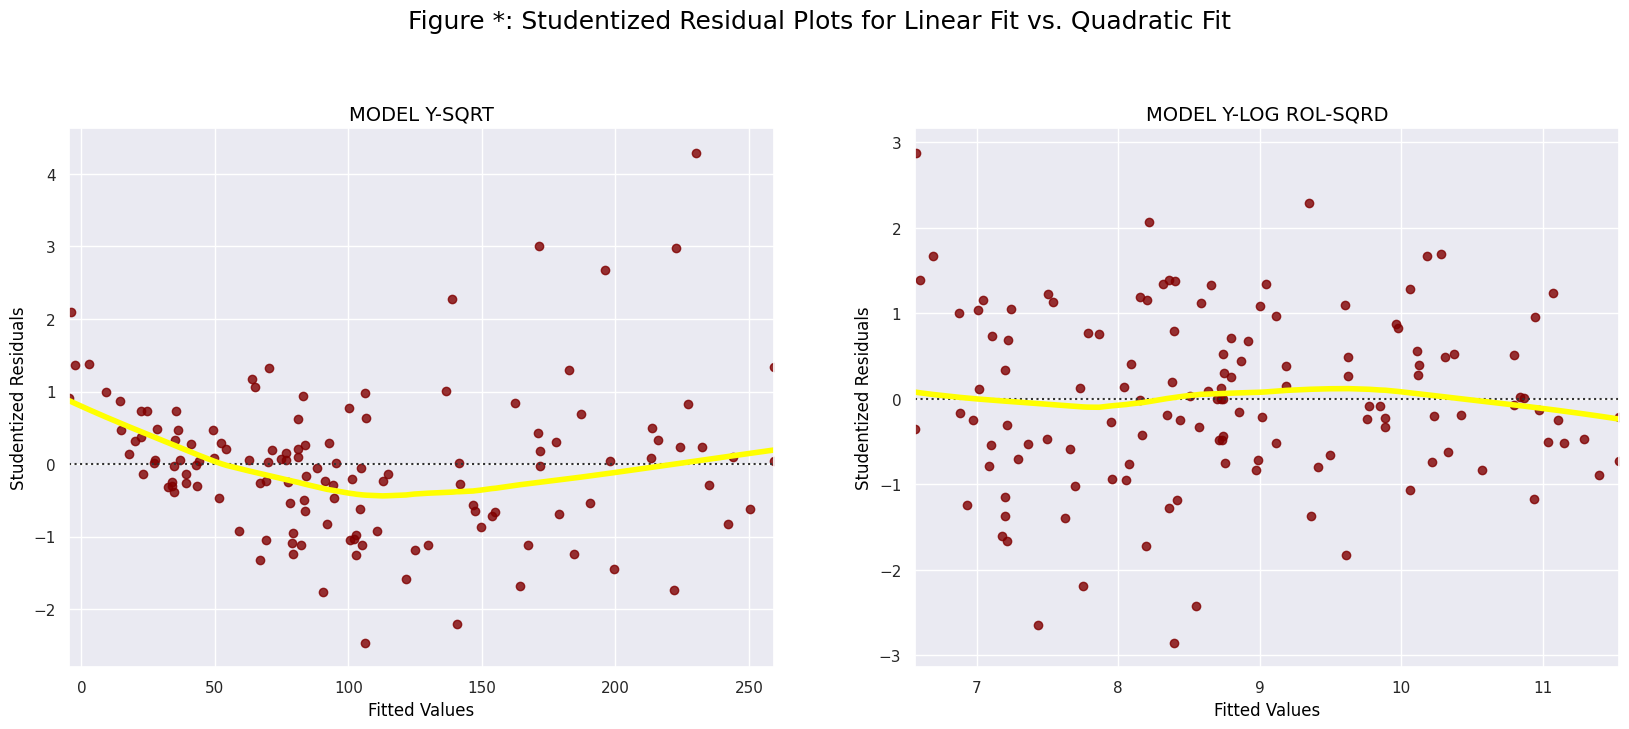

In [87]:
# Studentized residual plots for linear fit vs. quadratic fit

# figure_numerator += 1

# Initializes the figure by defining rows, columns, figure size, and the title
axes = initialize_figure(f"Figure {figure_numerator}: Studentized Residual Plots for Linear Fit vs. Quadratic Fit", # suptitle
                         rows=1,
                         cols=2,
                         figsize=(20, 7),
                         y=loc_y) # suptitle y-axis location 

# Studentized residual plot for MODEL Y-SQRT
plot_residual(axes[0], # ax
                 df_model_sqrt_outlier_check["fitted_values"], # x
                 df_model_sqrt_outlier_check["studentized_residuals"], # y
                 "MODEL Y-SQRT", # title
                 "Fitted Values", # x_label
                 "Studentized Residuals", # y_label
                 lowess=True
             )

# Studentized residual plot for MODEL Y-LOG ROL-SQRD
plot_residual(axes[1], # ax
                 df_model_log_outlier_check["fitted_values"], # x
                 df_model_log_outlier_check["studentized_residuals"], # y
                 "MODEL Y-LOG ROL-SQRD", # title
                 "Fitted Values", # x_label
                 "Studentized Residuals", # y_label
                 lowess=True
             )

plt.show()

A successful linear regression model explains a considerable part of the variation in the dependent variable while validating the assumptions. In such an accurate model, residuals should be small and not exhibit an identifiable pattern. If residuals are not small or random, it calls the success in question.  
  
Checking __outliers__ is a necessary step towards measuring the quality of the regression model. As the above figure suggests, the model `Y-SQRT` has one __outlier__, while the other model has none. All residual points of `Y-LOG ROL-SQRD` fall between -3 and +3 standard deviations.

#### Outlier Test<a class="anchor"  id="outlier-test"></a>

Test observations for __outliers__ according to method. Source: [statsmodels.regression.linear_model.OLSResults.outlier_test](https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLSResults.outlier_test.html)

In [88]:
def get_outlier_records(black_swans):
    
    """
    This functions returns outlier countries as a list and df
    """
    
    # Filter countries in the data, which have outlier values and create a new df
    df_black_swans = data.iloc[black_swans,:]
    
    # Set the 'Country Name' as the index of the outlier countries dataframe
    df_black_swans.set_index("Country Name", inplace=True)
    display(df_black_swans)
    
    #Generate a list of outlier countries
    outlier_countries = df_black_swans.index.values.tolist()
    
    return  outlier_countries, df_black_swans



def detect_outlier(model_name, alpha_value=0.05):
    
    """
    This functions identifies, tests and returns outliers
    """

    model = models_dict[model_name]
    
    # Implement the outlier test of statsmodels 
    df_outlier_test = model.outlier_test()
    
    # Display the test results
    print("Number of rows in the test: ", len(df_outlier_test))
    display(df_outlier_test.head())
    
    print("\n")
    
    # Decide the records that are less than the threshold value as outliers
    print(f"Outliers by (bonf(p) < {alpha_value}:")
    
    # Filter the records that are less than the threshold value. They are outliers.
    # Create a new dataframe for outliers
    df_outliers = df_outlier_test[df_outlier_test["bonf(p)"] < alpha_value]   
    display(df_outliers)
    
    print("\n")
    
    # When no outliers exist
    if len(df_outliers) == 0:
        
        print("The model hasn't produced any outliers.")
        
        return None, None
    
    # When outliers exist
    else:
        
        print(f"The model has produced {len(df_outliers)} outlier(s), which is/are shown below:")
        
        # Get the outlier countries as a list and dataframe
        outlier_countries_list, df_outlier_countries = get_outlier_records(df_outliers.index.values)
        
        return outlier_countries_list, df_outlier_countries
    

In [89]:
model_name_sqrt = "MODEL_Y-SQRT"
outlier_countries_list_sqrt, df_outlier_countries_sqrt = detect_outlier(model_name_sqrt, alpha_value=0.05)

Number of rows in the test:  131


,student_resid,unadj_p,bonf(p)
0,-0.133,0.894,1.0
1,0.481,0.631,1.0
2,-0.471,0.638,1.0
3,2.320,0.022,1.0
4,-0.049,0.961,1.0




Outliers by (bonf(p) < 0.05:


,student_resid,unadj_p,bonf(p)
73,4.635,8.970e-06,0.001




The model has produced 1 outlier(s), which is/are shown below:


,Continent,Population,GDP_Per_Capita,HDI,ROL,GDP_Per_Capita_SQRT,HDI_SQRD,GDP_Per_Capita_LOG,ROL_SQRD
Country Name,,,,,,,,,
Luxembourg,Europe,640064,133590.141,0.896,0.828,365.5,0.803,11.803,0.685


According to the model `Y-SQRT`, _Luxembourg_ is an __outlier__.

In [90]:
model_name_log = "MODEL_Y-LOG-ROL-SQRD"
outlier_countries_list_log, df_outlier_countries_log = detect_outlier(model_name_log, alpha_value=0.05)

Number of rows in the test:  131


,student_resid,unadj_p,bonf(p)
0,-2.711,0.008,1.0
1,0.737,0.463,1.0
2,-0.152,0.879,1.0
3,2.334,0.021,1.0
4,0.148,0.883,1.0




Outliers by (bonf(p) < 0.05:


,student_resid,unadj_p,bonf(p)




The model hasn't produced any outliers.


Fortunately, the model `Y-LOG ROL-SQRD` hasn't produced any __outliers__. However, we have one __outlier__ with `Y-SQRT`. Let's find out the Black Swan there and visualize it! We'll draw a __fit plot__ for this. We have seen this before as a part of a larger plot.

#### Fit Plot<a class="anchor"  id="fit-plot"></a>

Source: [statsmodels.graphics.regressionplots.plot_fit](https://www.statsmodels.org/dev/generated/statsmodels.graphics.regressionplots.plot_fit.html)

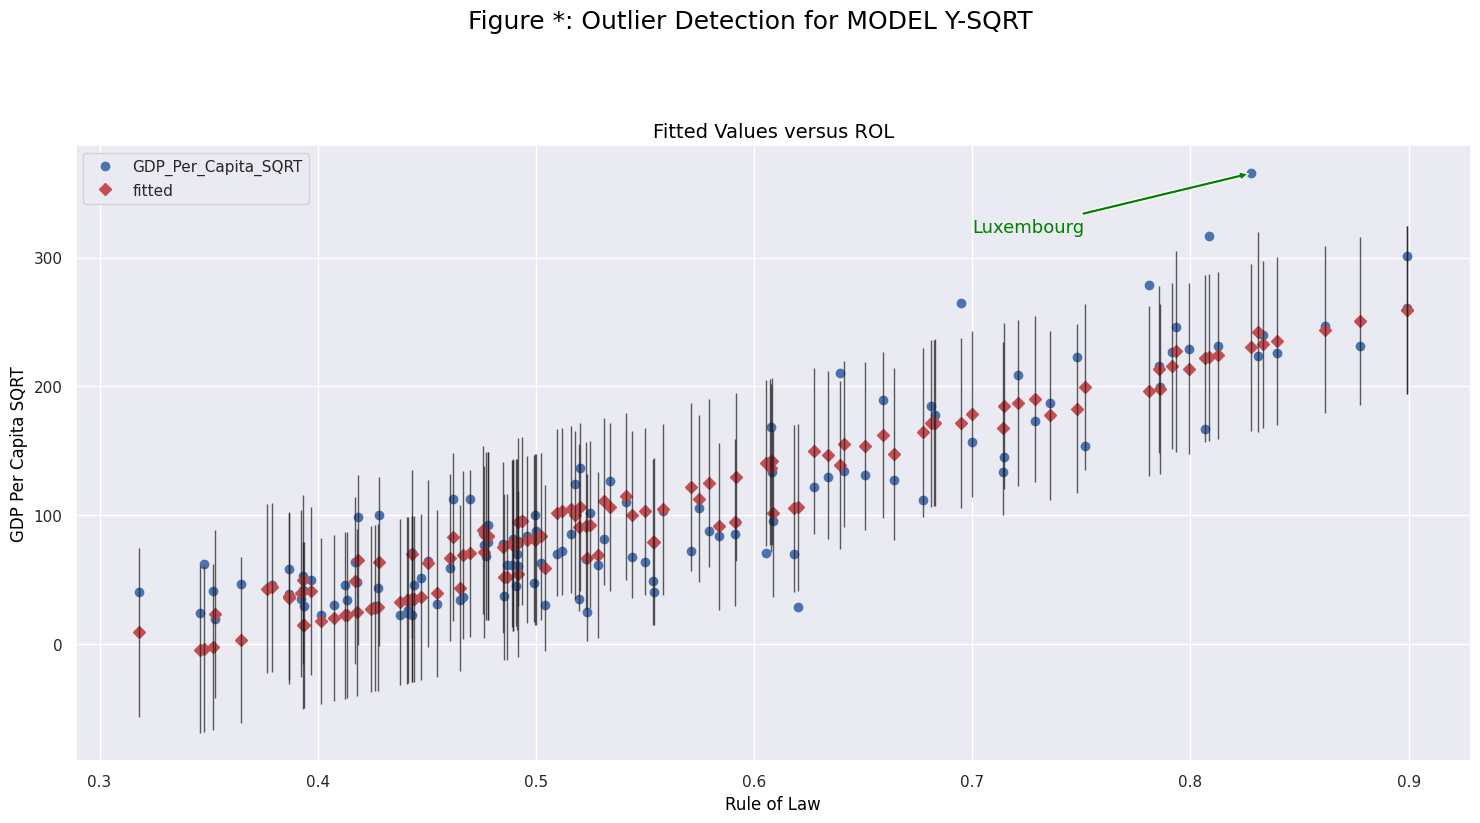

In [91]:
# figure_numerator += 1

# Initializes the figure by defining rows, columns, figure size, and the title
axes = initialize_figure(f"Figure {figure_numerator}: Outlier Detection for MODEL Y-SQRT", # suptitle
                         rows=1,
                         cols=1,
                         figsize=(18, 8),
                         y=loc_y) # suptitle y-axis location

# Fit plot. 6 is name or index of regressor in exog matrix.
plot_fit(model_sqrt, 6, axes, "Fitted Values versus ROL", "Rule of Law", "GDP Per Capita SQRT")
# plot_fit(model_sqrt, 6, axes[1], "Fitted Values versus HDI", "Human Development Index", "GDP Per Capita SQRT")
# plot_fit(model_sqrt, 7, axes[2], "Fitted Values versus HDI SQRD", "Human Development Index SQRD", "GDP Per Capita SQRT")

# Annotate the outlier country in the plot
for country, y_coor in zip(outlier_countries_list_sqrt, [320]):

    axes.annotate(country, 
                xy=(df_outlier_countries_sqrt.loc[country]["ROL"], 
                    df_outlier_countries_sqrt.loc[country]["GDP_Per_Capita_SQRT"]),
                xytext=(0.7, y_coor), 
                xycoords="data",
                textcoords="data", 
                size=labelSizeX,
                color="green",
                arrowprops=dict(facecolor="green", arrowstyle="simple", connectionstyle="arc3"))

plt.show()


A few points fall outside confidence intervals but haven't risen to an __outlier__ level. Only _Luxembourg_ is beyond three standard deviations from the mean.

#### Cook's Distance<a class="anchor"  id="cooks-distance"></a>

__Cook’s distance__ or __Cook’s D__ is a commonly used estimate of the influence of a data point when performing least squares regression analysis. It is useful for identifying _outliers_ in the X values (observations for predictor variables) and also shows the influence of each observation on the fitted response values. __Cook’s distance__ measures the effect of deleting a given observation. Data points with large residuals (_outliers_) and/or high leverage may distort the outcome and accuracy of a regression. So, __Cook’s D__ is a good measure of the influence of an observation and is proportional to the sum of the squared differences between predictions made with all observations in the analysis and predictions made leaving out the observation in question.  
  
It is calculated as:  
  
$\Large D_{i}= \frac{\sum_{j=1}^{n}\left ( \hat{Y_{j}}-\hat{Y}_{j(i)} \right )^{2}}{p\times MSE}$  
  
Where  
  
+ $\normalsize \hat{Y}_{j}$ is the prediction from the full regression model for observation $j$.  
+ $\normalsize \hat{Y}_{j(i)}$ is the prediction for observation $j$ from a refitted regression model in which observation $i$ has been omitted.  
+ $\normalsize p$ is the number of fitted parameters in the model.  
+ $\normalsize MSE$ is the mean square error of the regression model.  
  
Data points for which __Cook’s distance__ is greater than $1$ or $ \frac{4}{n}$ or $ \frac{4}{n-p-1}$ are outliers.  
  
Source: [Cook’s Distance](https://rpubs.com/DragonflyStats/Cooks-Distance)

In [92]:
# c is the distance and p is p-value for each data observation

# Cooks's distance for MODEL Y-SQRT
cooks_distance_for_model_sqrt, cooks_p_value_for_model_sqrt = influence_model_sqrt.cooks_distance

# Cooks's distance for MODEL Y-LOG ROL-SQRD
cooks_distance_for_model_log, cooks_p_value_for_model_log = influence_model_log.cooks_distance

In [93]:
# Calculate thresholds for Cook's distance, against which we measure data points to identify outliers
threshold_1 = {"MODEL Y-SQRT": 1, "MODEL Y-LOG ROL-SQRD": 1}
threshold_n = {"MODEL Y-SQRT": round((4 / nobs_sqrt), 5), "MODEL Y-LOG ROL-SQRD": round((4 / nobs_log), 5)}
threshold_np = {"MODEL Y-SQRT": round((4 / (nobs_sqrt - dfm_sqrt)), 5), "MODEL Y-LOG ROL-SQRD": round((4 / (nobs_log - dfm_log)), 5)}

# Store thresholds in a dictionary for both models
dict_thresholds = {"threshold_1": threshold_1, 
                   "threshold_n": threshold_n, 
                   "threshold_np": threshold_np
                  }

In [94]:
def get_anno_for_hbar_plot(x, y, threshold):
    
    """
    Annotates outliers' y-tick labels
    """
    
    # y locs
    inds_for_y = list(np.where(x > threshold)[0])
    
    # x locs
    x_vals_by_ind = x[inds_for_y]
    
    # xip x and y locs 
    zipped = zip(x_vals_by_ind, inds_for_y)
    
    return zipped


def create_hbar(title, x, y, x_label, y_label, threshold, ax):
    
    """
    This creates and return horizontal bar
    """
    
    # Horizontal barplot
    cd_plot = sns.barplot(x=x, y=y, orient="h", color=dataColor2, ax=ax)
    
    # Invert the y-axis. Reverses the order of y-tick labels
    cd_plot.invert_yaxis()
    
    # Vertical line at threshold
    cd_plot.axvline(x=threshold, ymin=0, ymax=max(y), color=lineColor2, linestyle="--", lw=2)
    
    # Set and define the title, x-axis and y-axis labels
    arrange_layout(ax, title, x_label, y_label)    

    # Reduce y-tick labels
    for ind, label in enumerate(cd_plot.get_yticklabels()):
        if ind % 5 == 0:  # every 10th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
    
    # Annotate outliers' y-tick labels
    indices = get_anno_for_hbar_plot(x, y, threshold)
    
    for x_loc, y_loc in indices: 
        # index
        # cd_plot.annotate(y_loc, xy=(x_loc-0.006, y_loc), color=lineColor, size=labelSize)
        
        # country
        cd_plot.annotate(data.loc[y_loc]["Country Name"], xy=(x_loc+0.003, y_loc), color=labelColor, size=labelSize)

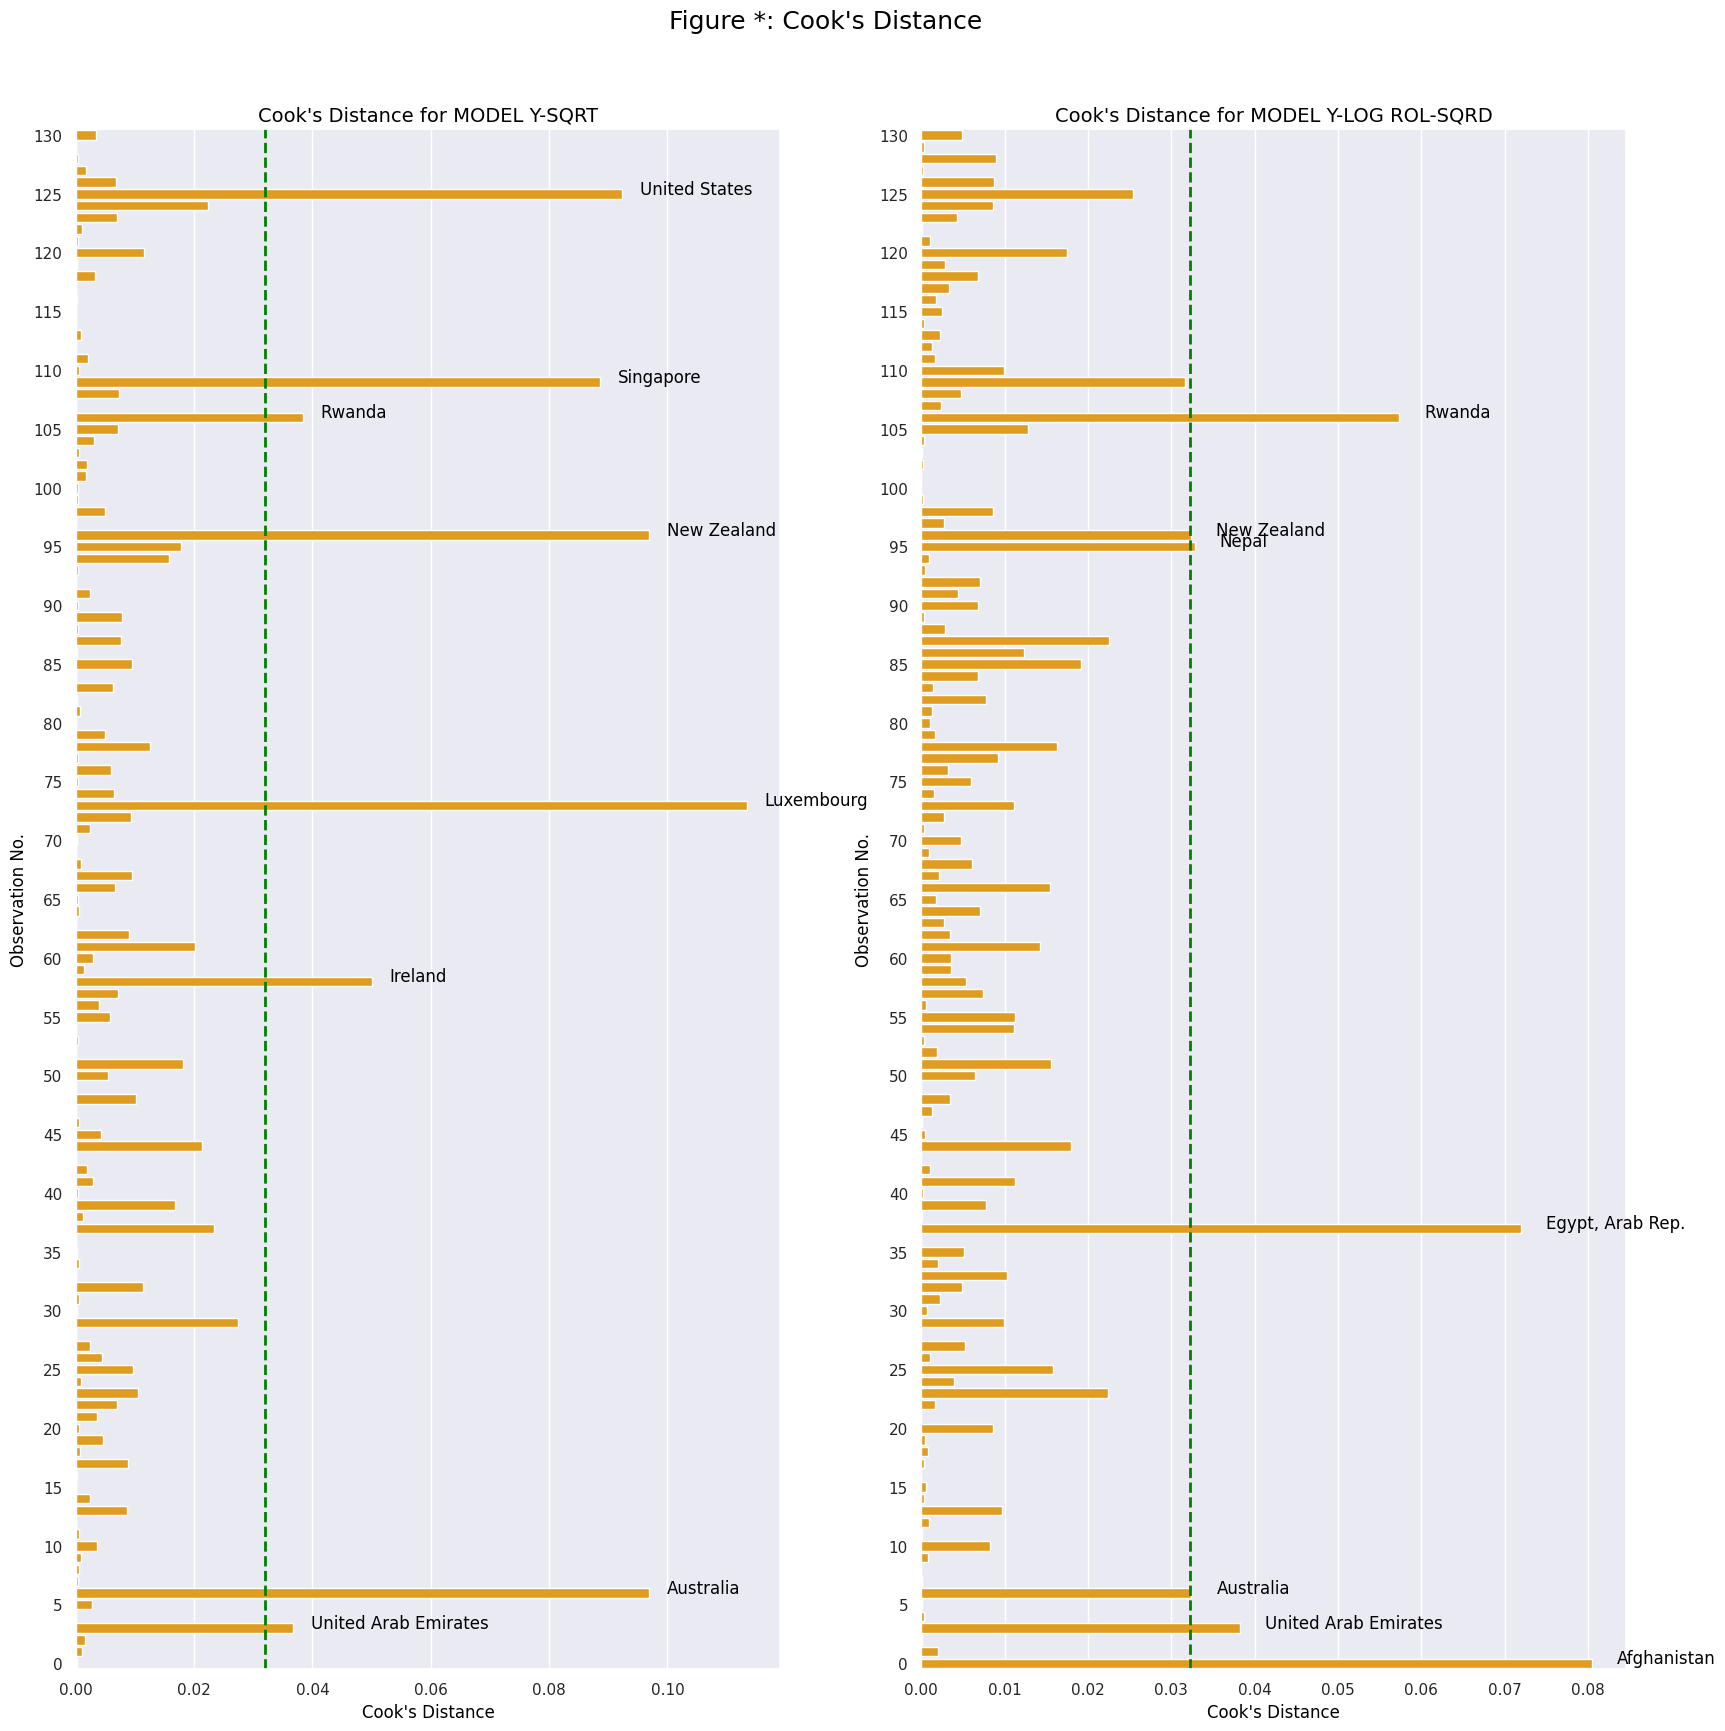

In [95]:
# figure_numerator += 1

def visualize_cooks_distance(threshold):
       
    # Initializes the figure by defining rows, columns, figure size, and the title
    axes = initialize_figure(f"Figure {figure_numerator}: Cook's Distance", # suptitle
                         rows=1,
                         cols=2,
                         figsize=(20, 20),
                         y=0.94) # suptitle y-axis location
    
    # Horizontal bar for MODEL Y-SQRT
    create_hbar("Cook's Distance for MODEL Y-SQRT", # title
                cooks_distance_for_model_sqrt, # x
                np.arange(len(cooks_distance_for_model_sqrt)), # y
                "Cook's Distance", # x_label
                "Observation No.", # y_label
                dict_thresholds[threshold]["MODEL Y-SQRT"], # threshold for line
                axes[0] # ax
             )
    
    # Horizontal bar for MODEL Y-LOG ROL-SQRD
    create_hbar("Cook's Distance for MODEL Y-LOG ROL-SQRD", # title
                cooks_distance_for_model_log, # x
                np.arange(len(cooks_distance_for_model_log)), # y
                "Cook's Distance", # x_label
                "Observation No.", # y_label
                dict_thresholds[threshold]["MODEL Y-LOG ROL-SQRD"], # threshold for line
                axes[1] # ax
             )

    plt.show()
    

# Widget that helps manipulate thresholds to evaluate data points  
# widgets.interact(visualize_cooks_distance, 
#                  threshold=widgets.Dropdown(options=["threshold_1", "threshold_n", "threshold_np"], 
#                                             value="threshold_np",
#                                             description="Threshold",
#                                             disabled=False)
#                 )


# Choose a threshold value ("threshold_1", "threshold_n" or "threshold_np")
visualize_cooks_distance("threshold_np")

__Cook's distance__ suggests different data points are _outliers_ depending on the threshold we choose. That holds true for both models. Yet, as shown by earlier measurements, one data point, _Luxembourg_, too stands as an _outlier_ for __Cook's distance__. Similarly, __Cook's distance__ reveals _Luxembourg_ as an _outlier_ for the model `Y-SQRT`.

### Leverage<a class="anchor"  id="leverage"></a>

In statistics and in particular in regression analysis, __leverage__ is a measure of how far away the independent variable values of an observation are from those of the other observations. High-__leverage__ points, if any, are _outliers_ with respect to the independent variables. Source: [Leverage (statistics)](https://en.wikipedia.org/wiki/Leverage_(statistics))  
  
While an _outlier_ is the unusual response $Y_{i}$ given the predictor $X_{i}$, a high __leverage__ observation has an unusual value among all observations for that independent variable.  In other words, an _outlier_ is a black swan among response values given a predictor, a high __leverage__ observation is another black swan among observations of that independent variable.  
  
__Leverage__ is calculated as:  
  
$\large h_{i}= \frac{1}{n}+\frac{\left (x_{i}-\bar{x} \right )^{2}}{\sum_{{i^{'}}=1}^{n}\left (x_{i^{'}}-\bar{x}  \right )^{2}}$  
  
Where  
  
+ $h_{i}$ is the leverage statistic for observation $x_{i}$ for predictor $x$  
+ $n$ is the number of observations in the dataset  
+ $x_{i}$ is the observation of predictor $x$  
+ $\bar{x}$ is the mean of observations of predictor $x$  
+ $x_{i^{'}}$ is an observation of predictor $x$  
  
The __leverage__ statistic $h_{i}$ is always between $\frac{1}{n}$ and 1, and the average __leverage__ for all the observations is always equal to $\frac{p+1}{n}$. So if a given observation has a __leverage__ statistic that greatly exceeds $\frac{p+1}{n}$, then we may suspect that the corresponding point has high __leverage__.  
  
*Source: An Introduction to Statistical Learning with Applications in R, James, Witten, Hastie and Tibshirani, pg.99.*    
  
We want to declare an observation as a high __leverage__ point if it satisfies $h_{i}> 2\times \frac{\left ( p+1 \right )}{n}$  
  
An observation might be both an _outlier_ and high __leverage__ point, which is a dangereous case.  
  
We'll plot the __leverage__ statistics vs. normalized residuals squared.

In [96]:
sns.set_context("notebook", 
                rc={"font.size":dataSize,
                    "axes.titlesize":titleSize,
                    "axes.labelsize":labelSize,
                   }
               )  

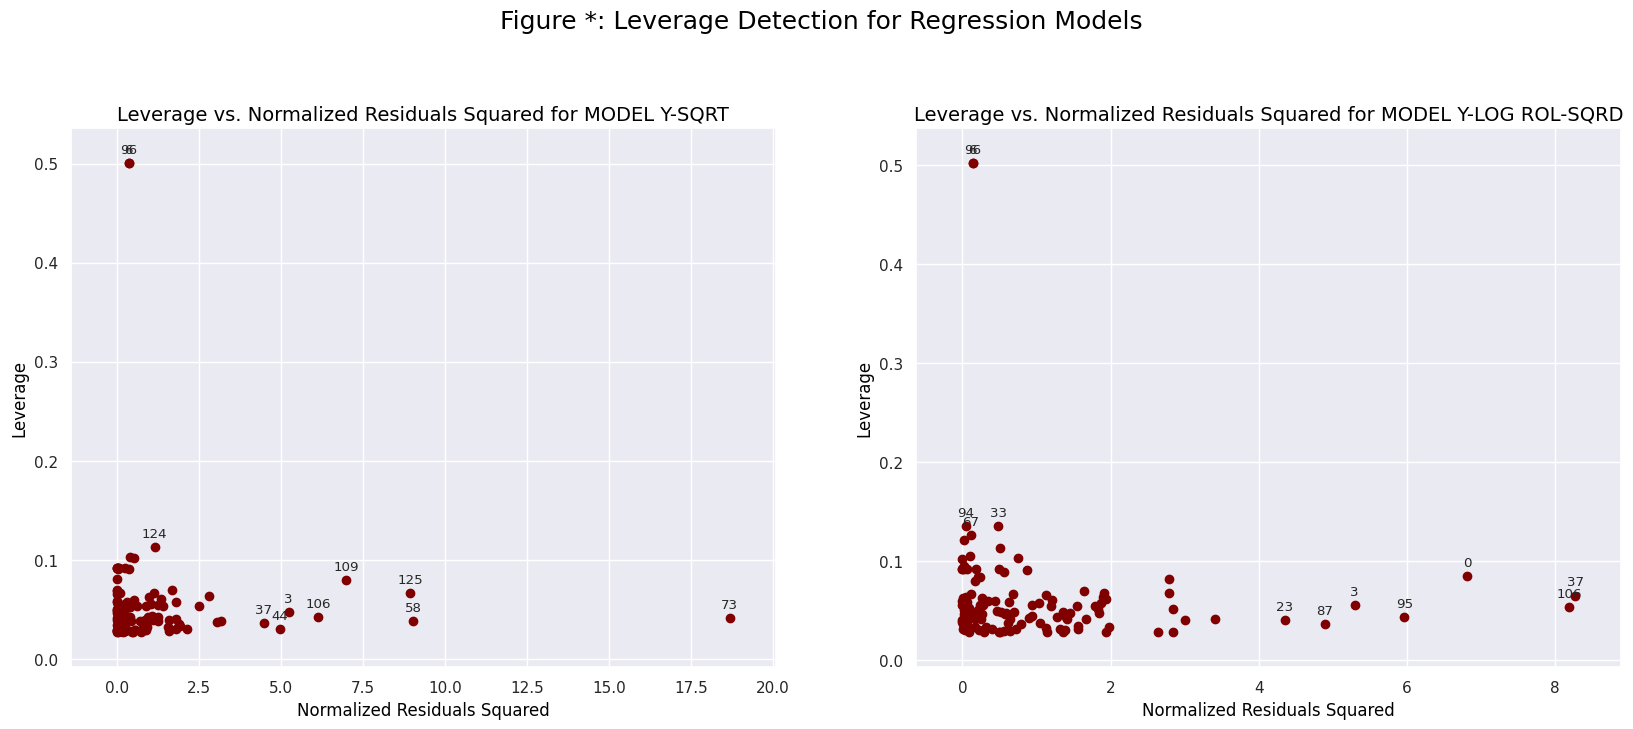

In [97]:
# figure_numerator += 1

# Initializes the figure by defining rows, columns, figure size, and the title
axes = initialize_figure(f"Figure {figure_numerator}: Leverage Detection for Regression Models", # suptitle
                         rows=1,
                         cols=2,
                         figsize=(20, 7),
                         y=loc_y) # suptitle y-axis location
    
plot_leverage(model_sqrt, # model
                axes[0], # ax
                "Leverage vs. Normalized Residuals Squared for MODEL Y-SQRT", # title
                "Normalized Residuals Squared", # x_label
                "Leverage" # y_label
             )

plot_leverage(model_log, # model
                axes[1], # ax
                "Leverage vs. Normalized Residuals Squared for MODEL Y-LOG ROL-SQRD", # title
                "Normalized Residuals Squared", # x_label
                "Leverage" # y_label
             )

plt.show()

As you may notice, data point __73__ represents _Luxembourg_ and indicates an _outlier_ obviously. The chart also shows __leverage__ points and we have two observations that are high-__leverage__ points, data points __6__ and __96__. I'm really curious about who 6 and 96 are!

In [98]:
data.loc[[6, 96],:]

,Country Name,Continent,Population,GDP_Per_Capita,HDI,ROL,GDP_Per_Capita_SQRT,HDI_SQRD,GDP_Per_Capita_LOG,ROL_SQRD
6,Australia,Oceania,25688079,60444.504,0.958,0.793,245.855,0.917,11.009,0.630
96,New Zealand,Oceania,5111400,49996.422,0.946,0.831,223.599,0.895,10.820,0.691


__6__ is _Australia_, and __96__ is _New Zealand_; both are _Oceania_ countries!

#### Influence Plot<a class="anchor"  id="influence-plot"></a>

Row labels for the observations in which the _leverage_, measured by the diagonal of the hat matrix, is high or the _residuals_ are large, as the combination of large _residuals_ and a high __influence__ value indicates an __influence__ point. The value of large _residuals_ can be controlled using the alpha parameter. Large _leverage_ points are identified as $h_{i}> 2\times \frac{\left ( df\_model+1 \right )}{nobs}$.  
  
Size of the bubbles shows the __influence__ of an observation. Data points that have both high _leverage_ and large _residuals_ will exert a large __influence__. Observations with high _leverage_, or large _residuals_ will be labeled in the plot to show potential __influence__ points.  
  
Sources:  
* [statsmodels.graphics.regressionplots.influence_plot](https://www.statsmodels.org/dev/generated/statsmodels.graphics.regressionplots.influence_plot.html)  
* [Regression Plots, Influence plots](https://www.statsmodels.org/devel/examples/notebooks/generated/regression_plots.html)

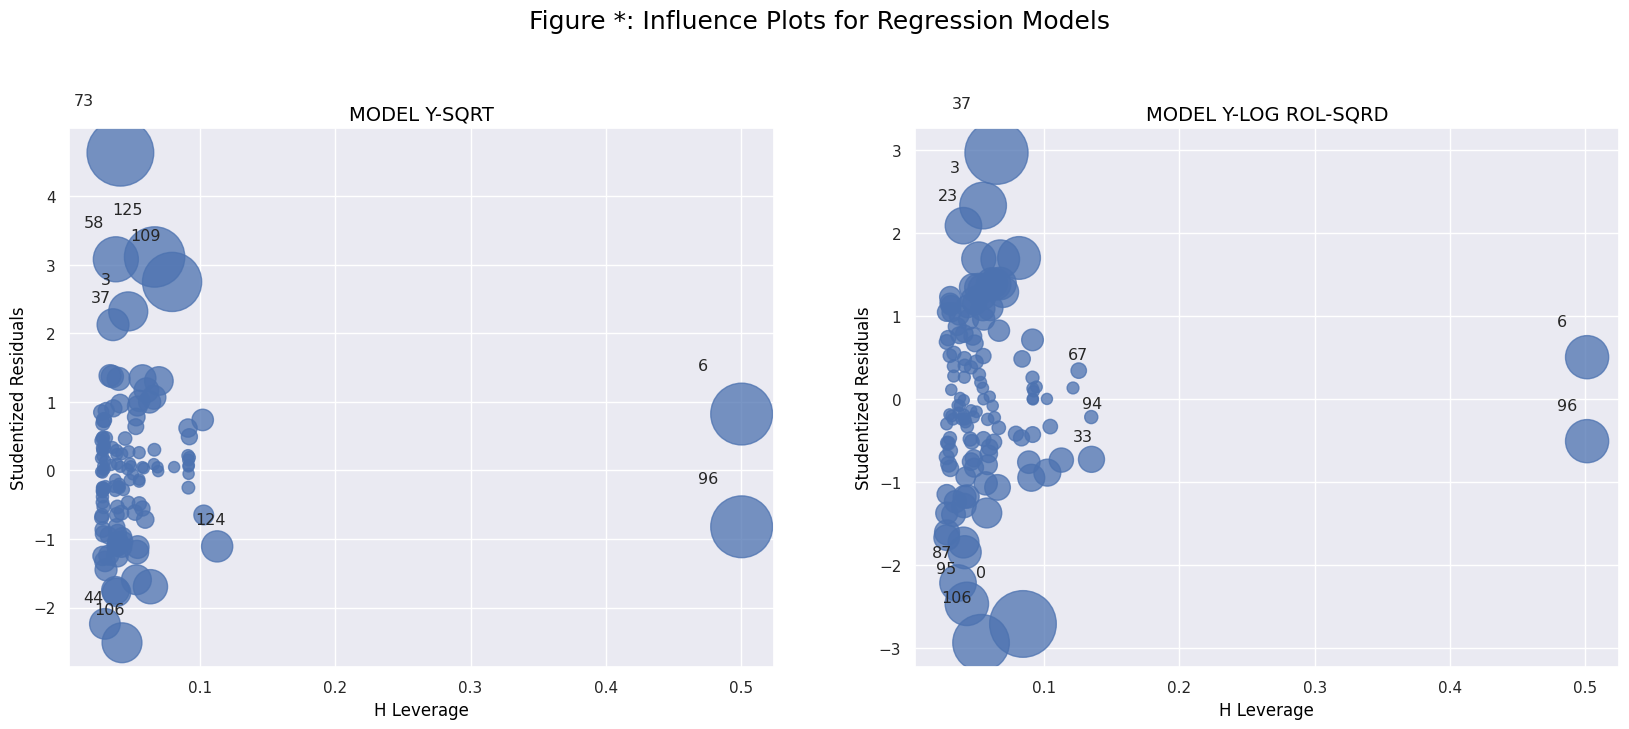

In [99]:
# figure_numerator += 1

# Generate a tuple for alpha values
alpha_values = list(np.linspace(start=0, stop=1, num=21, retstep=True)[0])
alpha_values = list(map(lambda x: round(x, 3), alpha_values))


def visualize_influence_plot(alpha):

    """
    This function creates and returns the influence plot. For details, check out the link:
    https://www.statsmodels.org/dev/generated/statsmodels.graphics.regressionplots.influence_plot.html
    """
    
    # Initializes the figure by defining rows, columns, figure size, and the title
    axes = initialize_figure(f"Figure {figure_numerator}: Influence Plots for Regression Models", # suptitle
                         rows=1,
                         cols=2,
                         figsize=(20, 7),
                         y=loc_y) # suptitle y-axis location
    
    # Influence plot for MODEL Y-SQRT
    plot_influence(model_sqrt, # model
                       axes[0], # ax
                       "MODEL Y-SQRT", # title
                       "H Leverage", # x_label
                       "Studentized Residuals", # y_label
                       alpha
                  )

    # Influence plot for MODEL Y-LOG ROL-SQRD
    plot_influence(model_log, # model
                       axes[1], # ax
                       "MODEL Y-LOG ROL-SQRD", # title
                       "H Leverage", # x_label
                       "Studentized Residuals", # y_label
                       alpha
                  )
    
    plt.show()


# Widget that manipulates alpha parameter
# widgets.interact(visualize_influence_plot, 
#                  alpha=widgets.FloatSlider (name="Float Slider",
#                                             min=0,
#                                             max=1.0,
#                                             step=0.05,
#                                             value=0.05,
#                                             description="alpha",
#                                             orientation="horizontal",
#                                             disabled=False,
#                                           )
#                 );

# Choose an alpha value between 0 and 1. The default value is 0.05
visualize_influence_plot(0.05)

We can play around with the alpha value. The alpha value identifies large _studentized residuals_. It has to do with __outlier__ analysis rather than the __leverage__ examination.  
  
Big bubble size demonstrates the __influence__ of _Luxembourg_, and that is due to the high _residual_ value. The __influence__ of _Australia_ and _New Zealand_ emanates from their high __leverage__ scores. Other labeled points show their __influence__ potential, which we can attribute to their large _residual_ values or high __leverage__ points.  
  
In the above two graphs, labels are index values of countries. To find which country an index number represents, we can select the index number from the dropdown list.

In [100]:
# Find the country names of high-leverage or large-residual observations

country_indices = list(range(int(nobs_log)))

def bring_country_name(country_index):
    country_data = data.loc[country_index].to_frame().T
    display(country_data)

# widgets.interact(bring_country_name, 
#                  country_index=widgets.Dropdown(options=country_indices, 
#                                             value=0,
#                                             description="Country",
#                                             disabled=False)
#                 );

# Set the country index between 0 and 130. The default value is 0.
bring_country_name(0)

,Country Name,Continent,Population,GDP_Per_Capita,HDI,ROL,GDP_Per_Capita_SQRT,HDI_SQRD,GDP_Per_Capita_LOG,ROL_SQRD
0,Afghanistan,Asia,40099462,363.674,0.498,0.353,19.07,0.248,5.896,0.124


There are four main ways to handle an outlier problem:  

+ Delete them.  
+ Change the values to the next highest or lowest number, which is a non-outlier number.  
+ Replace outliers with the mean or median.  
+ Transform the data. Instead of looking at $X$, look at  $\frac{1}{X}$, $logX$, or $X^{2}$, and then check if outliers still persist. Check for normality, and continue until the distribution follows a more or less normal distribution.  
  
If outliers have not occurred due to some error, I suggest keeping them, following one of the last three treatments above. Outliers that haven't occurred due to an error in data collection or recording are still part of nature and should be considered after some transformation.

---  
For a complete list of Regression Diagnostics and Specification Tests, see:  
  
[Regression Diagnostics and Specification Tests](https://www.statsmodels.org/dev/diagnostic.html)  

--- 

## Prediction and Inference<a class="anchor"  id="prediction-inference"></a>

### Comparison of Predictions<a class="anchor"  id="comparison-of-predictions"></a>

Now, we will compare how the two models predict. We know our purpose is to make inferences, and both models have some issues to fix first. We'll come to this a little later. At the moment, we want to see the comparison first.

In [101]:
def compute_scipy_regress(x, y):
    
    """
    This function returns regression results of the scipy library's linear regression
    """
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
    line = slope * x + intercept
    
    return x, line


def predict(model, df, ind_vars, col):
    
    """
    This functions returns predictions made by one of the models we developed earlier, and
    returns a dataframe with independent variables and predictions
    """
    
    # Independent variables in the data
    df_ind_vars = df[ind_vars]
    
    # Predict with independent variables 
    predictions = model.predict(df_ind_vars)
    
    # Add predictions to the original data
    df[col] = predictions
    
    # Delete the df
    del df_ind_vars
    
    display(df.head())
    
    print("\n")
    
    return df


def predict_individual_case(model, dict_x):
    
    """
    This functions computes and returns predictions for a single entry that is
    stored and submitted in a dictionary, such as:
    {"Continent": "Europe", "HDI":0.824, "ROL":0.50}
    
    """
    
    # Predict
    prediction = model.predict(dict_x)

    # If the model is MODEL Y-SQRT, predictions should be squared to 
    # match the original Y value (before transformation)
    if model == model_sqrt:
        
        prediction_y = round(prediction**2, 2)
    
    # If the model is MODEL Y-LOG ROL-SQRD, we should take the inverse of the natural 
    # logarithm of predictions to match the original Y value (before transformation)
    elif model == model_log or model_log_rol:
        
        prediction_y = round(np.exp(prediction), 2) 
    
    # If no model is given
    else:
        
        prediction_y = 0
    
    return prediction_y

In [102]:
# Predict for the entire dataset

# Create a copy of the original data
data_for_preds = data.copy()

# Predict with MODEL Y-SQRT, and add the predictions to the new df
data_for_preds = predict(model_sqrt, data_for_preds, ["Continent", "ROL"], "Predictions_SQRT")

# Predict with MODEL Y-LOG ROL-SQRD, and add the predictions to the new df
data_for_preds = predict(model_log, data_for_preds, ["Continent", "ROL", "ROL_SQRD"], "Predictions_LOG")

,Country Name,Continent,Population,GDP_Per_Capita,HDI,ROL,GDP_Per_Capita_SQRT,HDI_SQRD,GDP_Per_Capita_LOG,ROL_SQRD,Predictions_SQRT
0,Afghanistan,Asia,40099462,363.674,0.498,0.353,19.070,0.248,5.896,0.124,23.252
1,Angola,Africa,34503774,1903.717,0.576,0.428,43.632,0.332,7.552,0.183,28.353
2,Albania,Europe,2811666,6377.203,0.822,0.492,79.857,0.675,8.760,0.242,94.690
3,United Arab Emirates,Asia,9365145,44315.555,0.881,0.640,210.513,0.777,10.699,0.409,138.981
4,Argentina,South America,45808747,10636.115,0.860,0.558,103.132,0.740,9.272,0.312,104.653


,Country Name,Continent,Population,GDP_Per_Capita,HDI,ROL,GDP_Per_Capita_SQRT,HDI_SQRD,GDP_Per_Capita_LOG,ROL_SQRD,Predictions_SQRT,Predictions_LOG
0,Afghanistan,Asia,40099462,363.674,0.498,0.353,19.070,0.248,5.896,0.124,23.252,7.431
1,Angola,Africa,34503774,1903.717,0.576,0.428,43.632,0.332,7.552,0.183,28.353,7.110
2,Albania,Europe,2811666,6377.203,0.822,0.492,79.857,0.675,8.760,0.242,94.690,8.851
3,United Arab Emirates,Asia,9365145,44315.555,0.881,0.640,210.513,0.777,10.699,0.409,138.981,9.346
4,Argentina,South America,45808747,10636.115,0.860,0.558,103.132,0.740,9.272,0.312,104.653,9.186


These are the predictions we have made for the entire dataset. For the moment, don't worry about the train-test split because our purpose is just to make a comparison.

In [103]:
# Predict for random X values

# X values for each model
my_dict_sqrt = {"Continent": "Europe", "ROL": 0.50}
my_dict_log = {"Continent": "Europe", "ROL": 0.50, "ROL_SQRD": 0.50**2}

# Predictions
prediction_for_sqrt = predict_individual_case(model_sqrt, my_dict_sqrt)
prediction_for_log = predict_individual_case(model_log, my_dict_log)

print("Prediction for MODEL Y-SQRT: ", prediction_for_sqrt.to_list()[0]) # prediction_for_sqrt.values[0]
print("\n")
print("Prediction for MODEL Y-LOG ROL-SQRD: ", prediction_for_log.to_list()[0]) # prediction_for_log.values[0]

Prediction for MODEL Y-SQRT:  9621.86


Prediction for MODEL Y-LOG ROL-SQRD:  7384.26


For a fictitious country that is located in _Europe_ and has a _ROL_ of 0.50, the models provide different predictions for _GDP Per Capita_. Which one is closer to the true value?! Let us find it out for all observations. We plot predictions against true values for each model. We keep both predicted and true values as transformed.

In [104]:
# Figure layout
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Model SQRT", "Model LOG"),
)

# List of the countries
countries = data_for_preds["Country Name"].tolist()

# Color palette for continents
g10 = px.colors.qualitative.G10[:6]

# List of the continents
continents = data_for_preds["Continent"].unique().tolist()

# Apply color palette to continents in the data
color_map = {key: value for key, value in zip(continents, g10)}
continent_colors = data_for_preds["Continent"].map(color_map)

# Create a dataframe for the first occurrence of each continent
first_occurrences = pd.DataFrame()
for continent in continents:
    first_occurence = data_for_preds[data_for_preds["Continent"]==continent].head(1)
    first_occurrences = first_occurrences._append(first_occurence, ignore_index=True)

# Generate a linear fit for predicted and true values
x_sqrt, line_sqrt = compute_scipy_regress(data_for_preds["GDP_Per_Capita_SQRT"], data_for_preds["Predictions_SQRT"])
x_log, line_log = compute_scipy_regress(data_for_preds["GDP_Per_Capita_LOG"], data_for_preds["Predictions_LOG"])

for country, continent, x1, x2, y1, y2 in zip(data_for_preds["Country Name"], 
                                             data_for_preds["Continent"], 
                                             data_for_preds["GDP_Per_Capita_SQRT"],
                                             data_for_preds["GDP_Per_Capita_LOG"],
                                             data_for_preds["Predictions_SQRT"],
                                             data_for_preds["Predictions_LOG"]):
    
    # Plot predicted and true values of MODEL Y-SQRT
    fig.add_trace(
        go.Scatter(x=[x1], 
                    y=[y1],
                    mode="markers",
                    name=country,
                    marker_color=color_map[continent],
                    opacity=1.0,
                    showlegend=False
                    ),
        row=1, col=1)

    # Plot predicted and true values of MODEL Y-LOG ROL-SQRD
    fig.add_trace(
        go.Scatter(x=[x2], 
                    y=[y2],
                    mode="markers",
                    name=country,
                    marker_color=color_map[continent],
                    opacity=1.0,
                    showlegend=False
                  ),
        row=1, col=2)

# Color each country based on which continent is located on
for continent in continents:
    fig.add_trace(
        go.Scatter(x=first_occurrences["GDP_Per_Capita_SQRT"], 
                    y=first_occurrences["Predictions_SQRT"],
                    mode="markers",
                    name=continent,
                    marker_color=color_map[continent],
                    opacity=1.0,
                    showlegend=True
            ),
        row=1, col=1)

# Linear fit line for MODEL Y-SQRT
fig.add_trace(
    go.Scatter(
              x=x_sqrt,
              y=line_sqrt,
              mode='lines',
              marker=scatter.Marker(color=lineColor2),
              showlegend=False
            ),
    row=1, col=1)

# Linear fit line for MODEL Y-LOG ROL-SQRD
fig.add_trace(
    go.Scatter(
              x=x_log,
              y=line_log,
              mode='lines',
              marker=scatter.Marker(color=lineColor2),
              showlegend=False
            ),
    row=1, col=2)

# Suptitle and figure size
# figure_numerator += 1

fig.update_layout(height=600, 
                    width=1300, 
                    title_text=f"Figure {figure_numerator}: Prediction Plots for Regression Models",
                )

fig.update_traces(marker=dict(size=8), selector=dict(mode='markers'))

# Update xaxis properties
fig.update_xaxes(title_text="GDP Per Capita SQRT", row=1, col=1)
fig.update_xaxes(title_text="GDP Per Capita LOG", row=1, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="Predictions", row=1, col=1)
fig.update_yaxes(title_text="Predictions", row=1, col=2)

fig.show()

Linear fit and distribution of data points of the model `Y-LOG ROL-SQRD` look more accurate than those of the model `Y-SQRT`.

### Model Selection and Refinement<a class="anchor"  id="model-selection"></a>

Up to now, we can summarize and conclude the following findings:  
  
1. `MODEL Y-LOG ROL-SQRD` outperforms `MODEL Y-SQRT`. So, we should drop the latter.  
2. `MODEL Y-LOG ROL-SQRD` has some shortcomings. First, _ROL_SQRD_ is _not significant_. Second, _heteroscedasticity_ exists. Third, _collinearity_ occurs between the predictors. We should discard _ROL_SQRD_ and further look into _heteroscedasticity_ and _collinearity_.

#### Linear Regression with the `MODEL_Y-LOG`<a class="anchor"  id="linear-regression-model-y-log"></a>

Our linear model with the logarithm of the dependent variable will be like this:  
  
$\large \ logY_{GDP}=\beta_{0}+\beta_{1}X_{ROL}+\beta_{2}X_{{Continent}}$

In [105]:
# Independent continuous variable(s)
ind_con_variables_log_rol =  ["ROL"]
# Independent categorical variable(s)
ind_cat_variables_log_rol = ["Continent"]
# Dependent variable
dep_variable_log_rol = "GDP_Per_Capita_LOG"

# Regression model for the MODEL Y-LOG ROL-SQRD
model_log_rol, predictions_log_rol, fitted_values_log_rol, residuals_log_rol = regress("MODEL_Y-LOG",
                                                                                        data,
                                                                                        ind_con_variables_log_rol,
                                                                                        ind_cat_variables_log_rol,
                                                                                        dep_variable_log_rol, 
                                                                                        print_summary=True)

                            OLS Regression Results                            
Dep. Variable:     GDP_Per_Capita_LOG   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     100.6
Date:                Fri, 19 Jan 2024   Prob (F-statistic):           3.19e-45
Time:                        16:30:01   Log-Likelihood:                -116.35
No. Observations:                 131   AIC:                             246.7
Df Residuals:                     124   BIC:                             266.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

When we look at the coefficients, _North America_ and _Europe_ have the highest values. _South America_ and _Asia_ have the lowest coefficients. _Africa_, which is omitted by dummy encoding in the regression, probably has an even lower weight. This finding tells us that being in _North America_ or _Europe_ contributes more to _GDP Per Capita_ than being in any other continent.  
  
The biggest coefficient belongs to _ROL_. _ROL_ has far more importance than the _continent_ variable.

Now, let's check for _heteroscedasticity_.

In [106]:
bp_for_log_rol = het_breuschpagan(model_log_rol.resid, model_log_rol.model.exog)
print(bp_for_log_rol)

(16.11050274510589, 0.013172985052378967, 2.898005457599288, 0.011173725335908042)


After we discard _ROL_SQRD_, all independent variables become quite _significant_, and _collinearity_ is also gone. The general significance and quality of the model have increased. Even Adjusted-$R^2$ has shown a slight increase. However, the _heteroscedasticity_ problem still persists. We may want to use a robust variance estimator as the covariance type to solve the _heteroscedasticity_ issue. However, for now, we won't spend more time fixing that.

### Inference and Interpretation<a class="anchor"  id="inference-and-interpretation"></a>

Our final analysis is to make inferences with the new `Y-LOG` model and see how much _ROL_ impacts the _GDP Per Capita_ of countries.

In [107]:
# figure_numerator += 1

def plot_figure(selected, target_country, continent, hdi, rol):

    fig = make_subplots(rows=1, cols=1)
    
    # Get the list of countries selected from the listbox, and generate a combined
    # dataset from all selected values in the listbox to create the chart
    df, selected_countries = generate_select_df(selected)
    
    # Get and display the data record for the selected country
    target_country_record = data[data["Country Name"] == target_country]
    display(target_country_record)
    
    # Create a color palette
    dark24 = px.colors.qualitative.Dark24
    
    # Get the list of unique values in the 'Class' column
    classes = list(set(df["Class"].tolist()))
    
    # Assign the color palette values to unique elements in the 'Class' column
    color_map_2 = {key: value for key, value in zip(classes, dark24)}
    
    # Plot each country in the selected df along the axes of HDI and ROL 
    for index, row in df.iterrows():
        fig.add_trace(
            go.Scatter(x=[row["HDI"]], 
                        y=[row["ROL"]],
                        mode="markers",
                        hoverinfo="text",
                        hovertext=f"{row['Country Name']} - GDP: {row['GDP_Per_Capita']:,.0f}",
                        name=row['Country Name'],
                        marker=dict(size=np.log(row["GDP_Per_Capita"])),
                        marker_color=color_map_2[row["Class"]],
                        opacity=0.8,
                        showlegend=False
                ),
            row=1, col=1)
    
    # Display classes by color
    for class_ in classes:
        fig.add_trace(
            go.Scatter(x=[None], 
                        y=[None],
                        mode="markers",
                        name=class_,
                        marker_color=color_map_2[class_],
                        opacity=1.0,
                        showlegend=True
                ),
            row=1, col=1)
      
    # Add annotation to each country selected
    for selected_country in selected_countries:

        x = round(df[df["Country Name"] == selected_country]["HDI"].values.tolist()[0], 2)
        y = round(df[df["Country Name"] == selected_country]["ROL"].values.tolist()[0], 2)

        fig.add_annotation(
            showarrow=True,
            x = x,
            y = y,
            xref="x", 
            yref="y",
            text = selected_country,
            arrowhead=2,
            arrowsize=1,
            arrowwidth=3,
            arrowcolor=dataColor,
            ax=-40,
            ay=-40,
            opacity=0.8
        ) 

    # Make a prediction for the given independent variables of 'Continent' and 'ROL' for the target country
    dict_pred = {"Continent": continent, "ROL": rol}
    
    # The model to be used for prediction
    model_name = "MODEL_Y-LOG"
    
    # Prediction for the target country
    prediction = predict_individual_case(model_log_rol, dict_pred)
    prediction = prediction.to_list()[0]

    print(f"Prediction by {model_name} given X values for country {target_country} is: US$ {prediction} GDP Per Capita")
    
    # Display and annotate the target country
    if target_country is not None:
        
        hover_text = target_country + " - Pred GDP: " + str(prediction)
        
        fig.add_trace(
            go.Scatter(x=[hdi], # We use 'hdi' for the display purpose only, not as a predictor
                        y=[dict_pred["ROL"]],
                        mode="markers",
                        hoverinfo="text",
                        hovertext=hover_text,
                        name=target_country,
                        marker=dict(color=["red"], size=np.log(prediction)),
                        opacity=0.8,
                        showlegend=True
                ),
            row=1, col=1) 

        # Point the target country
        fig.add_annotation(
            showarrow=True,
            x = hdi,
            y = dict_pred["ROL"],
            xref="x", 
            yref="y",
            text = f"{target_country}.2",
            arrowhead=2,
            arrowsize=1,
            arrowwidth=3,
            arrowcolor=dataColor,
            ax=-40,
            ay=-40,
            opacity=0.8
        ) 
        
        x_target = target_country_record["HDI"].values[0]
        y_target = target_country_record["ROL"].values[0]    
        
        print("\n")
        
        # Compute the difference in GDP Per Capita of the target country as a result of change in ROL
        print(f"Difference in GDP Per Capita from {target_country} to {target_country}.2:", \
              round((prediction - target_country_record['GDP_Per_Capita'].values[0]),2))
        
        # Show the difference as distance in the chart and ...
        if x_target < hdi:
            distance = 0.01
        else:
            distance = -0.01
    
        # show the distance with an arrow
        fig.add_annotation(
            showarrow=True,
            x = hdi - distance,
            y = dict_pred["ROL"], # head
            xref="x", 
            yref="y",
            arrowhead=2,
            arrowsize=1,
            arrowwidth=3,
            arrowcolor=lineColor2,
            axref="x", 
            ayref='y',
            ax=x_target + distance,# tail
            ay=y_target, # tail
            opacity=0.8
        ) 
    
    fig.update_layout(xaxis_range=[0.0,1.0], yaxis_range=[0.0,1.0])
    
    fig.update_layout(height=700, 
                        width=1200, 
                        title_text=f"Figure {figure_numerator}: Predictions by MODEL Y-LOG",
                    )

    # Update xaxis properties
    fig.update_xaxes(title_text="Human Development Index", row=1, col=1)

    # Update yaxis properties
    fig.update_yaxes(title_text="Rule of Law", row=1, col=1)

    fig.show()

    
# print("Choose values", "\n")

# # Use widgets in Edit mode
# display(HTML('''<style>
#     .widget-label { min-width: 20ex !important; }
#     .widget-label { min-height: 6ex !important; }
# </style>'''))


# # Layout for widgets
# items_layout = Layout(height="auto", width="300px", color='lightblue')

# # Choose group of countries, top-10 or bottom-10
# selected = widgets.SelectMultiple(options=selections, 
#                             value=("Top-10", "Bottom-10", "Belgium"),
#                             description="Geography",
#                             rows=10,
#                             disabled=False,
#                             layout=items_layout
#                             )

# # Choose a country
# target_country = widgets.Dropdown(options=countries, 
#                             value="Belgium",
#                             description="Target Country",
#                             disabled=False,
#                             layout=items_layout
#                              )

# # Choose a continent to see its impact on GDP Per Capita
# continent = widgets.Dropdown(options=continents, 
#                             value="Europe",
#                             description="Continent",
#                             disabled=False,
#                             color='lightblue',
#                             layout=items_layout
#                              )

# # Choose a HDI score. We won't use it as a predictor. We need it 
# # to display the data on two-dimension plane.
# hdi = widgets.FloatSlider(name="HDI Float Slider",
#                             min=0,
#                             max=1.0,
#                             step=0.01,
#                             value=0.50,
#                             description="HDI",
#                             orientation="horizontal",
#                             disabled=False,
#                             layout=items_layout
#                             )
# hdi.style.handle_color = 'lightblue'

# # Choose a ROL score to see its impact on GDP Per Capita
# rol = widgets.FloatSlider(name="ROL Float Slider",
#                             min=0,
#                             max=1.0,
#                             step=0.01,
#                             value=0.85,
#                             description="ROL",
#                             orientation="horizontal",
#                             disabled=False,
#                             layout=items_layout
#                             )
# rol.style.handle_color = 'lightblue'

# # Group widgets vertically
# vertical_right_box = VBox([target_country, continent, hdi, rol])

# # Group widgets horizontally
# display(HBox([selected, vertical_right_box]))

In [108]:
# Select the background geography, for example, category(s): Top-10, Middle-10 or Bottom-10,
# or continent: Africa, North America, etc. We can make multiple selections.
selected = ["Top-10", "Bottom-10"]

# Choose a target country
target_country = "Belgium"
selected.append(target_country)

# Choose the continent of the target country. This variable can be manipulated to see its impact
continent = "Europe"

# Choose an HDI value. The default is 0.50. Changing its value will have no effect on the regression result.
hdi = 0.50

# Choose a ROL value.
rol = 0.85

# Plot the values
plot_figure(selected, target_country, continent, hdi, rol)

,Country Name,Continent,Population,GDP_Per_Capita,HDI,ROL,GDP_Per_Capita_SQRT,HDI_SQRD,GDP_Per_Capita_LOG,ROL_SQRD
8,Belgium,Europe,11592952,51268.387,0.932,0.792,226.425,0.869,10.845,0.627


Prediction by MODEL_Y-LOG given X values for country Belgium is: US$ 74947.1 GDP Per Capita


Difference in GDP Per Capita from Belgium to Belgium.2: 23678.71


To display the chart, first, we choose values in the above menu and then execute the cell below. We repeat this process each time we change the values.  
  
We first chose the background territories from the __Geography__ dropdown. They may be _Top-10_, _Middle-10_, or _Bottom-10_ group of countries, _continents_, or any selected group of _countries_. Although we are not supposed to do it, choosing a background geography allows us to compare it with the _target country_.  
  
Then, we choose a single _target country_ from the same __Geography__ dropdown. We select the same country from the __Target Country__ dropdown. Lastly, we pick a __continent__ and determine the values for __HDI__ and __ROL__. __HDI__ is not a predictor for the regression model; we use it to display the data on a two-dimensional plane.  
  
The data frame record provides us with the current data of the target country. Other modifications we make for the continent and __ROL__ variables help us compute the _GDP Per Capita_ for the _target country_. By selecting the same country from __Geography__ and __Target Country__, we can see the change in _GDP Per Capita_ given the changes we make in predictors. That will show us where the _target country_'s _GDP Per Capita_ moves when the values of independent variables change.  
  
For example, we take _Belgium_ as the _target country_ and select it from both __Geography__ and __Target Country__ dropdowns. We make the __continent__ "Europe" and __ROL__ as 0.85. After executing the next cell, we get the current record of _Belgium_, which has a USD 51,268 _GDP Per Capita_ and a _ROL_ of 0.792. Since we assigned a higher __ROL__ (0.85), _Belgium_'s income is predicted to be USD 74,947. As also seen in the chart, rising __ROL__ hikes the income level.  
  
Now, as a second experiment, we leave everything the same for _Belgium_ except changing the __continent__ from "Europe" to "Africa", where its earlier colony, Congo, is located. Although the __ROL__ is still at 0.85, _Belgium_'s income drops to USD 20,168. That is displayed as _Belgium.2_ on the graph.

In [109]:
# Show figure
# plot_figure(selected.value, target_country.value, continent.value, hdi.value, rol.value)

Let's try a different experiment and take _Turkey_ as an example. In 2014, _Turkey_'s _ROL_ was 0.50. In 2021, it was 0.42. Our model `Y-LOG` regression is this:  
  
$\large \ logY_{GDP}=4.2759+6.6306X_{ROL}+1.3127X_{{Continent}}$  
  
_Turkey_ is in Europe, so we placed the coefficient of __Europe__ in the regression. When computing the output variable, we use the regression coefficients only without constructing confidence intervals.  
  
We insert values for __ROL__: 0.50 for the year 2014 and 0.42 for the year 2021. Then, the output in 2014 would be USD 7,361, while it would be USD 4,331 in 2021. The difference is around USD 3,000. This is the same result if you play around in the above menu entering the same __ROL__ values and displaying the chart later.  
  
Therefore, we can conclude that a 0.08-point decline in __ROL__ costs every Turkish citizen almost USD 3,000. However, it would be wrong to assert that this amount is on a yearly basis from 2014 on. Rather, it's safe to say that when a country changes category due to an increase or decrease in its __ROL__ score, it can record substantial wins or losses in its people's income. 

## Conclusion<a class="anchor"  id="conclusion"></a>

A few last words. Linear regression is a simple yet powerful tool. Our model was also simple. However, many checks and routines still exist to verify and improve the robustness and accuracy of our regression model.